# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [131]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [132]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018'
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 120, Tmax = 180)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\FluidVelocityTimeseries
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images001
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forT

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,120.022068,11.308438,0.415938,0.000000,IMG_5259.tif,None,0.000000,None,None,None
1,120.041367,11.308438,0.415938,0.000000,NaN,None,0.000000,None,None,None
2,120.064026,11.308438,0.415938,0.000000,NaN,None,0.000000,None,None,None
3,120.084438,11.308438,0.415938,0.000000,NaN,None,0.000000,None,None,None
4,120.109593,11.308438,0.415938,0.000000,IMG_5260.tif,None,0.000000,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2686,179.913025,11.130313,0.415938,-0.695129,IMG_5944.tif,None,0.003185,None,None,None
2687,179.936661,11.130313,0.415938,-0.695129,NaN,None,0.003185,None,None,None
2688,179.956271,11.127128,0.415938,-0.695129,NaN,None,0.003185,None,None,None
2689,179.977908,11.126815,0.415938,-0.695129,IMG_5945.tif,None,0.003185,None,None,None


## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


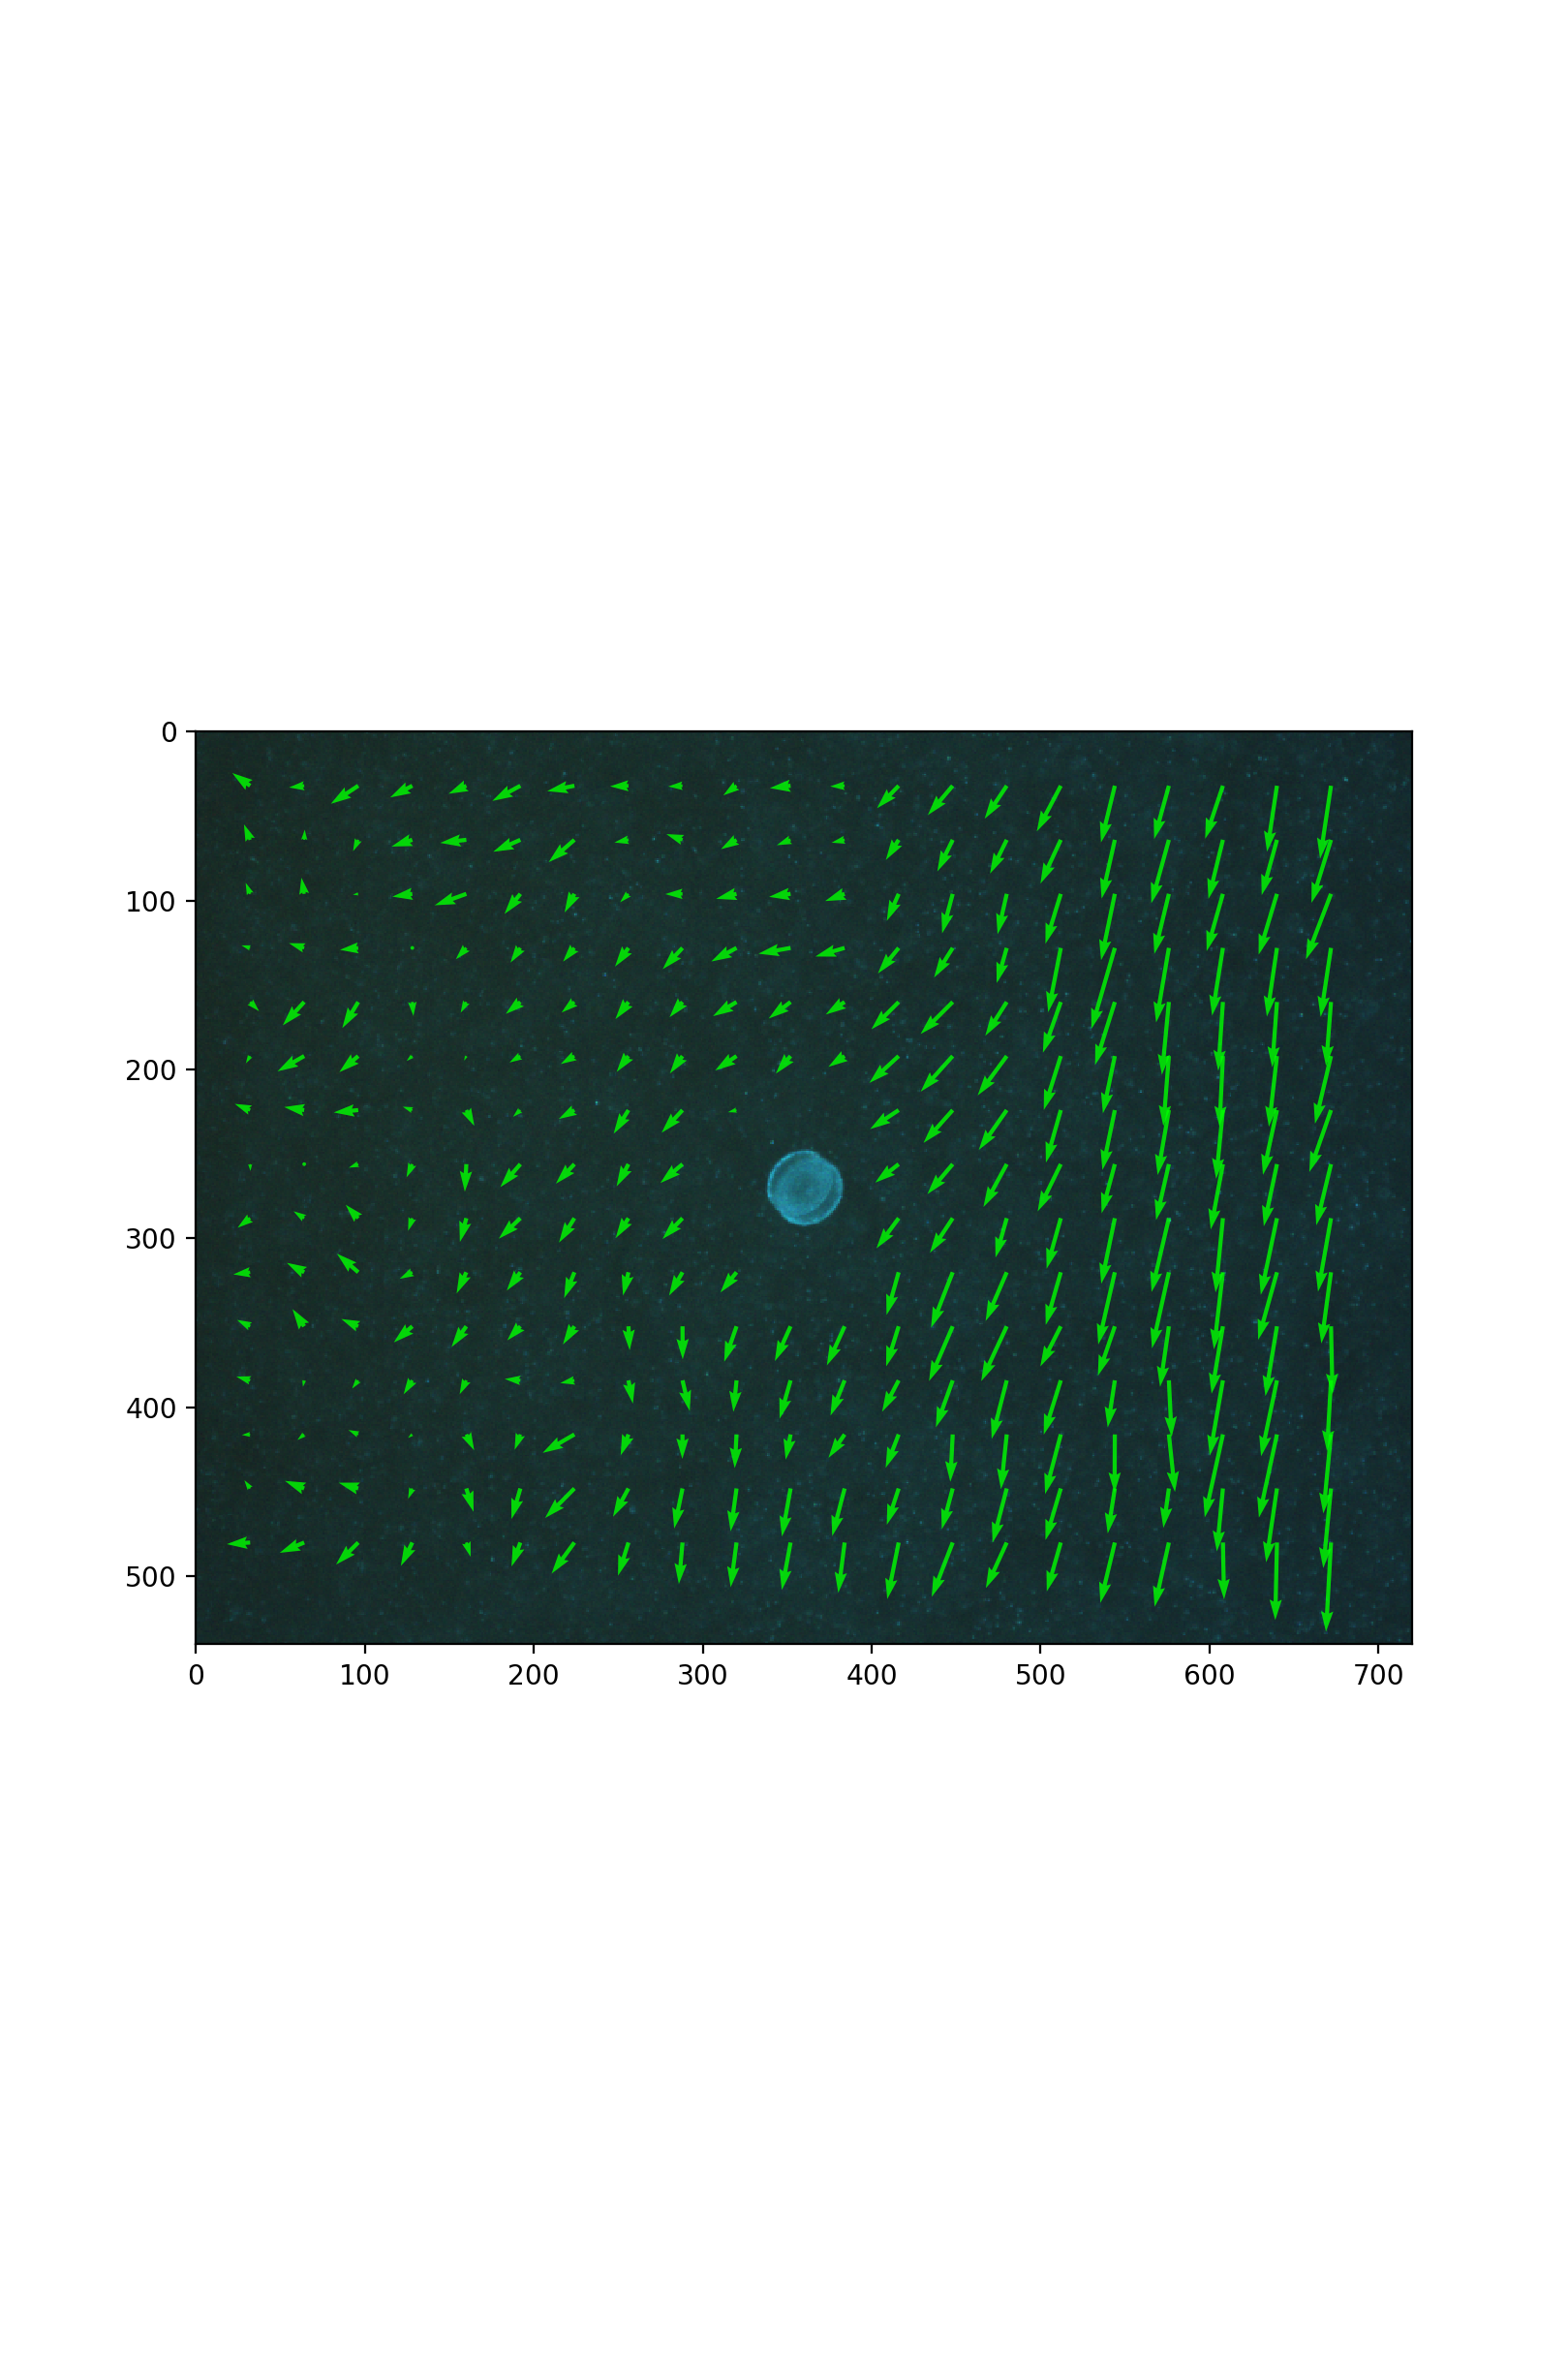

<IPython.core.display.Javascript object>


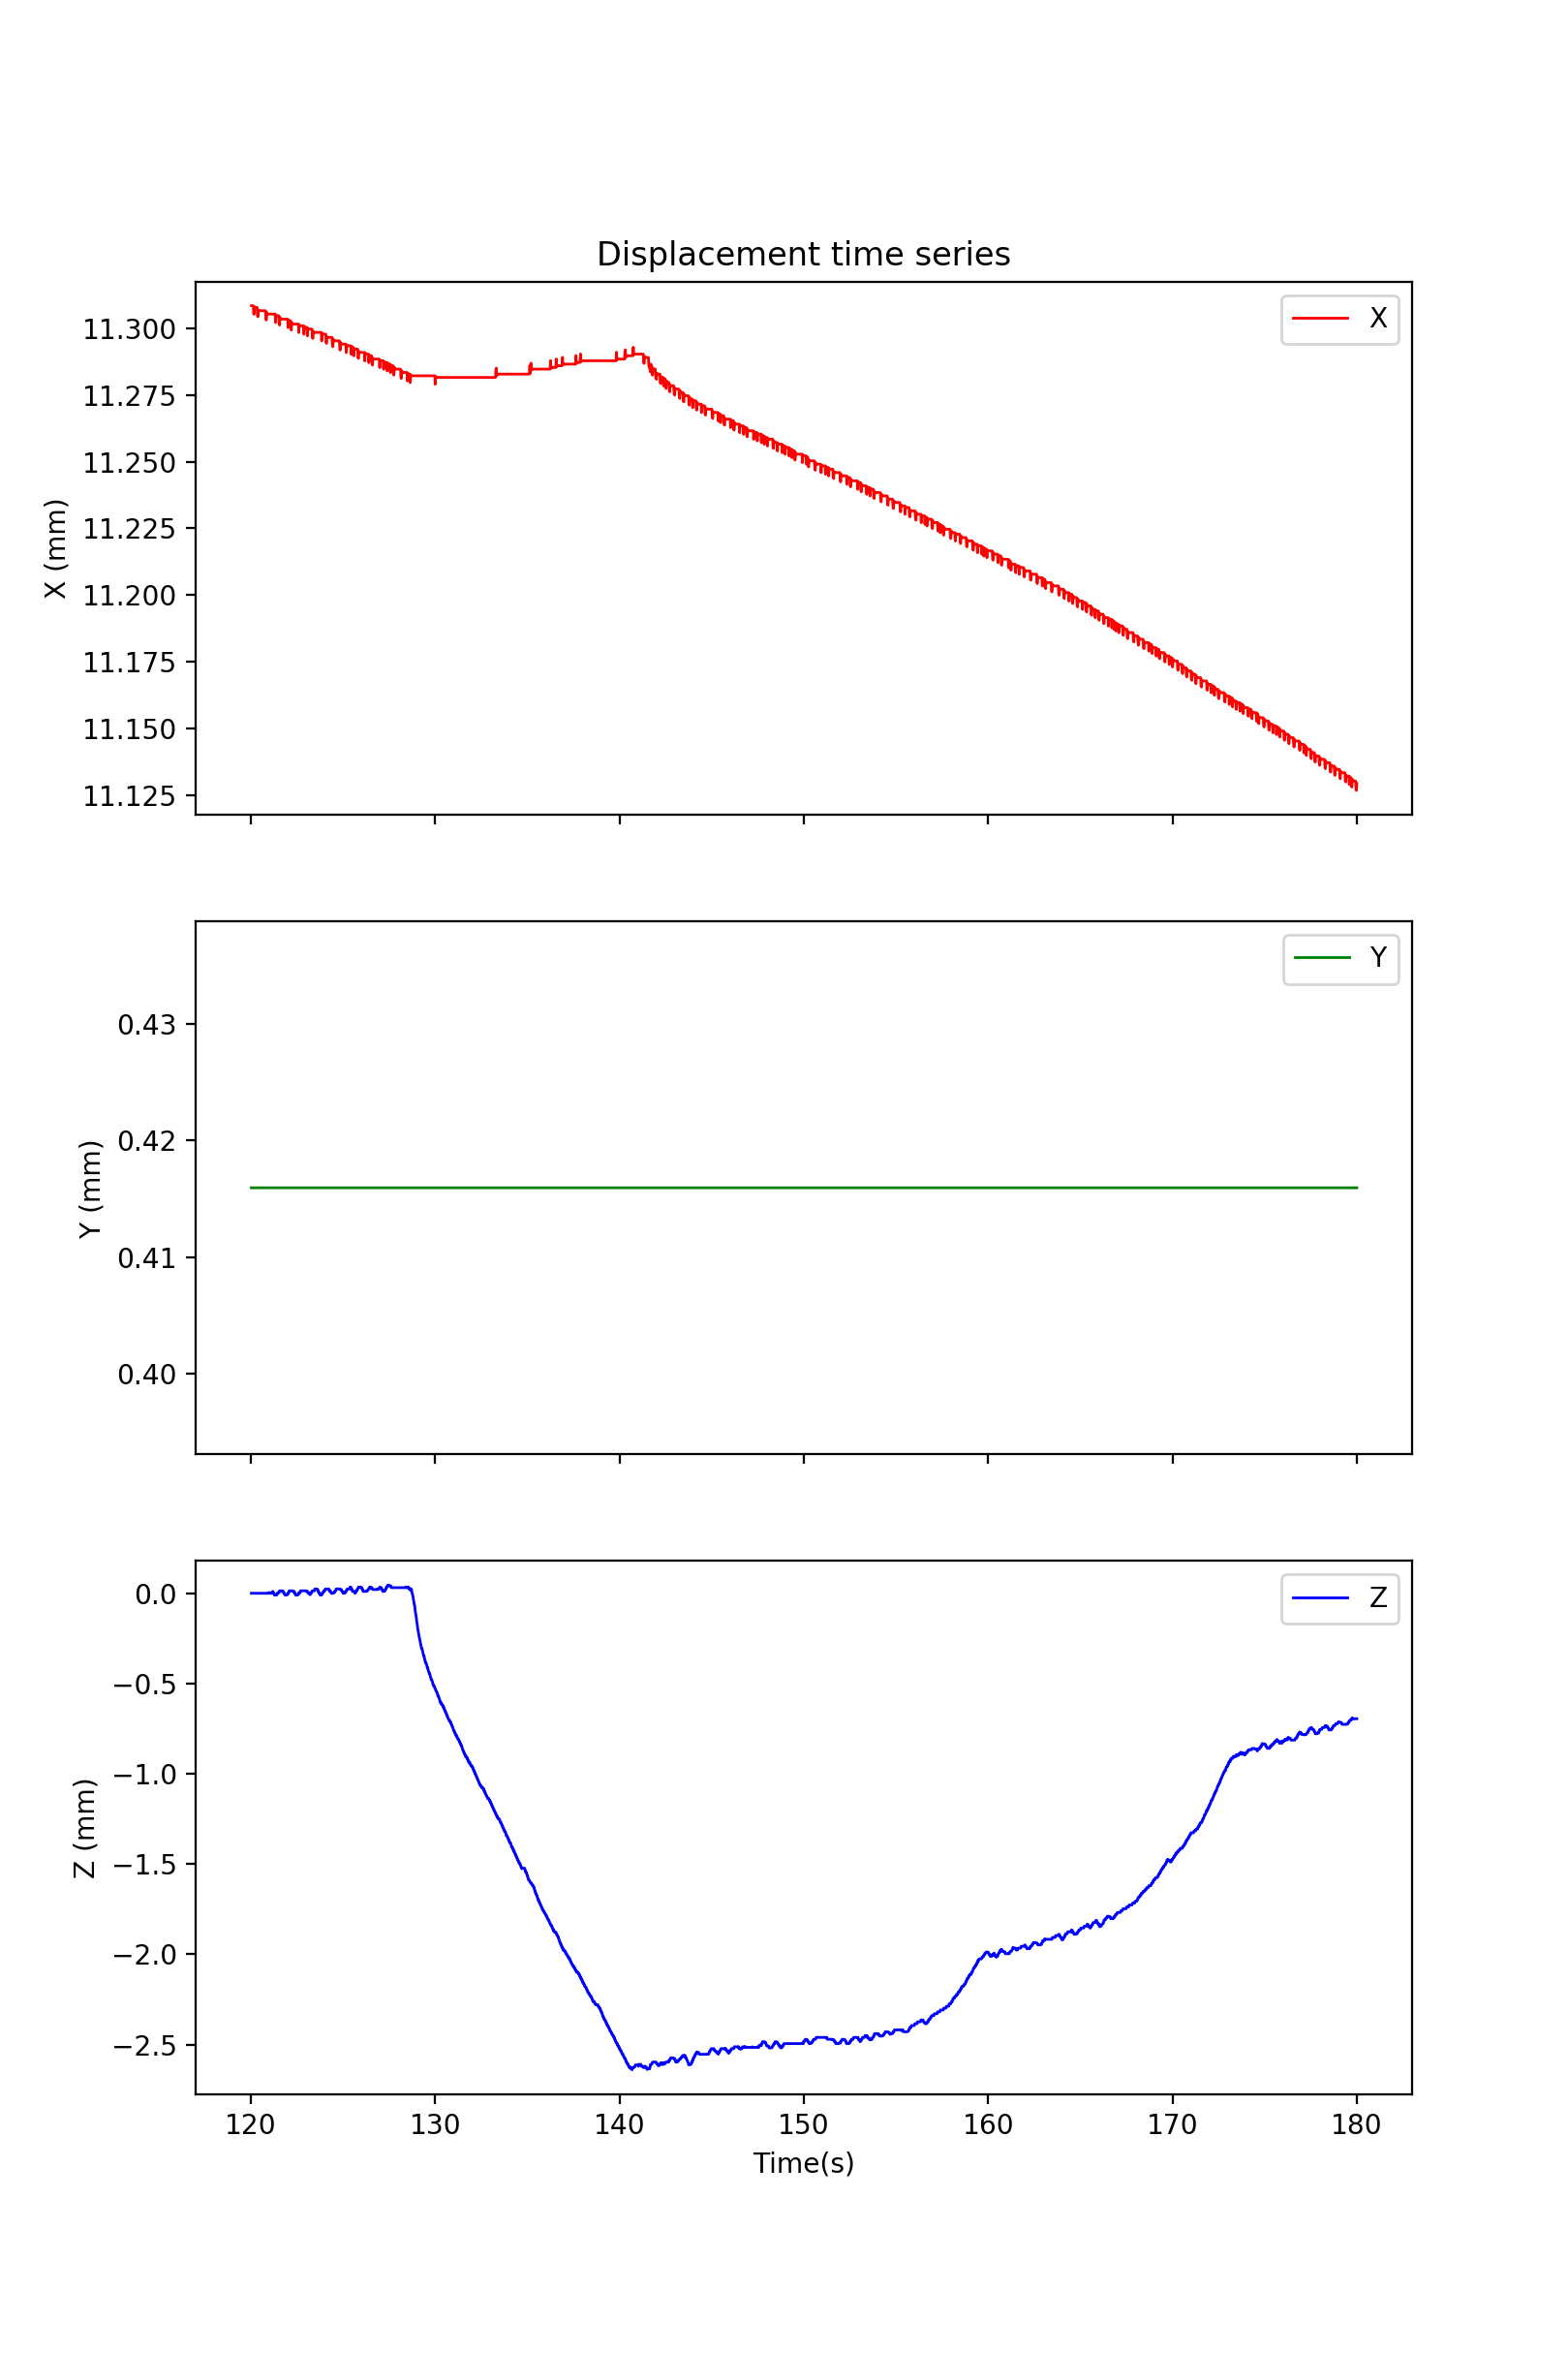

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [133]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()

# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [134]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [135]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0      -0.003978
1      -0.003789
2      -0.003616
3      -0.003459
4      -0.003315
          ...   
2686   -0.002383
2687   -0.002482
2688   -0.002590
2689   -0.002708
2690   -0.002837
Name: V_x, Length: 2691, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


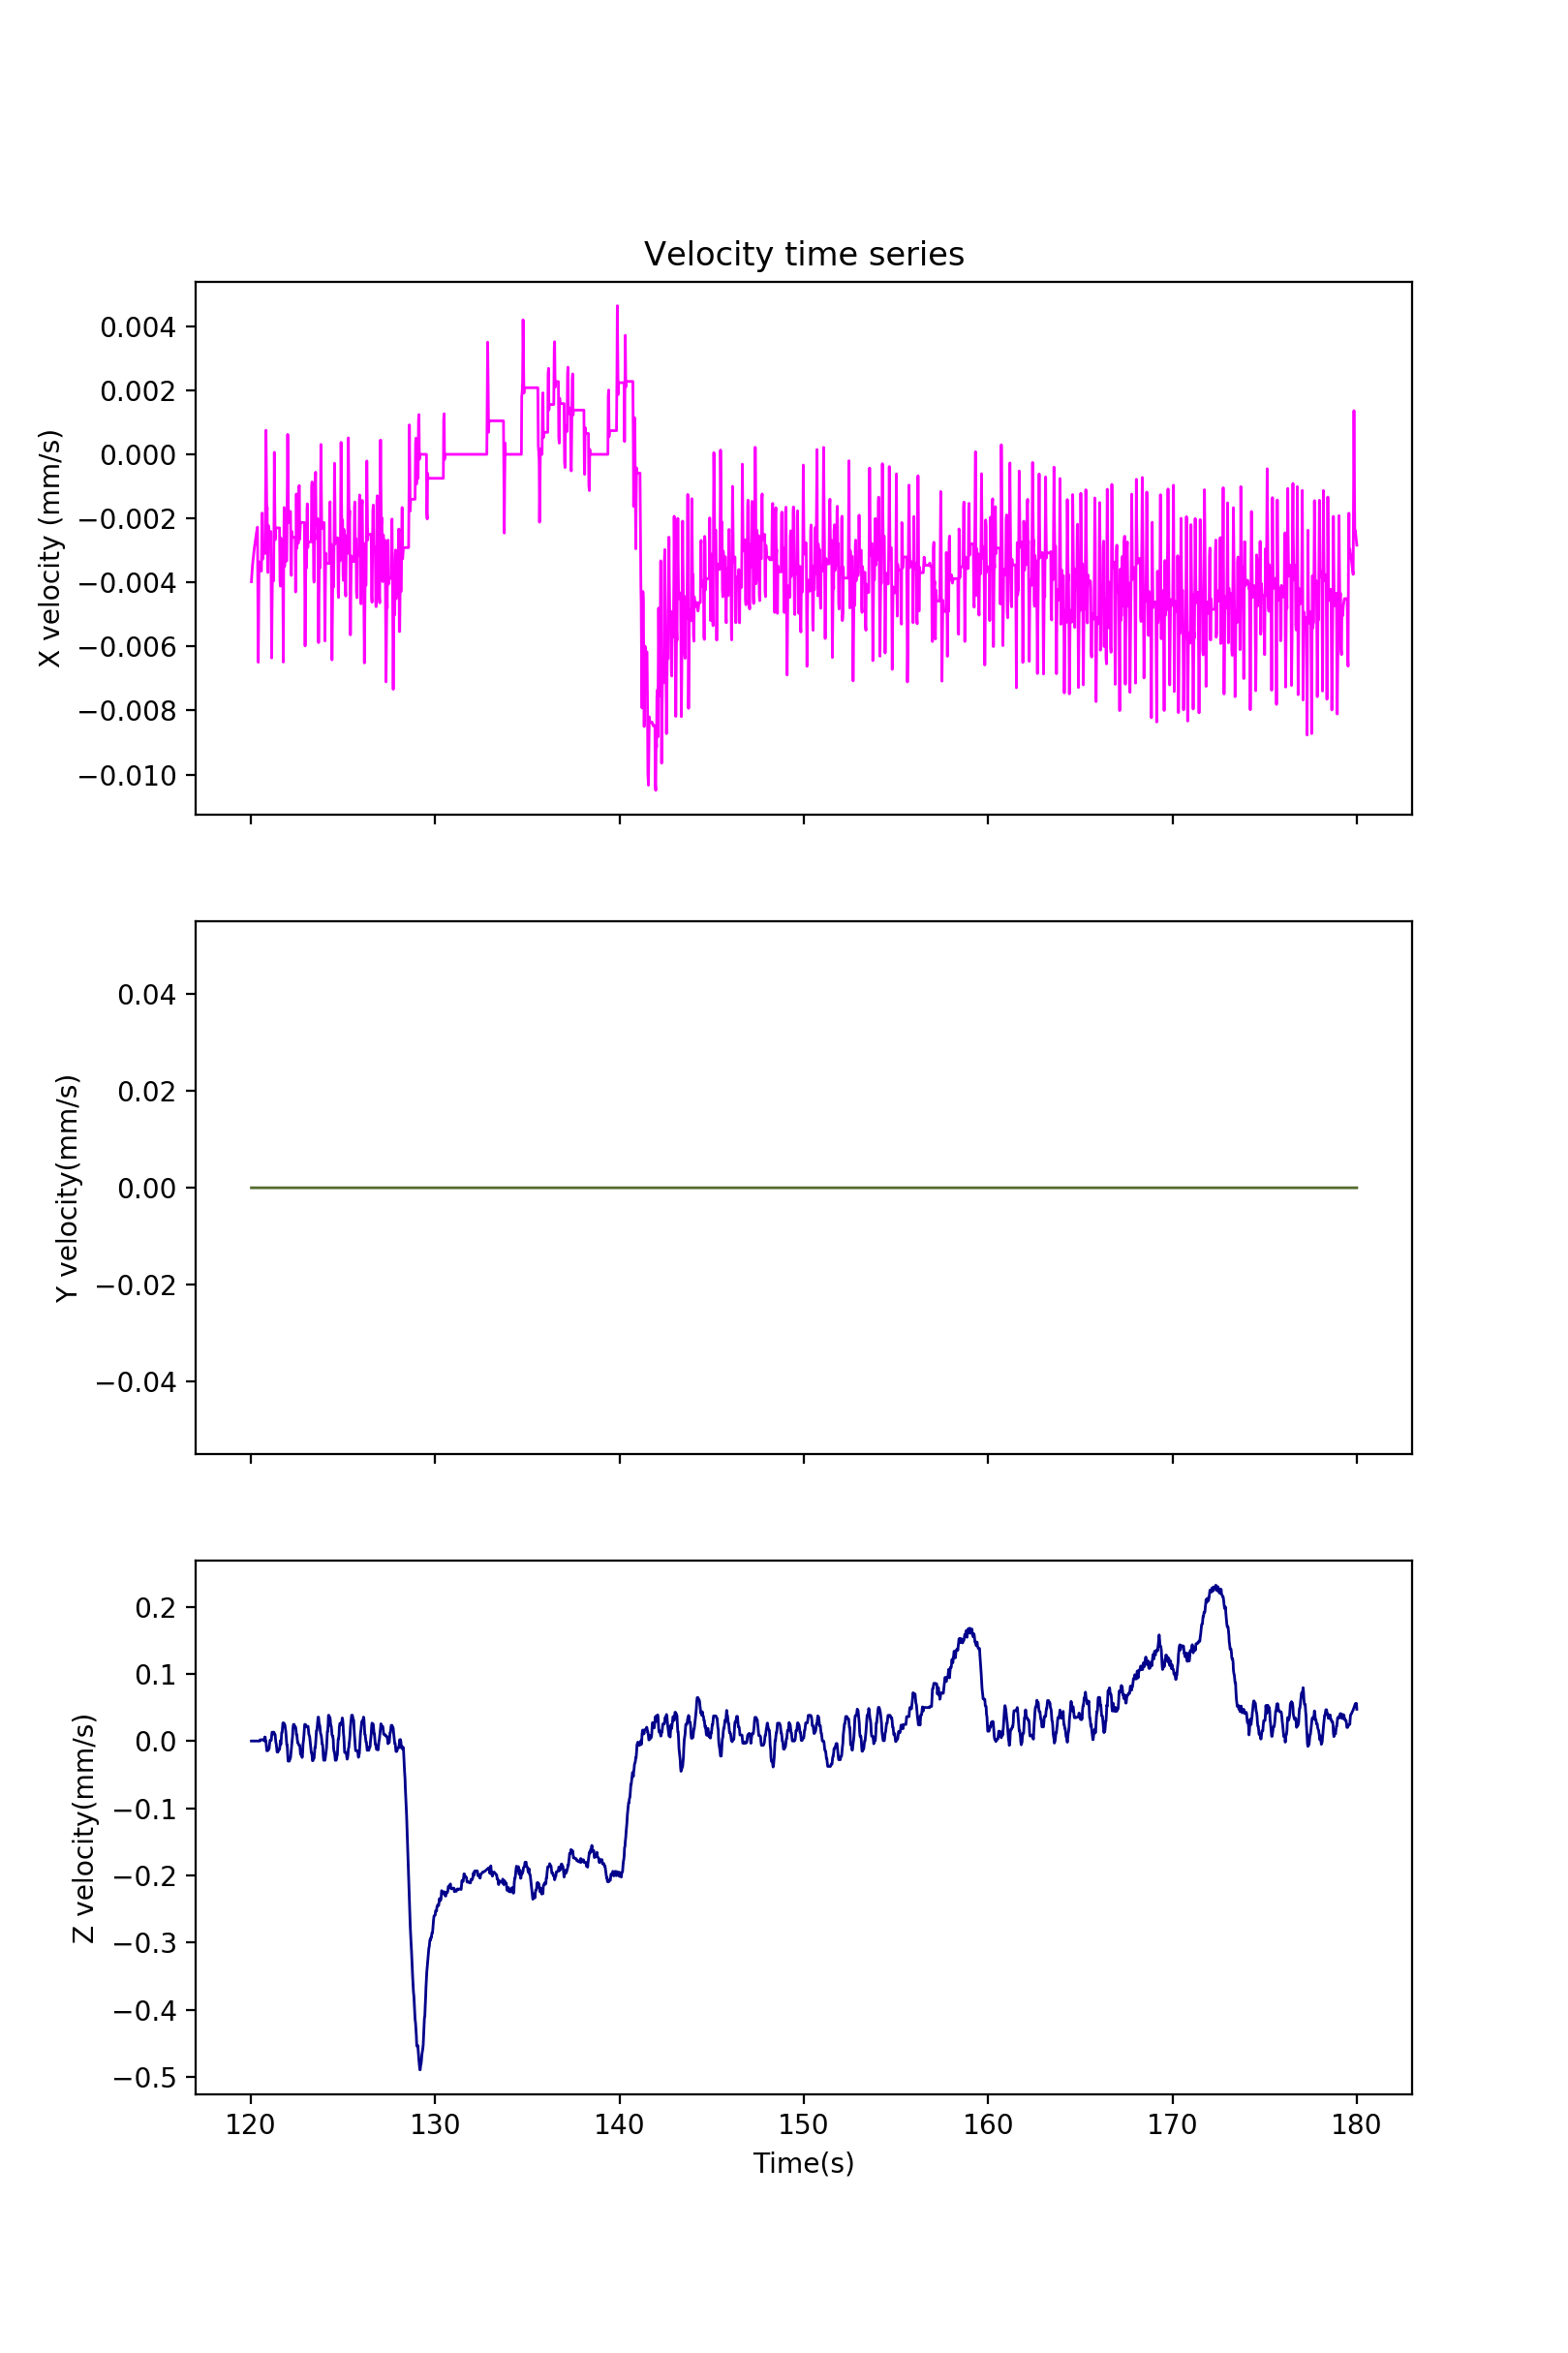

In [136]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [137]:
gm_analysis.find_object_size()

Color thresholds available! 
 Loading file D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 69), HIGH : (255, 255, 255)
Loading organism size from memory ...
**************************************************
object diameter 0.15528175329706473 mm
object diameter max 0.15136040851568722 mm
object diameter min 0.15920309807844224 mm
**************************************************


## Running PIV on a pair of frames

In [113]:
image_a = 'IMG_5000.tif'
image_b = 'IMG_5001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b)

--------------------------------------------------
Loading PIV data for: IMG_5000.tif and IMG_5001.tif 

--------------------------------------------------
0.0004408250470879579
0.0008223443605307643
-0.0003815193134428065


(0.0008223443605307643,
 -0.0003815193134428065,
 0.0001460039361756993,
 0.00025572366910176685)

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [50]:
gm_analysis.compute_fluid_velocity_timeseries()

Fluid time series found! Loading ...


## Compute the corrected displacement of the object relative to the fluid

In [138]:
gm_analysis.compute_fluid_relative_disp(save = True)

  0%|          | 1/686 [00:00<01:31,  7.48it/s]

calculating fluid velocity time series ...
1
Consequtive images found ...
IMG_5259.tif
IMG_5260.tif
--------------------------------------------------
Loading PIV data for: IMG_5259.tif and IMG_5260.tif 

--------------------------------------------------
-0.0007117322389378017
-0.00036337575276074174
-0.00034835648617706
1
Consequtive images found ...
IMG_5260.tif
IMG_5261.tif
--------------------------------------------------
Loading PIV data for: IMG_5260.tif and IMG_5261.tif 

--------------------------------------------------
0.004663372095298265


  0%|          | 3/686 [00:00<01:23,  8.17it/s]

0.0042591303183776175
0.0004042417769206468
1
Consequtive images found ...
IMG_5261.tif
IMG_5262.tif
--------------------------------------------------
Loading PIV data for: IMG_5261.tif and IMG_5262.tif 

--------------------------------------------------
0.002086588562001012
-0.000452468799389319
0.002539057361390331
1
Consequtive images found ...
IMG_5262.tif
IMG_5263.tif
--------------------------------------------------
Loading PIV data for: IMG_5262.tif and IMG_5263.tif 

--------------------------------------------------
-0.002401023024134022


  1%|          | 5/686 [00:00<01:18,  8.63it/s]

-0.000783992290555627
-0.0016170307335783948
1
Consequtive images found ...
IMG_5263.tif
IMG_5264.tif
--------------------------------------------------
Loading PIV data for: IMG_5263.tif and IMG_5264.tif 

--------------------------------------------------
0.012125167051886139
0.011519557541151373
0.0006056095107347679
1
Consequtive images found ...
IMG_5264.tif
IMG_5265.tif
--------------------------------------------------
Loading PIV data for: IMG_5264.tif and IMG_5265.tif 

--------------------------------------------------
-0.0005403771863040348


  1%|          | 7/686 [00:00<01:16,  8.85it/s]

0.0006191102324256217
-0.0011594874187296565
1
Consequtive images found ...
IMG_5265.tif
IMG_5266.tif
--------------------------------------------------
Loading PIV data for: IMG_5265.tif and IMG_5266.tif 

--------------------------------------------------
-0.00011880775478432706
-0.0007332916011332895
0.0006144838463489625
1
Consequtive images found ...
IMG_5266.tif
IMG_5267.tif
--------------------------------------------------
Loading PIV data for: IMG_5266.tif and IMG_5267.tif 

--------------------------------------------------
-0.003976497730539724


  1%|▏         | 9/686 [00:01<01:15,  8.97it/s]

-0.00242779361006134
-0.001548704120478383
1
Consequtive images found ...
IMG_5267.tif
IMG_5268.tif
--------------------------------------------------
Loading PIV data for: IMG_5267.tif and IMG_5268.tif 

--------------------------------------------------
0.0039622251384152166
-0.00038488558551150615
0.004347110723926724
1
Consequtive images found ...
IMG_5268.tif
IMG_5269.tif
--------------------------------------------------
Loading PIV data for: IMG_5268.tif and IMG_5269.tif 

--------------------------------------------------
0.01261257338820328


  2%|▏         | 11/686 [00:01<01:14,  9.12it/s]

0.012411851055171822
0.00020072233303145793
1
Consequtive images found ...
IMG_5269.tif
IMG_5270.tif
--------------------------------------------------
Loading PIV data for: IMG_5269.tif and IMG_5270.tif 

--------------------------------------------------
-0.00017875756802585854
-0.0017498729746763906
0.001571115406650532
1
Consequtive images found ...
IMG_5270.tif
IMG_5271.tif
--------------------------------------------------
Loading PIV data for: IMG_5270.tif and IMG_5271.tif 

--------------------------------------------------
-0.00030852395606468705


  2%|▏         | 13/686 [00:01<01:14,  9.05it/s]

0.0011259635901484193
-0.0014344875462131063
1
Consequtive images found ...
IMG_5271.tif
IMG_5272.tif
--------------------------------------------------
Loading PIV data for: IMG_5271.tif and IMG_5272.tif 

--------------------------------------------------
-0.003783808858355387
0.00014789491729873288
-0.003931703775654119
1
Consequtive images found ...
IMG_5272.tif
IMG_5273.tif
--------------------------------------------------
Loading PIV data for: IMG_5272.tif and IMG_5273.tif 

--------------------------------------------------
-0.0017986294448161058


  2%|▏         | 15/686 [00:01<01:13,  9.09it/s]

-0.000889500276297341
-0.0009091291685187646
1
Consequtive images found ...
IMG_5273.tif
IMG_5274.tif
--------------------------------------------------
Loading PIV data for: IMG_5273.tif and IMG_5274.tif 

--------------------------------------------------
-0.0015673612067371155
-0.0014209069617055457
-0.00014645424503156976
1
Consequtive images found ...
IMG_5274.tif
IMG_5275.tif
--------------------------------------------------
Loading PIV data for: IMG_5274.tif and IMG_5275.tif 

--------------------------------------------------
0.015409980138490346


  2%|▏         | 17/686 [00:01<01:13,  9.16it/s]

0.006946974356400299
0.008463005782090046
1
Consequtive images found ...
IMG_5275.tif
IMG_5276.tif
--------------------------------------------------
Loading PIV data for: IMG_5275.tif and IMG_5276.tif 

--------------------------------------------------
0.0044585235877632415
-0.0010659668368092872
0.005524490424572528
1
Consequtive images found ...
IMG_5276.tif
IMG_5277.tif
--------------------------------------------------
Loading PIV data for: IMG_5276.tif and IMG_5277.tif 

--------------------------------------------------
0.0010259160142029068


  3%|▎         | 19/686 [00:02<01:13,  9.12it/s]

0.004969509655028042
-0.003943593640825135
1
Consequtive images found ...
IMG_5277.tif
IMG_5278.tif
--------------------------------------------------
Loading PIV data for: IMG_5277.tif and IMG_5278.tif 

--------------------------------------------------
-0.0024491064353621647
0.006069087134298467
-0.008518193569660631
1
Consequtive images found ...
IMG_5278.tif
IMG_5279.tif
--------------------------------------------------
Loading PIV data for: IMG_5278.tif and IMG_5279.tif 

--------------------------------------------------
-0.010326742571928824


  3%|▎         | 21/686 [00:02<01:12,  9.19it/s]

-0.0016234066447652065
-0.008703335927163618
1
Consequtive images found ...
IMG_5279.tif
IMG_5280.tif
--------------------------------------------------
Loading PIV data for: IMG_5279.tif and IMG_5280.tif 

--------------------------------------------------
-0.0032174953761259784
-0.00037871526125223253
-0.002838780114873746
1
Consequtive images found ...
IMG_5280.tif
IMG_5281.tif
--------------------------------------------------
Loading PIV data for: IMG_5280.tif and IMG_5281.tif 

--------------------------------------------------
0.008124007714482132


  3%|▎         | 23/686 [00:02<01:11,  9.30it/s]

-0.0008497327066894929
0.008973740421171626
1
Consequtive images found ...
IMG_5281.tif
IMG_5282.tif
--------------------------------------------------
Loading PIV data for: IMG_5281.tif and IMG_5282.tif 

--------------------------------------------------
0.011659775671395197
-0.0012904624422783416
0.012950238113673539
1
Consequtive images found ...
IMG_5282.tif
IMG_5283.tif
--------------------------------------------------
Loading PIV data for: IMG_5282.tif and IMG_5283.tif 

--------------------------------------------------
0.0064917089062011485


  4%|▎         | 25/686 [00:02<01:20,  8.18it/s]

0.005070059767831506
0.0014216491383696427
1
Consequtive images found ...
IMG_5283.tif
IMG_5284.tif
--------------------------------------------------
Loading PIV data for: IMG_5283.tif and IMG_5284.tif 

--------------------------------------------------
-0.0041449116540955705
0.0006989771191138638
-0.004843888773209433
1
Consequtive images found ...
IMG_5284.tif
IMG_5285.tif
--------------------------------------------------
Loading PIV data for: IMG_5284.tif and IMG_5285.tif 

--------------------------------------------------
0.005275573749205548


  4%|▍         | 27/686 [00:03<01:15,  8.68it/s]

0.013038789594627927
-0.0077632158454223775
1
Consequtive images found ...
IMG_5285.tif
IMG_5286.tif
--------------------------------------------------
Loading PIV data for: IMG_5285.tif and IMG_5286.tif 

--------------------------------------------------
-0.013721724324114636
-0.002387234967962518
-0.011334489356152116
1
Consequtive images found ...
IMG_5286.tif
IMG_5287.tif
--------------------------------------------------
Loading PIV data for: IMG_5286.tif and IMG_5287.tif 

--------------------------------------------------
-0.004727770902020325


  4%|▍         | 29/686 [00:03<01:13,  8.91it/s]

1.883429447648031e-05
-0.004746605196496806
1
Consequtive images found ...
IMG_5287.tif
IMG_5288.tif
--------------------------------------------------
Loading PIV data for: IMG_5287.tif and IMG_5288.tif 

--------------------------------------------------
0.005560716368852698
-1.9161393727437726e-05
0.005579877762580135
1
Consequtive images found ...
IMG_5288.tif
IMG_5289.tif
--------------------------------------------------
Loading PIV data for: IMG_5288.tif and IMG_5289.tif 

--------------------------------------------------
0.01571161674148424


  5%|▍         | 31/686 [00:03<01:12,  9.08it/s]

0.0004907105570081903
0.01522090618447605
1
Consequtive images found ...
IMG_5289.tif
IMG_5290.tif
--------------------------------------------------
Loading PIV data for: IMG_5289.tif and IMG_5290.tif 

--------------------------------------------------
0.008244931362589213
0.002485246952639985
0.0057596844099492275
1
Consequtive images found ...
IMG_5290.tif
IMG_5291.tif
--------------------------------------------------
Loading PIV data for: IMG_5290.tif and IMG_5291.tif 

--------------------------------------------------
0.003936392641219376


  5%|▍         | 33/686 [00:03<01:10,  9.26it/s]

0.0015845138685374315
0.002351878772681944
1
Consequtive images found ...
IMG_5291.tif
IMG_5292.tif
--------------------------------------------------
Loading PIV data for: IMG_5291.tif and IMG_5292.tif 

--------------------------------------------------
-0.009655176058174859
0.0005907940000507595
-0.010245970058225617
1
Consequtive images found ...
IMG_5292.tif
IMG_5293.tif
--------------------------------------------------
Loading PIV data for: IMG_5292.tif and IMG_5293.tif 

--------------------------------------------------
-0.008234141130226167


  5%|▌         | 35/686 [00:03<01:10,  9.20it/s]

0.002922071774650763
-0.01115621290487693
1
Consequtive images found ...
IMG_5293.tif
IMG_5294.tif
--------------------------------------------------
Loading PIV data for: IMG_5293.tif and IMG_5294.tif 

--------------------------------------------------
-0.008534508083417804
-0.0024238296183378407
-0.006110678465079963
1
Consequtive images found ...
IMG_5294.tif
IMG_5295.tif
--------------------------------------------------
Loading PIV data for: IMG_5294.tif and IMG_5295.tif 

--------------------------------------------------
-0.002459326677855332


  5%|▌         | 37/686 [00:04<01:10,  9.19it/s]

0.0016913422113171287
-0.004150668889172461
1
Consequtive images found ...
IMG_5295.tif
IMG_5296.tif
--------------------------------------------------
Loading PIV data for: IMG_5295.tif and IMG_5296.tif 

--------------------------------------------------
0.0048128465641833346
0.005328964016823472
-0.0005161174526401384
1
Consequtive images found ...
IMG_5296.tif
IMG_5297.tif
--------------------------------------------------
Loading PIV data for: IMG_5296.tif and IMG_5297.tif 

--------------------------------------------------
0.0106694677956434


  6%|▌         | 39/686 [00:04<01:10,  9.17it/s]

-0.0012647373197039729
0.011934205115347372
1
Consequtive images found ...
IMG_5297.tif
IMG_5298.tif
--------------------------------------------------
Loading PIV data for: IMG_5297.tif and IMG_5298.tif 

--------------------------------------------------
0.010276926777937054
-0.00035833684902765147
0.010635263626964703
1
Consequtive images found ...
IMG_5298.tif
IMG_5299.tif
--------------------------------------------------
Loading PIV data for: IMG_5298.tif and IMG_5299.tif 

--------------------------------------------------
0.00957055522037687


  6%|▌         | 41/686 [00:04<01:10,  9.18it/s]

0.014168105645616987
-0.004597550425240115
1
Consequtive images found ...
IMG_5299.tif
IMG_5300.tif
--------------------------------------------------
Loading PIV data for: IMG_5299.tif and IMG_5300.tif 

--------------------------------------------------
-0.0064774464725101295
-0.0005482758642259115
-0.005929170608284217
1
Consequtive images found ...
IMG_5300.tif
IMG_5301.tif
--------------------------------------------------
Loading PIV data for: IMG_5300.tif and IMG_5301.tif 

--------------------------------------------------
-0.006953607247514468


  6%|▋         | 43/686 [00:04<01:10,  9.17it/s]

-0.0005404794326977762
-0.006413127814816693
1
Consequtive images found ...
IMG_5301.tif
IMG_5302.tif
--------------------------------------------------
Loading PIV data for: IMG_5301.tif and IMG_5302.tif 

--------------------------------------------------
-0.005619847315388623
-1.2242769177814031e-05
-0.005607604546210809
1
Consequtive images found ...
IMG_5302.tif
IMG_5303.tif
--------------------------------------------------
Loading PIV data for: IMG_5302.tif and IMG_5303.tif 

--------------------------------------------------
0.0012087006170975107


  7%|▋         | 45/686 [00:04<01:10,  9.13it/s]

-0.0005703774769109962
0.0017790780940085073
1
Consequtive images found ...
IMG_5303.tif
IMG_5304.tif
--------------------------------------------------
Loading PIV data for: IMG_5303.tif and IMG_5304.tif 

--------------------------------------------------
0.012006774670615741
-0.0017384841409683821
0.013745258811584126
1
Consequtive images found ...
IMG_5304.tif
IMG_5305.tif
--------------------------------------------------
Loading PIV data for: IMG_5304.tif and IMG_5305.tif 

--------------------------------------------------
0.01866661816036747


  7%|▋         | 47/686 [00:05<01:09,  9.16it/s]

0.0037699857140780766
0.014896632446289394
1
Consequtive images found ...
IMG_5305.tif
IMG_5306.tif
--------------------------------------------------
Loading PIV data for: IMG_5305.tif and IMG_5306.tif 

--------------------------------------------------
0.000701878777043973
-2.8155542968018854e-05
0.0007300343200119918
1
Consequtive images found ...
IMG_5306.tif
IMG_5307.tif
--------------------------------------------------
Loading PIV data for: IMG_5306.tif and IMG_5307.tif 

--------------------------------------------------
-0.014370276392110748


  7%|▋         | 49/686 [00:05<01:09,  9.15it/s]

-0.0003341648496174839
-0.014036111542493264
1
Consequtive images found ...
IMG_5307.tif
IMG_5308.tif
--------------------------------------------------
Loading PIV data for: IMG_5307.tif and IMG_5308.tif 

--------------------------------------------------
0.003811309090398201
0.0118017235704912
-0.007990414480092998
1
Consequtive images found ...
IMG_5308.tif
IMG_5309.tif
--------------------------------------------------
Loading PIV data for: IMG_5308.tif and IMG_5309.tif 

--------------------------------------------------
-0.009221040316356495


  7%|▋         | 51/686 [00:05<01:09,  9.13it/s]

0.00014842041650417852
-0.009369460732860673
1
Consequtive images found ...
IMG_5309.tif
IMG_5310.tif
--------------------------------------------------
Loading PIV data for: IMG_5309.tif and IMG_5310.tif 

--------------------------------------------------
-0.004112857096019474
-0.0018019324152761626
-0.0023109246807433105
1
Consequtive images found ...
IMG_5310.tif
IMG_5311.tif
--------------------------------------------------
Loading PIV data for: IMG_5310.tif and IMG_5311.tif 

--------------------------------------------------
0.004880302377779584


  8%|▊         | 53/686 [00:05<01:09,  9.14it/s]

-0.0005403070432175748
0.005420609420997159
1
Consequtive images found ...
IMG_5311.tif
IMG_5312.tif
--------------------------------------------------
Loading PIV data for: IMG_5311.tif and IMG_5312.tif 

--------------------------------------------------
0.024598946283866545
0.011124603739640354
0.013474342544226192
1
Consequtive images found ...
IMG_5312.tif
IMG_5313.tif
--------------------------------------------------
Loading PIV data for: IMG_5312.tif and IMG_5313.tif 

--------------------------------------------------
0.0045868040631854255


  8%|▊         | 55/686 [00:06<01:08,  9.23it/s]

-0.0024209252499417765
0.007007729313127204
1
Consequtive images found ...
IMG_5313.tif
IMG_5314.tif
--------------------------------------------------
Loading PIV data for: IMG_5313.tif and IMG_5314.tif 

--------------------------------------------------
-0.006751019721690982
-0.0012055892797064624
-0.005545430441984519
1
Consequtive images found ...
IMG_5314.tif
IMG_5315.tif
--------------------------------------------------
Loading PIV data for: IMG_5314.tif and IMG_5315.tif 

--------------------------------------------------
-0.010913421152275404


  8%|▊         | 57/686 [00:06<01:08,  9.17it/s]

-0.0005303203213383648
-0.010383100830937039
1
Consequtive images found ...
IMG_5315.tif
IMG_5316.tif
--------------------------------------------------
Loading PIV data for: IMG_5315.tif and IMG_5316.tif 

--------------------------------------------------
-0.002505314193403337
0.006718407831903494
-0.009223722025306831
1
Consequtive images found ...
IMG_5316.tif
IMG_5317.tif
--------------------------------------------------
Loading PIV data for: IMG_5316.tif and IMG_5317.tif 

--------------------------------------------------
-0.0026306199896788413


  9%|▊         | 59/686 [00:06<01:08,  9.20it/s]

0.002571490460825175
-0.005202110450504016
1
Consequtive images found ...
IMG_5317.tif
IMG_5318.tif
--------------------------------------------------
Loading PIV data for: IMG_5317.tif and IMG_5318.tif 

--------------------------------------------------
0.004078169478671356
0.0012068020554179034
0.002871367423253451
1
Consequtive images found ...
IMG_5318.tif
IMG_5319.tif
--------------------------------------------------
Loading PIV data for: IMG_5318.tif and IMG_5319.tif 

--------------------------------------------------
0.014541667370322213


  9%|▉         | 61/686 [00:06<01:08,  9.12it/s]

-0.002023832868125047
0.016565500238447262
1
Consequtive images found ...
IMG_5319.tif
IMG_5320.tif
--------------------------------------------------
Loading PIV data for: IMG_5319.tif and IMG_5320.tif 

--------------------------------------------------
0.008967604428652378
0.006907086461599909
0.002060517967052468
1
Consequtive images found ...
IMG_5320.tif
IMG_5321.tif
--------------------------------------------------
Loading PIV data for: IMG_5320.tif and IMG_5321.tif 

--------------------------------------------------
-0.0032958754002512056


  9%|▉         | 63/686 [00:06<01:07,  9.22it/s]

-0.0016817054136516456
-0.0016141699865995602
1
Consequtive images found ...
IMG_5321.tif
IMG_5322.tif
--------------------------------------------------
Loading PIV data for: IMG_5321.tif and IMG_5322.tif 

--------------------------------------------------
-0.013690368713084
-0.0016128301733584654
-0.012077538539725532
1
Consequtive images found ...
IMG_5322.tif
IMG_5323.tif
--------------------------------------------------
Loading PIV data for: IMG_5322.tif and IMG_5323.tif 

--------------------------------------------------
-0.0031870802809673055


  9%|▉         | 65/686 [00:07<01:13,  8.48it/s]

0.004781458673377294
-0.007968538954344599
1
Consequtive images found ...
IMG_5323.tif
IMG_5324.tif
--------------------------------------------------
Loading PIV data for: IMG_5323.tif and IMG_5324.tif 

--------------------------------------------------
-0.004348882672839028
-0.0023116189296723557
-0.0020372637431666724
1
Consequtive images found ...
IMG_5324.tif
IMG_5325.tif
--------------------------------------------------
Loading PIV data for: IMG_5324.tif and IMG_5325.tif 

--------------------------------------------------
0.017811287438728465


 10%|▉         | 67/686 [00:07<01:10,  8.82it/s]

0.008465692580855918
0.009345594857872546
1
Consequtive images found ...
IMG_5325.tif
IMG_5326.tif
--------------------------------------------------
Loading PIV data for: IMG_5325.tif and IMG_5326.tif 

--------------------------------------------------
0.007239929115374371
-0.0019634933763477335
0.009203422491722103
1
Consequtive images found ...
IMG_5326.tif
IMG_5327.tif
--------------------------------------------------
Loading PIV data for: IMG_5326.tif and IMG_5327.tif 

--------------------------------------------------
0.0006908936464336134


 10%|█         | 69/686 [00:07<01:09,  8.92it/s]

-0.00015909656088642884
0.0008499902073200421
1
Consequtive images found ...
IMG_5327.tif
IMG_5328.tif
--------------------------------------------------
Loading PIV data for: IMG_5327.tif and IMG_5328.tif 

--------------------------------------------------
-0.0006456319964822432
0.010352423454394341
-0.010998055450876586
1
Consequtive images found ...
IMG_5328.tif
IMG_5329.tif
--------------------------------------------------
Loading PIV data for: IMG_5328.tif and IMG_5329.tif 

--------------------------------------------------
-0.013819397139920147


 10%|█         | 71/686 [00:07<01:08,  8.98it/s]

-0.0016367068368656978
-0.01218269030305445
1
Consequtive images found ...
IMG_5329.tif
IMG_5330.tif
--------------------------------------------------
Loading PIV data for: IMG_5329.tif and IMG_5330.tif 

--------------------------------------------------
-0.0018309407962630217
0.0006399616554749298
-0.002470902451737952
1
Consequtive images found ...
IMG_5330.tif
IMG_5331.tif
--------------------------------------------------
Loading PIV data for: IMG_5330.tif and IMG_5331.tif 

--------------------------------------------------
0.0016218443098317877


 11%|█         | 73/686 [00:08<01:07,  9.02it/s]

-0.0019394334562051253
0.0035612777660369134
1
Consequtive images found ...
IMG_5331.tif
IMG_5332.tif
--------------------------------------------------
Loading PIV data for: IMG_5331.tif and IMG_5332.tif 

--------------------------------------------------
0.012889275890637784
0.00569568414153755
0.007193591749100235
1
Consequtive images found ...
IMG_5332.tif
IMG_5333.tif
--------------------------------------------------
Loading PIV data for: IMG_5332.tif and IMG_5333.tif 

--------------------------------------------------
0.006822622121631191


 11%|█         | 75/686 [00:08<01:06,  9.13it/s]

-0.0004786806024892021
0.007301302724120393
1
Consequtive images found ...
IMG_5333.tif
IMG_5334.tif
--------------------------------------------------
Loading PIV data for: IMG_5333.tif and IMG_5334.tif 

--------------------------------------------------
-0.0010460250464177684
0.0058329834588861295
-0.006879008505303898
1
Consequtive images found ...
IMG_5334.tif
IMG_5335.tif
--------------------------------------------------
Loading PIV data for: IMG_5334.tif and IMG_5335.tif 

--------------------------------------------------
-0.012963493658773004


 11%|█         | 77/686 [00:08<01:07,  9.06it/s]

-0.0029330929470589295
-0.010030400711714075
1
Consequtive images found ...
IMG_5335.tif
IMG_5336.tif
--------------------------------------------------
Loading PIV data for: IMG_5335.tif and IMG_5336.tif 

--------------------------------------------------
0.002727630389133715
0.01572179751338607
-0.012994167124252354
1
Consequtive images found ...
IMG_5336.tif
IMG_5337.tif
--------------------------------------------------
Loading PIV data for: IMG_5336.tif and IMG_5337.tif 

--------------------------------------------------
0.0041329710130016805


 12%|█▏        | 79/686 [00:08<01:06,  9.07it/s]

-0.0006259990311947859
0.004758970044196466
1
Consequtive images found ...
IMG_5337.tif
IMG_5338.tif
--------------------------------------------------
Loading PIV data for: IMG_5337.tif and IMG_5338.tif 

--------------------------------------------------
0.005462137600989866
-0.0005295171777097512
0.005991654778699618
1
Consequtive images found ...
IMG_5338.tif
IMG_5339.tif
--------------------------------------------------
Loading PIV data for: IMG_5338.tif and IMG_5339.tif 

--------------------------------------------------
0.004434231302393231


 12%|█▏        | 81/686 [00:08<01:06,  9.11it/s]

-0.001929518719791749
0.006363750022184979
1
Consequtive images found ...
IMG_5339.tif
IMG_5340.tif
--------------------------------------------------
Loading PIV data for: IMG_5339.tif and IMG_5340.tif 

--------------------------------------------------
0.00303106218689322
-0.0015083695983313594
0.00453943178522458
1
Consequtive images found ...
IMG_5340.tif
IMG_5341.tif
--------------------------------------------------
Loading PIV data for: IMG_5340.tif and IMG_5341.tif 

--------------------------------------------------
-0.0024190410978939493


 12%|█▏        | 83/686 [00:09<01:06,  9.10it/s]

0.004504049984047128
-0.006923091081941078
1
Consequtive images found ...
IMG_5341.tif
IMG_5342.tif
--------------------------------------------------
Loading PIV data for: IMG_5341.tif and IMG_5342.tif 

--------------------------------------------------
-0.006389926774185667
-0.0019393527413682987
-0.004450574032817367
1
Consequtive images found ...
IMG_5342.tif
IMG_5343.tif
--------------------------------------------------
Loading PIV data for: IMG_5342.tif and IMG_5343.tif 

--------------------------------------------------
0.001164295410778561


 12%|█▏        | 85/686 [00:09<01:06,  9.10it/s]

0.00015771134660866773
0.001006584064169893
1
Consequtive images found ...
IMG_5343.tif
IMG_5344.tif
--------------------------------------------------
Loading PIV data for: IMG_5343.tif and IMG_5344.tif 

--------------------------------------------------
0.013502747927991212
0.005000864005425142
0.008501883922566072
1
Consequtive images found ...
IMG_5344.tif
IMG_5345.tif
--------------------------------------------------
Loading PIV data for: IMG_5344.tif and IMG_5345.tif 

--------------------------------------------------
0.010440514969352443


 13%|█▎        | 87/686 [00:09<01:05,  9.08it/s]

0.00041859254680996896
0.010021922422542474
1
Consequtive images found ...
IMG_5345.tif
IMG_5346.tif
--------------------------------------------------
Loading PIV data for: IMG_5345.tif and IMG_5346.tif 

--------------------------------------------------
-0.004964032623404823
0.003751895360437431
-0.008715927983842254
1
Consequtive images found ...
IMG_5346.tif
IMG_5347.tif
--------------------------------------------------
Loading PIV data for: IMG_5346.tif and IMG_5347.tif 

--------------------------------------------------
-0.012684719876100382


 13%|█▎        | 89/686 [00:09<01:05,  9.09it/s]

-1.0563475637447461e-05
-0.012674156400462934
1
Consequtive images found ...
IMG_5347.tif
IMG_5348.tif
--------------------------------------------------
Loading PIV data for: IMG_5347.tif and IMG_5348.tif 

--------------------------------------------------
-0.013879506845034747
0.004356487642273828
-0.018235994487308577
1
Consequtive images found ...
IMG_5348.tif
IMG_5349.tif
--------------------------------------------------
Loading PIV data for: IMG_5348.tif and IMG_5349.tif 

--------------------------------------------------
-0.0034994656967204064


 13%|█▎        | 91/686 [00:10<01:05,  9.07it/s]

-0.0007258291501396016
-0.0027736365465808044
1
Consequtive images found ...
IMG_5349.tif
IMG_5350.tif
--------------------------------------------------
Loading PIV data for: IMG_5349.tif and IMG_5350.tif 

--------------------------------------------------
0.012779715329541256
0.01332824246448336
-0.0005485271349421066
1
Consequtive images found ...
IMG_5350.tif
IMG_5351.tif
--------------------------------------------------
Loading PIV data for: IMG_5350.tif and IMG_5351.tif 

--------------------------------------------------
0.0072800742267847465


 14%|█▎        | 93/686 [00:10<01:05,  9.09it/s]

-0.003834289820519911
0.011114364047304658
1
Consequtive images found ...
IMG_5351.tif
IMG_5352.tif
--------------------------------------------------
Loading PIV data for: IMG_5351.tif and IMG_5352.tif 

--------------------------------------------------
0.0008337037861329815
0.0005126642007362974
0.00032103958539668416
1
Consequtive images found ...
IMG_5352.tif
IMG_5353.tif
--------------------------------------------------
Loading PIV data for: IMG_5352.tif and IMG_5353.tif 

--------------------------------------------------
-0.0010860269727269594


 14%|█▍        | 95/686 [00:10<01:04,  9.17it/s]

-0.0009059345250694832
-0.00018009244765747651
1
Consequtive images found ...
IMG_5353.tif
IMG_5354.tif
--------------------------------------------------
Loading PIV data for: IMG_5353.tif and IMG_5354.tif 

--------------------------------------------------
0.000468382912661851
-0.002074617708110584
0.002543000620772435
1
Consequtive images found ...
IMG_5354.tif
IMG_5355.tif
--------------------------------------------------
Loading PIV data for: IMG_5354.tif and IMG_5355.tif 

--------------------------------------------------
0.009808922440811201


 14%|█▍        | 97/686 [00:10<01:09,  8.49it/s]

0.011506986243358002
-0.0016980638025468006
1
Consequtive images found ...
IMG_5355.tif
IMG_5356.tif
--------------------------------------------------
Loading PIV data for: IMG_5355.tif and IMG_5356.tif 

--------------------------------------------------
0.00553364340502257
-0.0008604183285711833
0.006394061733593754
1
Consequtive images found ...
IMG_5356.tif
IMG_5357.tif
--------------------------------------------------
Loading PIV data for: IMG_5356.tif and IMG_5357.tif 

--------------------------------------------------
0.0004726308031904443


 14%|█▍        | 99/686 [00:10<01:06,  8.79it/s]

6.818395390747388e-05
0.00040444684928297043
1
Consequtive images found ...
IMG_5357.tif
IMG_5358.tif
--------------------------------------------------
Loading PIV data for: IMG_5357.tif and IMG_5358.tif 

--------------------------------------------------
0.001704634131600463
-0.0018067918698099759
0.0035114260014104384
1
Consequtive images found ...
IMG_5358.tif
IMG_5359.tif
--------------------------------------------------
Loading PIV data for: IMG_5358.tif and IMG_5359.tif 

--------------------------------------------------
0.00032381052989402065


 15%|█▍        | 101/686 [00:11<01:05,  8.90it/s]

0.005371492481530254
-0.005047681951636234
1
Consequtive images found ...
IMG_5359.tif
IMG_5360.tif
--------------------------------------------------
Loading PIV data for: IMG_5359.tif and IMG_5360.tif 

--------------------------------------------------
0.0004968517973541157
-0.00047775190644141395
0.0009746037037955297
1
Consequtive images found ...
IMG_5360.tif
IMG_5361.tif
--------------------------------------------------
Loading PIV data for: IMG_5360.tif and IMG_5361.tif 

--------------------------------------------------
0.008075909308580102


 15%|█▌        | 103/686 [00:11<01:04,  9.06it/s]

0.0023734710173771473
0.005702438291202952
1
Consequtive images found ...
IMG_5361.tif
IMG_5362.tif
--------------------------------------------------
Loading PIV data for: IMG_5361.tif and IMG_5362.tif 

--------------------------------------------------
0.0014916705067321283
-0.0005488556540733971
0.002040526160805526
1
Consequtive images found ...
IMG_5362.tif
IMG_5363.tif
--------------------------------------------------
Loading PIV data for: IMG_5362.tif and IMG_5363.tif 

--------------------------------------------------
0.03211362940670172


 15%|█▌        | 105/686 [00:11<01:03,  9.18it/s]

-0.0010078335998857729
0.03312146300658749
1
Consequtive images found ...
IMG_5363.tif
IMG_5364.tif
--------------------------------------------------
Loading PIV data for: IMG_5363.tif and IMG_5364.tif 

--------------------------------------------------
0.07174120409957938
0.0014458007244919453
0.07029540337508743
1
Consequtive images found ...
IMG_5364.tif
IMG_5365.tif
--------------------------------------------------
Loading PIV data for: IMG_5364.tif and IMG_5365.tif 

--------------------------------------------------
0.11433592728449575


 16%|█▌        | 107/686 [00:11<01:02,  9.24it/s]

-0.0032974600824852655
0.117633387366981
1
Consequtive images found ...
IMG_5365.tif
IMG_5366.tif
--------------------------------------------------
Loading PIV data for: IMG_5365.tif and IMG_5366.tif 

--------------------------------------------------
0.14257073648633975
-0.0025397923071667707
0.1451105287935065
1
Consequtive images found ...
IMG_5366.tif
IMG_5367.tif
--------------------------------------------------
Loading PIV data for: IMG_5366.tif and IMG_5367.tif 

--------------------------------------------------
0.18937743230827428


 16%|█▌        | 109/686 [00:12<01:02,  9.26it/s]

-0.0016596794037176746
0.19103711171199195
1
Consequtive images found ...
IMG_5367.tif
IMG_5368.tif
--------------------------------------------------
Loading PIV data for: IMG_5367.tif and IMG_5368.tif 

--------------------------------------------------
0.16003854540495827
-0.002293797362706909
0.1623323427676652
1
Consequtive images found ...
IMG_5368.tif
IMG_5369.tif
--------------------------------------------------
Loading PIV data for: IMG_5368.tif and IMG_5369.tif 

--------------------------------------------------
0.18945506201429327


 16%|█▌        | 111/686 [00:12<01:02,  9.20it/s]

-0.003803300132499802
0.1932583621467931
1
Consequtive images found ...
IMG_5369.tif
IMG_5370.tif
--------------------------------------------------
Loading PIV data for: IMG_5369.tif and IMG_5370.tif 

--------------------------------------------------
0.20368123218869155
-0.003425127268127068
0.20710635945681866
1
Consequtive images found ...
IMG_5370.tif
IMG_5371.tif
--------------------------------------------------
Loading PIV data for: IMG_5370.tif and IMG_5371.tif 

--------------------------------------------------
0.18622758108365914


 16%|█▋        | 113/686 [00:12<01:02,  9.14it/s]

-0.0015865143509762186
0.18781409543463534
1
Consequtive images found ...
IMG_5371.tif
IMG_5372.tif
--------------------------------------------------
Loading PIV data for: IMG_5371.tif and IMG_5372.tif 

--------------------------------------------------
0.1784532806688897
-0.004629602950139347
0.18308288361902908
1
Consequtive images found ...
IMG_5372.tif
IMG_5373.tif
--------------------------------------------------
Loading PIV data for: IMG_5372.tif and IMG_5373.tif 

--------------------------------------------------
0.19267530188131599


 17%|█▋        | 116/686 [00:12<00:58,  9.78it/s]

-0.0051426798086343555
0.19781798168995035
1
Consequtive images found ...
IMG_5373.tif
IMG_5374.tif
--------------------------------------------------
Loading PIV data for: IMG_5373.tif and IMG_5374.tif 

--------------------------------------------------
0.20924586853818544
0.00017525825990893844
0.20907061027827648
1
Consequtive images found ...
IMG_5374.tif
IMG_5375.tif
--------------------------------------------------
Loading PIV data for: IMG_5374.tif and IMG_5375.tif 

--------------------------------------------------
0.19786036171692678
-0.002867857596573153
0.20072821931349993
1
Consequtive images found ...
IMG_5375.tif
IMG_5376.tif
--------------------------------------------------
Loading PIV data for: IMG_5375.tif and IMG_5376.tif 

--------------------------------------------------


 17%|█▋        | 117/686 [00:12<00:59,  9.64it/s]

0.1909047762497398
0.0020658679676086927
0.18883890828213112
1
Consequtive images found ...
IMG_5376.tif
IMG_5377.tif
--------------------------------------------------
Loading PIV data for: IMG_5376.tif and IMG_5377.tif 

--------------------------------------------------
0.18832624350906907


 17%|█▋        | 119/686 [00:13<01:00,  9.39it/s]

-0.005209252140079931
0.193535495649149
1
Consequtive images found ...
IMG_5377.tif
IMG_5378.tif
--------------------------------------------------
Loading PIV data for: IMG_5377.tif and IMG_5378.tif 

--------------------------------------------------
0.20164754819971442
-0.002918067201978849
0.20456561540169327
1
Consequtive images found ...
IMG_5378.tif
IMG_5379.tif
--------------------------------------------------
Loading PIV data for: IMG_5378.tif and IMG_5379.tif 

--------------------------------------------------
0.1919532643541911


 18%|█▊        | 121/686 [00:13<01:01,  9.19it/s]

-0.002450548191663293
0.19440381254585437
1
Consequtive images found ...
IMG_5379.tif
IMG_5380.tif
--------------------------------------------------
Loading PIV data for: IMG_5379.tif and IMG_5380.tif 

--------------------------------------------------
0.19209091503628892
-0.003981048297920421
0.19607196333420934
1
Consequtive images found ...
IMG_5380.tif
IMG_5381.tif
--------------------------------------------------
Loading PIV data for: IMG_5380.tif and IMG_5381.tif 

--------------------------------------------------
0.20075322550228364


 18%|█▊        | 123/686 [00:13<01:04,  8.70it/s]

-0.0006830639097568269
0.20143628941204045
1
Consequtive images found ...
IMG_5381.tif
IMG_5382.tif
--------------------------------------------------
Loading PIV data for: IMG_5381.tif and IMG_5382.tif 

--------------------------------------------------
0.19299271522808267
-0.004349381854522902
0.19734209708260558
1
Consequtive images found ...
IMG_5382.tif
IMG_5383.tif
--------------------------------------------------
Loading PIV data for: IMG_5382.tif and IMG_5383.tif 

--------------------------------------------------
0.1642801286706395


 18%|█▊        | 125/686 [00:13<01:02,  8.93it/s]

-0.0028685631875326584
0.1671486918581722
1
Consequtive images found ...
IMG_5383.tif
IMG_5384.tif
--------------------------------------------------
Loading PIV data for: IMG_5383.tif and IMG_5384.tif 

--------------------------------------------------
0.20244315615973923
-0.0034974622340741275
0.20594061839381334
1
Consequtive images found ...
IMG_5384.tif
IMG_5385.tif
--------------------------------------------------
Loading PIV data for: IMG_5384.tif and IMG_5385.tif 

--------------------------------------------------
0.20544791241154048


 19%|█▊        | 127/686 [00:13<01:01,  9.03it/s]

-0.0027332140887204614
0.20818112650026094
1
Consequtive images found ...
IMG_5385.tif
IMG_5386.tif
--------------------------------------------------
Loading PIV data for: IMG_5385.tif and IMG_5386.tif 

--------------------------------------------------
0.16955849034483428
-0.0021769905412793978
0.17173548088611365
1
Consequtive images found ...
IMG_5386.tif
IMG_5387.tif
--------------------------------------------------
Loading PIV data for: IMG_5386.tif and IMG_5387.tif 

--------------------------------------------------
0.20369978181807347


 19%|█▉        | 129/686 [00:14<01:06,  8.41it/s]

-0.003028931426594234
0.20672871324466768
1
Consequtive images found ...
IMG_5387.tif
IMG_5388.tif
--------------------------------------------------
Loading PIV data for: IMG_5387.tif and IMG_5388.tif 

--------------------------------------------------
0.1716831583474595
-0.0010488742171278816
0.17273203256458738
1
Consequtive images found ...
IMG_5388.tif
IMG_5389.tif
--------------------------------------------------
Loading PIV data for: IMG_5388.tif and IMG_5389.tif 

--------------------------------------------------
0.2001311481936255


 19%|█▉        | 131/686 [00:14<01:03,  8.80it/s]

-0.004586185209376032
0.20471733340300152
1
Consequtive images found ...
IMG_5389.tif
IMG_5390.tif
--------------------------------------------------
Loading PIV data for: IMG_5389.tif and IMG_5390.tif 

--------------------------------------------------
0.1899711641995455
-0.0027702098563100186
0.19274137405585548
1
Consequtive images found ...
IMG_5390.tif
IMG_5391.tif
--------------------------------------------------
Loading PIV data for: IMG_5390.tif and IMG_5391.tif 

--------------------------------------------------
0.17995353777399395


 19%|█▉        | 133/686 [00:14<01:01,  8.99it/s]

-0.0020478548069109833
0.18200139258090495
1
Consequtive images found ...
IMG_5391.tif
IMG_5392.tif
--------------------------------------------------
Loading PIV data for: IMG_5391.tif and IMG_5392.tif 

--------------------------------------------------
0.17502100440111065
-0.004078663149203882
0.17909966755031453
1
Consequtive images found ...
IMG_5392.tif
IMG_5393.tif
--------------------------------------------------
Loading PIV data for: IMG_5392.tif and IMG_5393.tif 

--------------------------------------------------
0.191779232144543


 20%|█▉        | 135/686 [00:14<01:00,  9.09it/s]

-0.002303675281531314
0.1940829074260743
1
Consequtive images found ...
IMG_5393.tif
IMG_5394.tif
--------------------------------------------------
Loading PIV data for: IMG_5393.tif and IMG_5394.tif 

--------------------------------------------------
0.17020504495195476
-0.00015134075614554862
0.17035638570810033
1
Consequtive images found ...
IMG_5394.tif
IMG_5395.tif
--------------------------------------------------
Loading PIV data for: IMG_5394.tif and IMG_5395.tif 

--------------------------------------------------
0.1810767110288906


 20%|█▉        | 137/686 [00:15<01:00,  9.11it/s]

-0.006606800683548725
0.18768351171243933
1
Consequtive images found ...
IMG_5395.tif
IMG_5396.tif
--------------------------------------------------
Loading PIV data for: IMG_5395.tif and IMG_5396.tif 

--------------------------------------------------
0.18865786266758297
-0.0037114896392544824
0.1923693523068375
1
Consequtive images found ...
IMG_5396.tif
IMG_5397.tif
--------------------------------------------------
Loading PIV data for: IMG_5396.tif and IMG_5397.tif 

--------------------------------------------------
0.17084546494617964


 20%|██        | 139/686 [00:15<00:59,  9.13it/s]

-0.000983070687971403
0.17182853563415101
1
Consequtive images found ...
IMG_5397.tif
IMG_5398.tif
--------------------------------------------------
Loading PIV data for: IMG_5397.tif and IMG_5398.tif 

--------------------------------------------------
0.1772440153941077
-0.0006278975717494955
0.1778719129658572
1
Consequtive images found ...
IMG_5398.tif
IMG_5399.tif
--------------------------------------------------
Loading PIV data for: IMG_5398.tif and IMG_5399.tif 

--------------------------------------------------
0.16081102003555509


 21%|██        | 141/686 [00:15<00:59,  9.17it/s]

-0.004020432642458619
0.16483145267801372
1
Consequtive images found ...
IMG_5399.tif
IMG_5400.tif
--------------------------------------------------
Loading PIV data for: IMG_5399.tif and IMG_5400.tif 

--------------------------------------------------
0.17879642129699744
-0.0028243393191119915
0.1816207606161094
1
Consequtive images found ...
IMG_5400.tif
IMG_5401.tif
--------------------------------------------------
Loading PIV data for: IMG_5400.tif and IMG_5401.tif 

--------------------------------------------------
0.18531073419101007


 21%|██        | 143/686 [00:15<00:58,  9.27it/s]

-0.0005752535177606776
0.18588598770877077
1
Consequtive images found ...
IMG_5401.tif
IMG_5402.tif
--------------------------------------------------
Loading PIV data for: IMG_5401.tif and IMG_5402.tif 

--------------------------------------------------
0.17396622502627693
-0.00427164478943158
0.17823786981570852
1
Consequtive images found ...
IMG_5402.tif
IMG_5403.tif
--------------------------------------------------
Loading PIV data for: IMG_5402.tif and IMG_5403.tif 

--------------------------------------------------
0.17820322788847315


 21%|██        | 145/686 [00:15<00:59,  9.16it/s]

-0.0026944295270045454
0.18089765741547767
1
Consequtive images found ...
IMG_5403.tif
IMG_5404.tif
--------------------------------------------------
Loading PIV data for: IMG_5403.tif and IMG_5404.tif 

--------------------------------------------------
0.15664521781496088
-0.002462885386250359
0.15910810320121124
1
Consequtive images found ...
IMG_5404.tif
IMG_5405.tif
--------------------------------------------------
Loading PIV data for: IMG_5404.tif and IMG_5405.tif 

--------------------------------------------------
0.17544313154995986


 21%|██▏       | 147/686 [00:16<00:59,  9.06it/s]

-0.0019081412519746748
0.17735127280193452
1
Consequtive images found ...
IMG_5405.tif
IMG_5406.tif
--------------------------------------------------
Loading PIV data for: IMG_5405.tif and IMG_5406.tif 

--------------------------------------------------
0.16713111971766087
-0.003884529449441134
0.17101564916710202
1
Consequtive images found ...
IMG_5406.tif
IMG_5407.tif
--------------------------------------------------
Loading PIV data for: IMG_5406.tif and IMG_5407.tif 

--------------------------------------------------
0.17148710791326827


 22%|██▏       | 149/686 [00:16<00:59,  9.07it/s]

-0.0025011615801585263
0.17398826949342677
1
Consequtive images found ...
IMG_5407.tif
IMG_5408.tif
--------------------------------------------------
Loading PIV data for: IMG_5407.tif and IMG_5408.tif 

--------------------------------------------------
0.1677826848518917
-0.0016937588374492316
0.16947644368934095
1
Consequtive images found ...
IMG_5408.tif
IMG_5409.tif
--------------------------------------------------
Loading PIV data for: IMG_5408.tif and IMG_5409.tif 

--------------------------------------------------
0.17754424856127257


 22%|██▏       | 151/686 [00:16<00:58,  9.07it/s]

-0.003695737935117305
0.18123998649638987
1
Consequtive images found ...
IMG_5409.tif
IMG_5410.tif
--------------------------------------------------
Loading PIV data for: IMG_5409.tif and IMG_5410.tif 

--------------------------------------------------
0.15962507498480594
0.0006367810613220422
0.1589882939234839
1
Consequtive images found ...
IMG_5410.tif
IMG_5411.tif
--------------------------------------------------
Loading PIV data for: IMG_5410.tif and IMG_5411.tif 

--------------------------------------------------
0.15593350399934922


 22%|██▏       | 153/686 [00:16<00:58,  9.11it/s]

-0.005465203326876982
0.16139870732622622
1
Consequtive images found ...
IMG_5411.tif
IMG_5412.tif
--------------------------------------------------
Loading PIV data for: IMG_5411.tif and IMG_5412.tif 

--------------------------------------------------
0.18278082765419562
-0.01487165959642899
0.19765248725062462
1
Consequtive images found ...
IMG_5412.tif
IMG_5413.tif
--------------------------------------------------
Loading PIV data for: IMG_5412.tif and IMG_5413.tif 

--------------------------------------------------
0.19856333672837403


 23%|██▎       | 155/686 [00:17<00:58,  9.15it/s]

-0.010205732301098055
0.2087690690294721
1
Consequtive images found ...
IMG_5413.tif
IMG_5414.tif
--------------------------------------------------
Loading PIV data for: IMG_5413.tif and IMG_5414.tif 

--------------------------------------------------
0.15976393929259716
-0.002659313648491355
0.1624232529410885
1
Consequtive images found ...
IMG_5414.tif
IMG_5415.tif
--------------------------------------------------
Loading PIV data for: IMG_5414.tif and IMG_5415.tif 

--------------------------------------------------
0.1682390102537002


 23%|██▎       | 157/686 [00:17<00:58,  9.11it/s]

-0.0029816523542650886
0.17122066260796528
1
Consequtive images found ...
IMG_5415.tif
IMG_5416.tif
--------------------------------------------------
Loading PIV data for: IMG_5415.tif and IMG_5416.tif 

--------------------------------------------------
0.16232518811255742
-0.00036111458574466333
0.1626863026983021
1
Consequtive images found ...
IMG_5416.tif
IMG_5417.tif
--------------------------------------------------
Loading PIV data for: IMG_5416.tif and IMG_5417.tif 

--------------------------------------------------
0.17128365801573628


 23%|██▎       | 159/686 [00:17<00:57,  9.14it/s]

-0.0035428091083994167
0.1748264671241357
1
Consequtive images found ...
IMG_5417.tif
IMG_5418.tif
--------------------------------------------------
Loading PIV data for: IMG_5417.tif and IMG_5418.tif 

--------------------------------------------------
0.15554308685277168
-0.0010689243282138922
0.15661201118098556
1
Consequtive images found ...
IMG_5418.tif
IMG_5419.tif
--------------------------------------------------
Loading PIV data for: IMG_5418.tif and IMG_5419.tif 

--------------------------------------------------
0.17862511112787358


 23%|██▎       | 161/686 [00:17<01:02,  8.41it/s]

-0.0024105680215363956
0.18103567914941
1
Consequtive images found ...
IMG_5419.tif
IMG_5420.tif
--------------------------------------------------
Loading PIV data for: IMG_5419.tif and IMG_5420.tif 

--------------------------------------------------
0.15122806526618748
-0.004472845957565258
0.15570091122375274
1
Consequtive images found ...
IMG_5420.tif
IMG_5421.tif
--------------------------------------------------
Loading PIV data for: IMG_5420.tif and IMG_5421.tif 

--------------------------------------------------
0.17751709347547354


 24%|██▍       | 163/686 [00:17<00:59,  8.73it/s]

0.0010165163829904972
0.176500577092483
1
Consequtive images found ...
IMG_5421.tif
IMG_5422.tif
--------------------------------------------------
Loading PIV data for: IMG_5421.tif and IMG_5422.tif 

--------------------------------------------------
0.17937861439747232
-0.003590620563831344
0.18296923496130366
1
Consequtive images found ...
IMG_5422.tif
IMG_5423.tif
--------------------------------------------------
Loading PIV data for: IMG_5422.tif and IMG_5423.tif 

--------------------------------------------------
0.1529208260972184


 24%|██▍       | 165/686 [00:18<00:58,  8.94it/s]

-0.003733842966821371
0.15665466906403977
1
Consequtive images found ...
IMG_5423.tif
IMG_5424.tif
--------------------------------------------------
Loading PIV data for: IMG_5423.tif and IMG_5424.tif 

--------------------------------------------------
0.16896303677829416
-3.8028929036858365e-05
0.169001065707331
1
Consequtive images found ...
IMG_5424.tif
IMG_5425.tif
--------------------------------------------------
Loading PIV data for: IMG_5424.tif and IMG_5425.tif 

--------------------------------------------------
0.17109982018960304


 24%|██▍       | 167/686 [00:18<00:57,  8.98it/s]

-0.0015236297321267892
0.17262344992172984
1
Consequtive images found ...
IMG_5425.tif
IMG_5426.tif
--------------------------------------------------
Loading PIV data for: IMG_5425.tif and IMG_5426.tif 

--------------------------------------------------
0.16870883931816893
-0.004715776519652055
0.17342461583782098
1
Consequtive images found ...
IMG_5426.tif
IMG_5427.tif
--------------------------------------------------
Loading PIV data for: IMG_5426.tif and IMG_5427.tif 

--------------------------------------------------
0.1691034824730539


 25%|██▍       | 169/686 [00:18<00:57,  9.04it/s]

-0.0022851353616794878
0.17138861783473336
1
Consequtive images found ...
IMG_5427.tif
IMG_5428.tif
--------------------------------------------------
Loading PIV data for: IMG_5427.tif and IMG_5428.tif 

--------------------------------------------------
0.17121649157471908
-0.0022683417711185055
0.1734848333458376
1
Consequtive images found ...
IMG_5428.tif
IMG_5429.tif
--------------------------------------------------
Loading PIV data for: IMG_5428.tif and IMG_5429.tif 

--------------------------------------------------
0.16922946226081764


 25%|██▍       | 171/686 [00:18<00:57,  9.01it/s]

-0.0041191868813385876
0.17334864914215625
1
Consequtive images found ...
IMG_5429.tif
IMG_5430.tif
--------------------------------------------------
Loading PIV data for: IMG_5429.tif and IMG_5430.tif 

--------------------------------------------------
0.14637886801793146
-0.0006957964231714576
0.14707466444110293
1
Consequtive images found ...
IMG_5430.tif
IMG_5431.tif
--------------------------------------------------
Loading PIV data for: IMG_5430.tif and IMG_5431.tif 

--------------------------------------------------
0.15411151661168174


 25%|██▌       | 173/686 [00:19<00:55,  9.21it/s]

-0.001459549035182339
0.15557106564686407
1
Consequtive images found ...
IMG_5431.tif
IMG_5432.tif
--------------------------------------------------
Loading PIV data for: IMG_5431.tif and IMG_5432.tif 

--------------------------------------------------
0.15764980793051708
-0.0009576059661374097
0.15860741389665448
1
Consequtive images found ...
IMG_5432.tif
IMG_5433.tif
--------------------------------------------------
Loading PIV data for: IMG_5432.tif and IMG_5433.tif 

--------------------------------------------------
0.16049439846722172


 26%|██▌       | 175/686 [00:19<00:55,  9.15it/s]

-0.002231507871684893
0.1627259063389066
1
Consequtive images found ...
IMG_5433.tif
IMG_5434.tif
--------------------------------------------------
Loading PIV data for: IMG_5433.tif and IMG_5434.tif 

--------------------------------------------------
0.16235445798302112
-0.0009919661502861598
0.16334642413330727
1
Consequtive images found ...
IMG_5434.tif
IMG_5435.tif
--------------------------------------------------
Loading PIV data for: IMG_5434.tif and IMG_5435.tif 

--------------------------------------------------
0.1618299285863878


 26%|██▌       | 177/686 [00:19<00:55,  9.21it/s]

-0.005810991634249112
0.16764092022063692
1
Consequtive images found ...
IMG_5435.tif
IMG_5436.tif
--------------------------------------------------
Loading PIV data for: IMG_5435.tif and IMG_5436.tif 

--------------------------------------------------
0.16032945129524714
-0.001659687011830223
0.1619891383070774
1
Consequtive images found ...
IMG_5436.tif
IMG_5437.tif
--------------------------------------------------
Loading PIV data for: IMG_5436.tif and IMG_5437.tif 

--------------------------------------------------
0.1496430782402827


 26%|██▌       | 179/686 [00:19<00:55,  9.14it/s]

-0.003503226684175801
0.15314630492445847
1
Consequtive images found ...
IMG_5437.tif
IMG_5438.tif
--------------------------------------------------
Loading PIV data for: IMG_5437.tif and IMG_5438.tif 

--------------------------------------------------
0.15810927301565433
-0.0010980538151848438
0.15920732683083919
1
Consequtive images found ...
IMG_5438.tif
IMG_5439.tif
--------------------------------------------------
Loading PIV data for: IMG_5438.tif and IMG_5439.tif 

--------------------------------------------------
0.16075283351754546


 26%|██▋       | 181/686 [00:19<00:55,  9.05it/s]

-0.003528263205409169
0.16428109672295466
1
Consequtive images found ...
IMG_5439.tif
IMG_5440.tif
--------------------------------------------------
Loading PIV data for: IMG_5439.tif and IMG_5440.tif 

--------------------------------------------------
0.16914619280810025
-0.0034903882093811453
0.1726365810174814
1
Consequtive images found ...
IMG_5440.tif
IMG_5441.tif
--------------------------------------------------
Loading PIV data for: IMG_5440.tif and IMG_5441.tif 

--------------------------------------------------
0.1726848666981352


 27%|██▋       | 183/686 [00:20<00:55,  9.04it/s]

-0.001836740280764901
0.17452160697890007
1
Consequtive images found ...
IMG_5441.tif
IMG_5442.tif
--------------------------------------------------
Loading PIV data for: IMG_5441.tif and IMG_5442.tif 

--------------------------------------------------
0.16512950487001463
-0.0009327751064486029
0.16606227997646325
1
Consequtive images found ...
IMG_5442.tif
IMG_5443.tif
--------------------------------------------------
Loading PIV data for: IMG_5442.tif and IMG_5443.tif 

--------------------------------------------------
0.17285984049464337


 27%|██▋       | 185/686 [00:20<00:55,  9.05it/s]

-0.0016047157116578614
0.1744645562063012
1
Consequtive images found ...
IMG_5443.tif
IMG_5444.tif
--------------------------------------------------
Loading PIV data for: IMG_5443.tif and IMG_5444.tif 

--------------------------------------------------
0.1492938826059018
-0.002085114662968644
0.15137899726887044
1
Consequtive images found ...
IMG_5444.tif
IMG_5445.tif
--------------------------------------------------
Loading PIV data for: IMG_5444.tif and IMG_5445.tif 

--------------------------------------------------
0.1679586586715007


 27%|██▋       | 187/686 [00:20<00:55,  9.07it/s]

-0.004147236037359588
0.17210589470886029
1
Consequtive images found ...
IMG_5445.tif
IMG_5446.tif
--------------------------------------------------
Loading PIV data for: IMG_5445.tif and IMG_5446.tif 

--------------------------------------------------
0.1642904279914233
-0.001835972767642648
0.16612640075906593
1
Consequtive images found ...
IMG_5446.tif
IMG_5447.tif
--------------------------------------------------
Loading PIV data for: IMG_5446.tif and IMG_5447.tif 

--------------------------------------------------
0.1622659887977258


 28%|██▊       | 189/686 [00:20<00:54,  9.16it/s]

-0.00673803353135224
0.16900402232907807
1
Consequtive images found ...
IMG_5447.tif
IMG_5448.tif
--------------------------------------------------
Loading PIV data for: IMG_5447.tif and IMG_5448.tif 

--------------------------------------------------
0.14984359034989264
-0.003834732366877465
0.1536783227167701
1
Consequtive images found ...
IMG_5448.tif
IMG_5449.tif
--------------------------------------------------
Loading PIV data for: IMG_5448.tif and IMG_5449.tif 

--------------------------------------------------
0.17007823574518438


 28%|██▊       | 191/686 [00:21<00:54,  9.11it/s]

-0.0028459301030135356
0.17292416584819795
1
Consequtive images found ...
IMG_5449.tif
IMG_5450.tif
--------------------------------------------------
Loading PIV data for: IMG_5449.tif and IMG_5450.tif 

--------------------------------------------------
0.1669451779590048
-0.00653549929751941
0.1734806772565242
1
Consequtive images found ...
IMG_5450.tif
IMG_5451.tif
--------------------------------------------------
Loading PIV data for: IMG_5450.tif and IMG_5451.tif 

--------------------------------------------------
0.14588064874548054


 28%|██▊       | 193/686 [00:21<00:58,  8.48it/s]

-0.0018254237870653153
0.14770607253254583
1
Consequtive images found ...
IMG_5451.tif
IMG_5452.tif
--------------------------------------------------
Loading PIV data for: IMG_5451.tif and IMG_5452.tif 

--------------------------------------------------
0.15662060634712704
-0.002848938736814434
0.15946954508394146
1
Consequtive images found ...
IMG_5452.tif
IMG_5453.tif
--------------------------------------------------
Loading PIV data for: IMG_5452.tif and IMG_5453.tif 

--------------------------------------------------
0.16746004096889344


 28%|██▊       | 195/686 [00:21<00:56,  8.76it/s]

-0.0010624474737813533
0.16852248844267478
1
Consequtive images found ...
IMG_5453.tif
IMG_5454.tif
--------------------------------------------------
Loading PIV data for: IMG_5453.tif and IMG_5454.tif 

--------------------------------------------------
0.17506151157669592
-0.009879886432137724
0.18494139800883364
1
Consequtive images found ...
IMG_5454.tif
IMG_5455.tif
--------------------------------------------------
Loading PIV data for: IMG_5454.tif and IMG_5455.tif 

--------------------------------------------------
0.15751472609581404


 29%|██▊       | 197/686 [00:21<00:54,  8.94it/s]

-0.0031015445443007086
0.16061627064011474
1
Consequtive images found ...
IMG_5455.tif
IMG_5456.tif
--------------------------------------------------
Loading PIV data for: IMG_5455.tif and IMG_5456.tif 

--------------------------------------------------
0.16669871520876486
-0.0017360090936903805
0.16843472430245524
1
Consequtive images found ...
IMG_5456.tif
IMG_5457.tif
--------------------------------------------------
Loading PIV data for: IMG_5456.tif and IMG_5457.tif 

--------------------------------------------------
0.15969601789950702


 29%|██▉       | 199/686 [00:21<00:53,  9.13it/s]

-0.0006444730230013216
0.16034049092250835
1
Consequtive images found ...
IMG_5457.tif
IMG_5458.tif
--------------------------------------------------
Loading PIV data for: IMG_5457.tif and IMG_5458.tif 

--------------------------------------------------
0.1654046895484051
-0.0032927253225410826
0.16869741487094617
1
Consequtive images found ...
IMG_5458.tif
IMG_5459.tif
--------------------------------------------------
Loading PIV data for: IMG_5458.tif and IMG_5459.tif 

--------------------------------------------------
0.15865345947463796


 29%|██▉       | 201/686 [00:22<00:53,  9.08it/s]

-0.0027697452006108453
0.1614232046752488
1
Consequtive images found ...
IMG_5459.tif
IMG_5460.tif
--------------------------------------------------
Loading PIV data for: IMG_5459.tif and IMG_5460.tif 

--------------------------------------------------
0.15814605373729557
-0.0017582900954448923
0.15990434383274046
1
Consequtive images found ...
IMG_5460.tif
IMG_5461.tif
--------------------------------------------------
Loading PIV data for: IMG_5460.tif and IMG_5461.tif 

--------------------------------------------------
0.15915488541832934


 30%|██▉       | 203/686 [00:22<00:52,  9.14it/s]

-5.965978275814877e-06
0.15916085139660516
1
Consequtive images found ...
IMG_5461.tif
IMG_5462.tif
--------------------------------------------------
Loading PIV data for: IMG_5461.tif and IMG_5462.tif 

--------------------------------------------------
0.14467554669587446
-0.006511652536322489
0.15118719923219695
1
Consequtive images found ...
IMG_5462.tif
IMG_5463.tif
--------------------------------------------------
Loading PIV data for: IMG_5462.tif and IMG_5463.tif 

--------------------------------------------------
0.15359369281484933


 30%|██▉       | 205/686 [00:22<00:52,  9.23it/s]

-0.007375029590085142
0.16096872240493446
1
Consequtive images found ...
IMG_5463.tif
IMG_5464.tif
--------------------------------------------------
Loading PIV data for: IMG_5463.tif and IMG_5464.tif 

--------------------------------------------------
0.15027552870012684
-0.0006382399609713663
0.15091376866109818
1
Consequtive images found ...
IMG_5464.tif
IMG_5465.tif
--------------------------------------------------
Loading PIV data for: IMG_5464.tif and IMG_5465.tif 

--------------------------------------------------
0.15275414946756805


 30%|███       | 207/686 [00:22<00:52,  9.19it/s]

-0.006443940479592873
0.15919808994716092
1
Consequtive images found ...
IMG_5465.tif
IMG_5466.tif
--------------------------------------------------
Loading PIV data for: IMG_5465.tif and IMG_5466.tif 

--------------------------------------------------
0.15487751541874095
-0.0029219400731368477
0.15779945549187782
1
Consequtive images found ...
IMG_5466.tif
IMG_5467.tif
--------------------------------------------------
Loading PIV data for: IMG_5466.tif and IMG_5467.tif 

--------------------------------------------------
0.14729971111486204


 30%|███       | 209/686 [00:23<00:52,  9.15it/s]

-0.0003959115163699965
0.147695622631232
1
Consequtive images found ...
IMG_5467.tif
IMG_5468.tif
--------------------------------------------------
Loading PIV data for: IMG_5467.tif and IMG_5468.tif 

--------------------------------------------------
0.1508764201960101
-0.005320122414031856
0.15619654261004193
1
Consequtive images found ...
IMG_5468.tif
IMG_5469.tif
--------------------------------------------------
Loading PIV data for: IMG_5468.tif and IMG_5469.tif 

--------------------------------------------------
0.16626088430263553


 31%|███       | 211/686 [00:23<00:51,  9.13it/s]

-0.0007198556729087313
0.16698073997554427
1
Consequtive images found ...
IMG_5469.tif
IMG_5470.tif
--------------------------------------------------
Loading PIV data for: IMG_5469.tif and IMG_5470.tif 

--------------------------------------------------
0.16082878587654406
-0.0008868264371555745
0.16171561231369963
1
Consequtive images found ...
IMG_5470.tif
IMG_5471.tif
--------------------------------------------------
Loading PIV data for: IMG_5470.tif and IMG_5471.tif 

--------------------------------------------------
0.15775189623733785


 31%|███       | 213/686 [00:23<00:52,  9.05it/s]

-0.004190570738593535
0.1619424669759314
1
Consequtive images found ...
IMG_5471.tif
IMG_5472.tif
--------------------------------------------------
Loading PIV data for: IMG_5471.tif and IMG_5472.tif 

--------------------------------------------------
0.16979625686186156
0.0012559601620272542
0.16854029669983434
1
Consequtive images found ...
IMG_5472.tif
IMG_5473.tif
--------------------------------------------------
Loading PIV data for: IMG_5472.tif and IMG_5473.tif 

--------------------------------------------------
0.1472666345180506


 31%|███▏      | 215/686 [00:23<00:51,  9.10it/s]

-0.0042605390363333615
0.15152717355438394
1
Consequtive images found ...
IMG_5473.tif
IMG_5474.tif
--------------------------------------------------
Loading PIV data for: IMG_5473.tif and IMG_5474.tif 

--------------------------------------------------
0.1629856654057978
-0.000844521223029272
0.16383018662882706
1
Consequtive images found ...
IMG_5474.tif
IMG_5475.tif
--------------------------------------------------
Loading PIV data for: IMG_5474.tif and IMG_5475.tif 

--------------------------------------------------
0.1397977671167998


 32%|███▏      | 217/686 [00:23<00:51,  9.08it/s]

-0.0037033357432914287
0.14350110286009124
1
Consequtive images found ...
IMG_5475.tif
IMG_5476.tif
--------------------------------------------------
Loading PIV data for: IMG_5475.tif and IMG_5476.tif 

--------------------------------------------------
0.15165045307694797
-0.0023785586252188197
0.1540290117021668
1
Consequtive images found ...
IMG_5476.tif
IMG_5477.tif
--------------------------------------------------
Loading PIV data for: IMG_5476.tif and IMG_5477.tif 

--------------------------------------------------
0.13748379297079705


 32%|███▏      | 219/686 [00:24<00:51,  9.12it/s]

0.00034719379224708557
0.13713659917855
1
Consequtive images found ...
IMG_5477.tif
IMG_5478.tif
--------------------------------------------------
Loading PIV data for: IMG_5477.tif and IMG_5478.tif 

--------------------------------------------------
0.13864828770666585
-0.004809475955379588
0.1434577636620454
1
Consequtive images found ...
IMG_5478.tif
IMG_5479.tif
--------------------------------------------------
Loading PIV data for: IMG_5478.tif and IMG_5479.tif 

--------------------------------------------------
0.15177059570776028


 32%|███▏      | 221/686 [00:24<00:50,  9.25it/s]

-0.001714494789246833
0.1534850904970071
1
Consequtive images found ...
IMG_5479.tif
IMG_5480.tif
--------------------------------------------------
Loading PIV data for: IMG_5479.tif and IMG_5480.tif 

--------------------------------------------------
0.14044019393467588
-0.0019951809964850677
0.14243537493116093
1
Consequtive images found ...
IMG_5480.tif
IMG_5481.tif
--------------------------------------------------
Loading PIV data for: IMG_5480.tif and IMG_5481.tif 

--------------------------------------------------
0.16583405245205263


 33%|███▎      | 223/686 [00:24<00:50,  9.21it/s]

-0.0015148552613714703
0.16734890771342412
1
Consequtive images found ...
IMG_5481.tif
IMG_5482.tif
--------------------------------------------------
Loading PIV data for: IMG_5481.tif and IMG_5482.tif 

--------------------------------------------------
0.16011975171568366
-0.0016644736930519085
0.16178422540873555
1
Consequtive images found ...
IMG_5482.tif
IMG_5483.tif
--------------------------------------------------
Loading PIV data for: IMG_5482.tif and IMG_5483.tif 

--------------------------------------------------
0.1642750032237945


 33%|███▎      | 225/686 [00:24<00:54,  8.45it/s]

-0.0006306452255929922
0.1649056484493875
1
Consequtive images found ...
IMG_5483.tif
IMG_5484.tif
--------------------------------------------------
Loading PIV data for: IMG_5483.tif and IMG_5484.tif 

--------------------------------------------------
0.1470949746548976
-0.003605496045184243
0.15070047070008183
1
Consequtive images found ...
IMG_5484.tif
IMG_5485.tif
--------------------------------------------------
Loading PIV data for: IMG_5484.tif and IMG_5485.tif 

--------------------------------------------------
0.151746088012587


 33%|███▎      | 227/686 [00:25<00:51,  8.85it/s]

-0.004145386603635861
0.15589147461622282
1
Consequtive images found ...
IMG_5485.tif
IMG_5486.tif
--------------------------------------------------
Loading PIV data for: IMG_5485.tif and IMG_5486.tif 

--------------------------------------------------
0.14580770901609688
-0.001451980752718165
0.14725968976881507
1
Consequtive images found ...
IMG_5486.tif
IMG_5487.tif
--------------------------------------------------
Loading PIV data for: IMG_5486.tif and IMG_5487.tif 

--------------------------------------------------
0.16509479906528915


 33%|███▎      | 229/686 [00:25<00:50,  9.06it/s]

-0.005906275323698685
0.17100107438898782
1
Consequtive images found ...
IMG_5487.tif
IMG_5488.tif
--------------------------------------------------
Loading PIV data for: IMG_5487.tif and IMG_5488.tif 

--------------------------------------------------
0.16386613672672545
-0.0032075878724674325
0.1670737245991929
1
Consequtive images found ...
IMG_5488.tif
IMG_5489.tif
--------------------------------------------------
Loading PIV data for: IMG_5488.tif and IMG_5489.tif 

--------------------------------------------------
0.14682600173805183


 34%|███▎      | 231/686 [00:25<00:49,  9.11it/s]

-0.0014085968838413521
0.14823459862189317
1
Consequtive images found ...
IMG_5489.tif
IMG_5490.tif
--------------------------------------------------
Loading PIV data for: IMG_5489.tif and IMG_5490.tif 

--------------------------------------------------
0.16543655186964035
-0.0029055131492401413
0.1683420650188805
1
Consequtive images found ...
IMG_5490.tif
IMG_5491.tif
--------------------------------------------------
Loading PIV data for: IMG_5490.tif and IMG_5491.tif 

--------------------------------------------------
0.14468632457406455


 34%|███▍      | 233/686 [00:25<00:49,  9.21it/s]

-0.001845801096335659
0.1465321256704002
1
Consequtive images found ...
IMG_5491.tif
IMG_5492.tif
--------------------------------------------------
Loading PIV data for: IMG_5491.tif and IMG_5492.tif 

--------------------------------------------------
0.16188916213982169
-0.00689486803177227
0.16878403017159394
1
Consequtive images found ...
IMG_5492.tif
IMG_5493.tif
--------------------------------------------------
Loading PIV data for: IMG_5492.tif and IMG_5493.tif 

--------------------------------------------------
0.1379550682974504


 34%|███▍      | 235/686 [00:25<00:49,  9.11it/s]

-0.013718472554554722
0.15167354085200513
1
Consequtive images found ...
IMG_5493.tif
IMG_5494.tif
--------------------------------------------------
Loading PIV data for: IMG_5493.tif and IMG_5494.tif 

--------------------------------------------------
0.15379474068830312
-0.0019681522118903624
0.1557628929001935
1
Consequtive images found ...
IMG_5494.tif
IMG_5495.tif
--------------------------------------------------
Loading PIV data for: IMG_5494.tif and IMG_5495.tif 

--------------------------------------------------
0.16054367772893863


 35%|███▍      | 237/686 [00:26<00:48,  9.19it/s]

-0.002625950864628287
0.16316962859356693
1
Consequtive images found ...
IMG_5495.tif
IMG_5496.tif
--------------------------------------------------
Loading PIV data for: IMG_5495.tif and IMG_5496.tif 

--------------------------------------------------
0.1773113798515113
-0.0025129183276704197
0.17982429817918172
1
Consequtive images found ...
IMG_5496.tif
IMG_5497.tif
--------------------------------------------------
Loading PIV data for: IMG_5496.tif and IMG_5497.tif 

--------------------------------------------------
0.1366932520100212


 35%|███▍      | 239/686 [00:26<00:49,  9.10it/s]

-0.0024389031409823053
0.1391321551510035
1
Consequtive images found ...
IMG_5497.tif
IMG_5498.tif
--------------------------------------------------
Loading PIV data for: IMG_5497.tif and IMG_5498.tif 

--------------------------------------------------
0.12884849107415425
-0.0065826782136159225
0.13543116928777016
1
Consequtive images found ...
IMG_5498.tif
IMG_5499.tif
--------------------------------------------------
Loading PIV data for: IMG_5498.tif and IMG_5499.tif 

--------------------------------------------------
0.10515258411582286


 35%|███▌      | 241/686 [00:26<00:49,  9.06it/s]

-0.003147049380357437
0.10829963349618027
1
Consequtive images found ...
IMG_5499.tif
IMG_5500.tif
--------------------------------------------------
Loading PIV data for: IMG_5499.tif and IMG_5500.tif 

--------------------------------------------------
0.101008699119423
-0.00160589080366529
0.10261458992308828
1
Consequtive images found ...
IMG_5500.tif
IMG_5501.tif
--------------------------------------------------
Loading PIV data for: IMG_5500.tif and IMG_5501.tif 

--------------------------------------------------
0.09076869088934945


 35%|███▌      | 243/686 [00:26<00:48,  9.05it/s]

-0.0019835665268745964
0.09275225741622405
1
Consequtive images found ...
IMG_5501.tif
IMG_5502.tif
--------------------------------------------------
Loading PIV data for: IMG_5501.tif and IMG_5502.tif 

--------------------------------------------------
0.07284796394018346
-0.0011717328122831886
0.07401969675246665
1
Consequtive images found ...
IMG_5502.tif
IMG_5503.tif
--------------------------------------------------
Loading PIV data for: IMG_5502.tif and IMG_5503.tif 

--------------------------------------------------
0.08311056623477334


 36%|███▌      | 245/686 [00:27<00:48,  9.09it/s]

-0.00026614368483612725
0.08337670991960945
1
Consequtive images found ...
IMG_5503.tif
IMG_5504.tif
--------------------------------------------------
Loading PIV data for: IMG_5503.tif and IMG_5504.tif 

--------------------------------------------------
0.04993751336059379
0.018901513218068447
0.031036000142525343
1
Consequtive images found ...
IMG_5504.tif
IMG_5505.tif
--------------------------------------------------
Loading PIV data for: IMG_5504.tif and IMG_5505.tif 

--------------------------------------------------
0.07985338227343661


 36%|███▌      | 247/686 [00:27<00:48,  9.08it/s]

-0.0025985228761184254
0.08245190514955503
1
Consequtive images found ...
IMG_5505.tif
IMG_5506.tif
--------------------------------------------------
Loading PIV data for: IMG_5505.tif and IMG_5506.tif 

--------------------------------------------------
0.08986425980890714
-0.0006255011633895981
0.09048976097229673
1
Consequtive images found ...
IMG_5506.tif
IMG_5507.tif
--------------------------------------------------
Loading PIV data for: IMG_5506.tif and IMG_5507.tif 

--------------------------------------------------
0.06432094706708799


 36%|███▋      | 249/686 [00:27<00:49,  8.91it/s]

-0.0017773695130437488
0.06609831658013174
1
Consequtive images found ...
IMG_5507.tif
IMG_5508.tif
--------------------------------------------------
Loading PIV data for: IMG_5507.tif and IMG_5508.tif 

--------------------------------------------------
0.08839451701719159
0.01831904471498038
0.07007547230221121
1
Consequtive images found ...
IMG_5508.tif
IMG_5509.tif
--------------------------------------------------
Loading PIV data for: IMG_5508.tif and IMG_5509.tif 

--------------------------------------------------
0.05162054808884804


 37%|███▋      | 251/686 [00:27<00:46,  9.31it/s]

0.010963165433056843
0.0406573826557912
1
Consequtive images found ...
IMG_5509.tif
IMG_5510.tif
--------------------------------------------------
Loading PIV data for: IMG_5509.tif and IMG_5510.tif 

--------------------------------------------------
0.037799893574391924
-0.0010939688901759552
0.038893862464567885
1
Consequtive images found ...
IMG_5510.tif
IMG_5511.tif
--------------------------------------------------
Loading PIV data for: IMG_5510.tif and IMG_5511.tif 

--------------------------------------------------
0.03334061072336235


 37%|███▋      | 253/686 [00:27<00:46,  9.31it/s]

0.0032658409419550273
0.03007476978140732
1
Consequtive images found ...
IMG_5511.tif
IMG_5512.tif
--------------------------------------------------
Loading PIV data for: IMG_5511.tif and IMG_5512.tif 

--------------------------------------------------
0.06293222974467426
0.012055112567875389
0.05087711717679886
1
Consequtive images found ...
IMG_5512.tif
IMG_5513.tif
--------------------------------------------------
Loading PIV data for: IMG_5512.tif and IMG_5513.tif 

--------------------------------------------------
0.05142115348411033


 37%|███▋      | 256/686 [00:28<00:43,  9.80it/s]

-0.0009456829047759244
0.052366836388886256
1
Consequtive images found ...
IMG_5513.tif
IMG_5514.tif
--------------------------------------------------
Loading PIV data for: IMG_5513.tif and IMG_5514.tif 

--------------------------------------------------
0.055426586090045936
0.01065535025405695
0.04477123583598898
1
Consequtive images found ...
IMG_5514.tif
IMG_5515.tif
--------------------------------------------------
Loading PIV data for: IMG_5514.tif and IMG_5515.tif 

--------------------------------------------------
0.0378399014101793
-4.106597148639056e-05
0.03788096738166569


 37%|███▋      | 257/686 [00:28<00:47,  9.00it/s]

1
Consequtive images found ...
IMG_5515.tif
IMG_5516.tif
--------------------------------------------------
Loading PIV data for: IMG_5515.tif and IMG_5516.tif 

--------------------------------------------------
0.041848411877537114
0.0022579670768613255
0.039590444800675785
1
Consequtive images found ...
IMG_5516.tif
IMG_5517.tif
--------------------------------------------------
Loading PIV data for: IMG_5516.tif and IMG_5517.tif 

--------------------------------------------------
0.03677925442538763


 38%|███▊      | 259/686 [00:28<00:47,  8.94it/s]

0.0063085991692758275
0.03047065525611181
1
Consequtive images found ...
IMG_5517.tif
IMG_5518.tif
--------------------------------------------------
Loading PIV data for: IMG_5517.tif and IMG_5518.tif 

--------------------------------------------------
0.03629429623972878
0.004813506843856549
0.03148078939587223
1
Consequtive images found ...
IMG_5518.tif
IMG_5519.tif
--------------------------------------------------
Loading PIV data for: IMG_5518.tif and IMG_5519.tif 

--------------------------------------------------
0.02973977080765466


 38%|███▊      | 261/686 [00:28<00:47,  9.03it/s]

-2.7009649544882105e-06
0.029742471772609153
1
Consequtive images found ...
IMG_5519.tif
IMG_5520.tif
--------------------------------------------------
Loading PIV data for: IMG_5519.tif and IMG_5520.tif 

--------------------------------------------------
0.03116184903657847
0.011508033829871627
0.01965381520670685
1
Consequtive images found ...
IMG_5520.tif
IMG_5521.tif
--------------------------------------------------
Loading PIV data for: IMG_5520.tif and IMG_5521.tif 

--------------------------------------------------
0.010069460233908877


 38%|███▊      | 263/686 [00:28<00:46,  9.06it/s]

-0.0002906493293136926
0.010360109563222569
1
Consequtive images found ...
IMG_5521.tif
IMG_5522.tif
--------------------------------------------------
Loading PIV data for: IMG_5521.tif and IMG_5522.tif 

--------------------------------------------------
0.009057698229775755
0.0016969072656676145
0.00736079096410814
1
Consequtive images found ...
IMG_5522.tif
IMG_5523.tif
--------------------------------------------------
Loading PIV data for: IMG_5522.tif and IMG_5523.tif 

--------------------------------------------------
0.024415232725941198


 39%|███▊      | 265/686 [00:29<00:46,  9.11it/s]

0.010383401941809015
0.014031830784132183
1
Consequtive images found ...
IMG_5523.tif
IMG_5524.tif
--------------------------------------------------
Loading PIV data for: IMG_5523.tif and IMG_5524.tif 

--------------------------------------------------
0.02513404605810966
-0.0032889806131262585
0.02842302667123592
1
Consequtive images found ...
IMG_5524.tif
IMG_5525.tif
--------------------------------------------------
Loading PIV data for: IMG_5524.tif and IMG_5525.tif 

--------------------------------------------------
0.03260404224863986


 39%|███▉      | 267/686 [00:29<00:45,  9.15it/s]

0.0004825356270670392
0.03212150662157282
1
Consequtive images found ...
IMG_5525.tif
IMG_5526.tif
--------------------------------------------------
Loading PIV data for: IMG_5525.tif and IMG_5526.tif 

--------------------------------------------------
0.03374311560338092
0.011333000805695218
0.0224101147976857
1
Consequtive images found ...
IMG_5526.tif
IMG_5527.tif
--------------------------------------------------
Loading PIV data for: IMG_5526.tif and IMG_5527.tif 

--------------------------------------------------
0.014793651800990503


 39%|███▉      | 270/686 [00:29<00:43,  9.55it/s]

-0.00144029388861122
0.016233945689601723
1
Consequtive images found ...
IMG_5527.tif
IMG_5528.tif
--------------------------------------------------
Loading PIV data for: IMG_5527.tif and IMG_5528.tif 

--------------------------------------------------
0.008218040999699928
0.00683577803758251
0.001382262962117419
1
Consequtive images found ...
IMG_5528.tif
IMG_5529.tif
--------------------------------------------------
Loading PIV data for: IMG_5528.tif and IMG_5529.tif 

--------------------------------------------------
0.01727159940656673
0.004802016450617315
0.012469582955949417


 40%|███▉      | 271/686 [00:29<00:44,  9.22it/s]

1
Consequtive images found ...
IMG_5529.tif
IMG_5530.tif
--------------------------------------------------
Loading PIV data for: IMG_5529.tif and IMG_5530.tif 

--------------------------------------------------
0.010150095044206256
-0.0014865494766692006
0.011636644520875455
1
Consequtive images found ...
IMG_5530.tif
IMG_5531.tif
--------------------------------------------------
Loading PIV data for: IMG_5530.tif and IMG_5531.tif 

--------------------------------------------------
0.0285551437963816


 40%|███▉      | 274/686 [00:30<00:42,  9.69it/s]

-0.00021702497706802012
0.028772168773449618
1
Consequtive images found ...
IMG_5531.tif
IMG_5532.tif
--------------------------------------------------
Loading PIV data for: IMG_5531.tif and IMG_5532.tif 

--------------------------------------------------
0.05224364236735905
0.013128526371656212
0.03911511599570283
1
Consequtive images found ...
IMG_5532.tif
IMG_5533.tif
--------------------------------------------------
Loading PIV data for: IMG_5532.tif and IMG_5533.tif 

--------------------------------------------------
0.04936684373068363
-0.0022137622665146356
0.05158060599719826
1
Consequtive images found ...
IMG_5533.tif
IMG_5534.tif
--------------------------------------------------
Loading PIV data for: IMG_5533.tif and IMG_5534.tif 

--------------------------------------------------


 40%|████      | 276/686 [00:30<00:40, 10.15it/s]

0.028161116950615777
0.0038416416458164422
0.024319475304799335
1
Consequtive images found ...
IMG_5534.tif
IMG_5535.tif
--------------------------------------------------
Loading PIV data for: IMG_5534.tif and IMG_5535.tif 

--------------------------------------------------
0.022896735473220593
0.0006711300970861796
0.022225605376134418
1
Consequtive images found ...
IMG_5535.tif
IMG_5536.tif
--------------------------------------------------
Loading PIV data for: IMG_5535.tif and IMG_5536.tif 

--------------------------------------------------


 41%|████      | 278/686 [00:30<00:42,  9.65it/s]

0.010165178336488261
0.004381770593680492
0.00578340774280777
1
Consequtive images found ...
IMG_5536.tif
IMG_5537.tif
--------------------------------------------------
Loading PIV data for: IMG_5536.tif and IMG_5537.tif 

--------------------------------------------------
0.00915159899271437
0.004836159061327322
0.004315439931387047


 41%|████      | 279/686 [00:30<00:42,  9.55it/s]

1
Consequtive images found ...
IMG_5537.tif
IMG_5538.tif
--------------------------------------------------
Loading PIV data for: IMG_5537.tif and IMG_5538.tif 

--------------------------------------------------
0.007838112863924253
-0.0006100095387768226
0.008448122402701076
1
Consequtive images found ...
IMG_5538.tif
IMG_5539.tif
--------------------------------------------------
Loading PIV data for: IMG_5538.tif and IMG_5539.tif 

--------------------------------------------------
0.011724748800977586


 41%|████      | 281/686 [00:30<00:42,  9.51it/s]

0.00011851159383019368
0.011606237207147393
1
Consequtive images found ...
IMG_5539.tif
IMG_5540.tif
--------------------------------------------------
Loading PIV data for: IMG_5539.tif and IMG_5540.tif 

--------------------------------------------------
0.018824548776585664
0.0058490231615973024
0.012975525614988359
1
Consequtive images found ...
IMG_5540.tif
IMG_5541.tif
--------------------------------------------------
Loading PIV data for: IMG_5540.tif and IMG_5541.tif 

--------------------------------------------------
0.008653466378246023


 41%|████▏     | 283/686 [00:31<00:43,  9.31it/s]

-0.001810243756412088
0.01046371013465811
1
Consequtive images found ...
IMG_5541.tif
IMG_5542.tif
--------------------------------------------------
Loading PIV data for: IMG_5541.tif and IMG_5542.tif 

--------------------------------------------------
0.02531759723406629
0.012920295240919748
0.012397301993146544
1
Consequtive images found ...
IMG_5542.tif
IMG_5543.tif
--------------------------------------------------
Loading PIV data for: IMG_5542.tif and IMG_5543.tif 

--------------------------------------------------
0.006745213156460992


 42%|████▏     | 285/686 [00:31<00:43,  9.27it/s]

-0.0021930038418368197
0.008938216998297813
1
Consequtive images found ...
IMG_5543.tif
IMG_5544.tif
--------------------------------------------------
Loading PIV data for: IMG_5543.tif and IMG_5544.tif 

--------------------------------------------------
0.012723067375257711
-0.001995644359355101
0.01471871173461281
1
Consequtive images found ...
IMG_5544.tif
IMG_5545.tif
--------------------------------------------------
Loading PIV data for: IMG_5544.tif and IMG_5545.tif 

--------------------------------------------------
0.008068729072505118


 42%|████▏     | 287/686 [00:31<00:43,  9.20it/s]

0.0015065470840157536
0.0065621819884893635
1
Consequtive images found ...
IMG_5545.tif
IMG_5546.tif
--------------------------------------------------
Loading PIV data for: IMG_5545.tif and IMG_5546.tif 

--------------------------------------------------
0.0061091854501673735
0.014925973038713312
-0.00881678758854594
1
Consequtive images found ...
IMG_5546.tif
IMG_5547.tif
--------------------------------------------------
Loading PIV data for: IMG_5546.tif and IMG_5547.tif 

--------------------------------------------------
-0.005599727232580809


 42%|████▏     | 289/686 [00:31<00:46,  8.49it/s]

-0.0018346789754122579
-0.0037650482571685503
1
Consequtive images found ...
IMG_5547.tif
IMG_5548.tif
--------------------------------------------------
Loading PIV data for: IMG_5547.tif and IMG_5548.tif 

--------------------------------------------------
0.0017134731779422949
-0.00032400830867755095
0.002037481486619846
1
Consequtive images found ...
IMG_5548.tif
IMG_5549.tif
--------------------------------------------------
Loading PIV data for: IMG_5548.tif and IMG_5549.tif 

--------------------------------------------------
0.009654685623142981


 42%|████▏     | 291/686 [00:31<00:44,  8.79it/s]

-0.0019370972467891631
0.011591782869932144
1
Consequtive images found ...
IMG_5549.tif
IMG_5550.tif
--------------------------------------------------
Loading PIV data for: IMG_5549.tif and IMG_5550.tif 

--------------------------------------------------
0.015873693312506865
0.006229912955018118
0.009643780357488745
1
Consequtive images found ...
IMG_5550.tif
IMG_5551.tif
--------------------------------------------------
Loading PIV data for: IMG_5550.tif and IMG_5551.tif 

--------------------------------------------------
0.017381297233352265


 43%|████▎     | 293/686 [00:32<00:44,  8.91it/s]

0.000846982051044074
0.016534315182308187
1
Consequtive images found ...
IMG_5551.tif
IMG_5552.tif
--------------------------------------------------
Loading PIV data for: IMG_5551.tif and IMG_5552.tif 

--------------------------------------------------
0.005026664957712228
0.004217122847865371
0.0008095421098468572
1
Consequtive images found ...
IMG_5552.tif
IMG_5553.tif
--------------------------------------------------
Loading PIV data for: IMG_5552.tif and IMG_5553.tif 

--------------------------------------------------
0.001317733965900406


 43%|████▎     | 295/686 [00:32<00:43,  8.93it/s]

0.0011964890025455111
0.0001212449633548949
1
Consequtive images found ...
IMG_5553.tif
IMG_5554.tif
--------------------------------------------------
Loading PIV data for: IMG_5553.tif and IMG_5554.tif 

--------------------------------------------------
0.0054724766121685454
0.009618452270595943
-0.0041459756584273965
1
Consequtive images found ...
IMG_5554.tif
IMG_5555.tif
--------------------------------------------------
Loading PIV data for: IMG_5554.tif and IMG_5555.tif 

--------------------------------------------------
0.009300453259998932


 43%|████▎     | 297/686 [00:32<00:42,  9.13it/s]

-0.0015303156556169097
0.010830768915615841
1
Consequtive images found ...
IMG_5555.tif
IMG_5556.tif
--------------------------------------------------
Loading PIV data for: IMG_5555.tif and IMG_5556.tif 

--------------------------------------------------
0.012008870364915504
0.001613951115764393
0.01039491924915111
1
Consequtive images found ...
IMG_5556.tif
IMG_5557.tif
--------------------------------------------------
Loading PIV data for: IMG_5556.tif and IMG_5557.tif 

--------------------------------------------------
0.011373199421399763


 44%|████▎     | 299/686 [00:32<00:42,  9.14it/s]

-0.00115078863058843
0.012523988051988191
1
Consequtive images found ...
IMG_5557.tif
IMG_5558.tif
--------------------------------------------------
Loading PIV data for: IMG_5557.tif and IMG_5558.tif 

--------------------------------------------------
0.019797220689657485
0.008348212833441978
0.011449007856215505
1
Consequtive images found ...
IMG_5558.tif
IMG_5559.tif
--------------------------------------------------
Loading PIV data for: IMG_5558.tif and IMG_5559.tif 

--------------------------------------------------
0.00218237496410688


 44%|████▍     | 301/686 [00:33<00:41,  9.17it/s]

-0.004033389381030737
0.006215764345137618
1
Consequtive images found ...
IMG_5559.tif
IMG_5560.tif
--------------------------------------------------
Loading PIV data for: IMG_5559.tif and IMG_5560.tif 

--------------------------------------------------
0.001957906445257338
0.007561261117603561
-0.0056033546723462235
1
Consequtive images found ...
IMG_5560.tif
IMG_5561.tif
--------------------------------------------------
Loading PIV data for: IMG_5560.tif and IMG_5561.tif 

--------------------------------------------------
0.012333482422141896


 44%|████▍     | 303/686 [00:33<00:42,  9.10it/s]

0.0028139183538966467
0.00951956406824525
1
Consequtive images found ...
IMG_5561.tif
IMG_5562.tif
--------------------------------------------------
Loading PIV data for: IMG_5561.tif and IMG_5562.tif 

--------------------------------------------------
0.007161134666028078
-0.0005244282094822365
0.0076855628755103135
1
Consequtive images found ...
IMG_5562.tif
IMG_5563.tif
--------------------------------------------------
Loading PIV data for: IMG_5562.tif and IMG_5563.tif 

--------------------------------------------------
-0.0002610775436465118


 44%|████▍     | 305/686 [00:33<00:41,  9.19it/s]

-0.0018215757825407626
0.001560498238894251
1
Consequtive images found ...
IMG_5563.tif
IMG_5564.tif
--------------------------------------------------
Loading PIV data for: IMG_5563.tif and IMG_5564.tif 

--------------------------------------------------
0.013236858476552859
0.007739731476064304
0.0054971270004885555
1
Consequtive images found ...
IMG_5564.tif
IMG_5565.tif
--------------------------------------------------
Loading PIV data for: IMG_5564.tif and IMG_5565.tif 

--------------------------------------------------
0.004689277732498968


 45%|████▍     | 307/686 [00:33<00:41,  9.13it/s]

-0.001023302526415898
0.005712580258914867
1
Consequtive images found ...
IMG_5565.tif
IMG_5566.tif
--------------------------------------------------
Loading PIV data for: IMG_5565.tif and IMG_5566.tif 

--------------------------------------------------
0.003499403753837614
0.004351200082182627
-0.0008517963283450143
1
Consequtive images found ...
IMG_5566.tif
IMG_5567.tif
--------------------------------------------------
Loading PIV data for: IMG_5566.tif and IMG_5567.tif 

--------------------------------------------------
0.0017392954471441102


 45%|████▌     | 309/686 [00:33<00:40,  9.23it/s]

-0.0010422110331717838
0.002781506480315894
1
Consequtive images found ...
IMG_5567.tif
IMG_5568.tif
--------------------------------------------------
Loading PIV data for: IMG_5567.tif and IMG_5568.tif 

--------------------------------------------------
0.007417286951949976
0.00712887379235159
0.00028841315959838573
1
Consequtive images found ...
IMG_5568.tif
IMG_5569.tif
--------------------------------------------------
Loading PIV data for: IMG_5568.tif and IMG_5569.tif 

--------------------------------------------------
0.00788042161494151


 45%|████▌     | 311/686 [00:34<00:40,  9.23it/s]

0.0035737294897662136
0.0043066921251752955
1
Consequtive images found ...
IMG_5569.tif
IMG_5570.tif
--------------------------------------------------
Loading PIV data for: IMG_5569.tif and IMG_5570.tif 

--------------------------------------------------
0.007187032124484804
0.0001422776374090634
0.007044754487075739
1
Consequtive images found ...
IMG_5570.tif
IMG_5571.tif
--------------------------------------------------
Loading PIV data for: IMG_5570.tif and IMG_5571.tif 

--------------------------------------------------
0.004336980035002873


 46%|████▌     | 313/686 [00:34<00:40,  9.20it/s]

-0.00029370908384518147
0.004630689118848054
1
Consequtive images found ...
IMG_5571.tif
IMG_5572.tif
--------------------------------------------------
Loading PIV data for: IMG_5571.tif and IMG_5572.tif 

--------------------------------------------------
0.005440681492563837
-8.24900028645046e-05
0.005523171495428342
1
Consequtive images found ...
IMG_5572.tif
IMG_5573.tif
--------------------------------------------------
Loading PIV data for: IMG_5572.tif and IMG_5573.tif 

--------------------------------------------------
0.0003594848169800937


 46%|████▌     | 315/686 [00:34<00:40,  9.15it/s]

0.004084803491591094
-0.003725318674611
1
Consequtive images found ...
IMG_5573.tif
IMG_5574.tif
--------------------------------------------------
Loading PIV data for: IMG_5573.tif and IMG_5574.tif 

--------------------------------------------------
0.005551488668810611
-0.0024076109598870805
0.007959099628697692
1
Consequtive images found ...
IMG_5574.tif
IMG_5575.tif
--------------------------------------------------
Loading PIV data for: IMG_5574.tif and IMG_5575.tif 

--------------------------------------------------
0.011335063532189845


 46%|████▌     | 317/686 [00:34<00:40,  9.21it/s]

0.008391472943696946
0.0029435905884929
1
Consequtive images found ...
IMG_5575.tif
IMG_5576.tif
--------------------------------------------------
Loading PIV data for: IMG_5575.tif and IMG_5576.tif 

--------------------------------------------------
0.001869779936382491
-0.002032741624208303
0.0039025215605907938
1
Consequtive images found ...
IMG_5576.tif
IMG_5577.tif
--------------------------------------------------
Loading PIV data for: IMG_5576.tif and IMG_5577.tif 

--------------------------------------------------
-0.003617500219156672


 47%|████▋     | 319/686 [00:35<00:39,  9.23it/s]

0.006994932489202706
-0.010612432708359376
1
Consequtive images found ...
IMG_5577.tif
IMG_5578.tif
--------------------------------------------------
Loading PIV data for: IMG_5577.tif and IMG_5578.tif 

--------------------------------------------------
-0.0020254584379944124
-0.001702728674794305
-0.0003227297632001075
1
Consequtive images found ...
IMG_5578.tif
IMG_5579.tif
--------------------------------------------------
Loading PIV data for: IMG_5578.tif and IMG_5579.tif 

--------------------------------------------------
-0.010510173885547425


 47%|████▋     | 321/686 [00:35<00:43,  8.46it/s]

0.006155286744102774
-0.016665460629650197
1
Consequtive images found ...
IMG_5579.tif
IMG_5580.tif
--------------------------------------------------
Loading PIV data for: IMG_5579.tif and IMG_5580.tif 

--------------------------------------------------
-0.010941247551722297
-0.0013977400856908292
-0.00954350746603147
1
Consequtive images found ...
IMG_5580.tif
IMG_5581.tif
--------------------------------------------------
Loading PIV data for: IMG_5580.tif and IMG_5581.tif 

--------------------------------------------------
0.008348952659921896


 47%|████▋     | 323/686 [00:35<00:41,  8.73it/s]

0.006504845468458523
0.001844107191463373
1
Consequtive images found ...
IMG_5581.tif
IMG_5582.tif
--------------------------------------------------
Loading PIV data for: IMG_5581.tif and IMG_5582.tif 

--------------------------------------------------
0.01228551880926775
-0.0009664365690261912
0.013251955378293942
1
Consequtive images found ...
IMG_5582.tif
IMG_5583.tif
--------------------------------------------------
Loading PIV data for: IMG_5582.tif and IMG_5583.tif 

--------------------------------------------------
0.012310311305152151


 47%|████▋     | 325/686 [00:35<00:40,  9.02it/s]

-0.0016671358586994132
0.013977447163851563
1
Consequtive images found ...
IMG_5583.tif
IMG_5584.tif
--------------------------------------------------
Loading PIV data for: IMG_5583.tif and IMG_5584.tif 

--------------------------------------------------
0.016451022439750707
0.0013645638003791007
0.015086458639371608
1
Consequtive images found ...
IMG_5584.tif
IMG_5585.tif
--------------------------------------------------
Loading PIV data for: IMG_5584.tif and IMG_5585.tif 

--------------------------------------------------
0.01004298683833888


 48%|████▊     | 327/686 [00:35<00:39,  9.07it/s]

0.010981357202903833
-0.0009383703645649547
1
Consequtive images found ...
IMG_5585.tif
IMG_5586.tif
--------------------------------------------------
Loading PIV data for: IMG_5585.tif and IMG_5586.tif 

--------------------------------------------------
-0.005950256799936547
-0.001164199127516695
-0.004786057672419852
1
Consequtive images found ...
IMG_5586.tif
IMG_5587.tif
--------------------------------------------------
Loading PIV data for: IMG_5586.tif and IMG_5587.tif 

--------------------------------------------------
-0.013061262023547727


 48%|████▊     | 329/686 [00:36<00:39,  9.14it/s]

0.00035992495340036855
-0.013421186976948095
1
Consequtive images found ...
IMG_5587.tif
IMG_5588.tif
--------------------------------------------------
Loading PIV data for: IMG_5587.tif and IMG_5588.tif 

--------------------------------------------------
0.0030577716751618578
0.004235120772743697
-0.0011773490975818392
1
Consequtive images found ...
IMG_5588.tif
IMG_5589.tif
--------------------------------------------------
Loading PIV data for: IMG_5588.tif and IMG_5589.tif 

--------------------------------------------------
0.006673342960813829


 48%|████▊     | 331/686 [00:36<00:38,  9.17it/s]

-0.0014076799685838433
0.008081022929397672
1
Consequtive images found ...
IMG_5589.tif
IMG_5590.tif
--------------------------------------------------
Loading PIV data for: IMG_5589.tif and IMG_5590.tif 

--------------------------------------------------
0.022961798647960812
0.0013190047630459397
0.02164279388491487
1
Consequtive images found ...
IMG_5590.tif
IMG_5591.tif
--------------------------------------------------
Loading PIV data for: IMG_5590.tif and IMG_5591.tif 

--------------------------------------------------
0.01446836099399388


 49%|████▊     | 333/686 [00:36<00:40,  8.69it/s]

0.001764076892667423
0.012704284101326459
1
Consequtive images found ...
IMG_5591.tif
IMG_5592.tif
--------------------------------------------------
Loading PIV data for: IMG_5591.tif and IMG_5592.tif 

--------------------------------------------------
0.0057349323752857225
0.005636869095555665
9.806327973005734e-05
1
Consequtive images found ...
IMG_5592.tif
IMG_5593.tif
--------------------------------------------------
Loading PIV data for: IMG_5592.tif and IMG_5593.tif 

--------------------------------------------------
-0.0013763855065351128


 49%|████▉     | 335/686 [00:36<00:39,  8.86it/s]

-0.0009058359663939585
-0.00047054954014115447
1
Consequtive images found ...
IMG_5593.tif
IMG_5594.tif
--------------------------------------------------
Loading PIV data for: IMG_5593.tif and IMG_5594.tif 

--------------------------------------------------
0.0008132104071167253
-0.0005963816427459199
0.0014095920498626454
1
Consequtive images found ...
IMG_5594.tif
IMG_5595.tif
--------------------------------------------------
Loading PIV data for: IMG_5594.tif and IMG_5595.tif 

--------------------------------------------------
0.004955336678987055


 49%|████▉     | 337/686 [00:37<00:40,  8.63it/s]

0.00524726416743175
-0.0002919274884446949
1
Consequtive images found ...
IMG_5595.tif
IMG_5596.tif
--------------------------------------------------
Loading PIV data for: IMG_5595.tif and IMG_5596.tif 

--------------------------------------------------
0.006975591180983048
0.001830410314302842
0.005145180866680206
1
Consequtive images found ...
IMG_5596.tif
IMG_5597.tif
--------------------------------------------------
Loading PIV data for: IMG_5596.tif and IMG_5597.tif 

--------------------------------------------------
0.001842336283783029


 49%|████▉     | 339/686 [00:37<00:39,  8.86it/s]

0.002228977063837046
-0.0003866407800540169
1
Consequtive images found ...
IMG_5597.tif
IMG_5598.tif
--------------------------------------------------
Loading PIV data for: IMG_5597.tif and IMG_5598.tif 

--------------------------------------------------
0.0026109024779203877
0.005097717242651334
-0.0024868147647309456
1
Consequtive images found ...
IMG_5598.tif
IMG_5599.tif
--------------------------------------------------
Loading PIV data for: IMG_5598.tif and IMG_5599.tif 

--------------------------------------------------
0.011688788326921919


 50%|████▉     | 341/686 [00:37<00:39,  8.70it/s]

0.006138880571978769
0.005549907754943151
1
Consequtive images found ...
IMG_5599.tif
IMG_5600.tif
--------------------------------------------------
Loading PIV data for: IMG_5599.tif and IMG_5600.tif 

--------------------------------------------------
0.002252330902734254
-0.0028654557691655145
0.005117786671899768
1
Consequtive images found ...
IMG_5600.tif
IMG_5601.tif
--------------------------------------------------
Loading PIV data for: IMG_5600.tif and IMG_5601.tif 

--------------------------------------------------
0.010559855083261138


 50%|█████     | 343/686 [00:37<00:37,  9.11it/s]

0.000435617238054823
0.010124237845206314
1
Consequtive images found ...
IMG_5601.tif
IMG_5602.tif
--------------------------------------------------
Loading PIV data for: IMG_5601.tif and IMG_5602.tif 

--------------------------------------------------
0.003943496364551643
0.0003627510010526651
0.0035807453634989776
1
Consequtive images found ...
IMG_5602.tif
IMG_5603.tif
--------------------------------------------------
Loading PIV data for: IMG_5602.tif and IMG_5603.tif 

--------------------------------------------------
0.006236896278310969


 50%|█████     | 345/686 [00:37<00:36,  9.22it/s]

0.0020181506441732575
0.004218745634137711
1
Consequtive images found ...
IMG_5603.tif
IMG_5604.tif
--------------------------------------------------
Loading PIV data for: IMG_5603.tif and IMG_5604.tif 

--------------------------------------------------
0.006512160501939417
0.0012897257597602881
0.0052224347421791295
1
Consequtive images found ...
IMG_5604.tif
IMG_5605.tif
--------------------------------------------------
Loading PIV data for: IMG_5604.tif and IMG_5605.tif 

--------------------------------------------------
-0.004997098117198516


 51%|█████     | 347/686 [00:38<00:36,  9.24it/s]

0.0008320047944363538
-0.005829102911634869
1
Consequtive images found ...
IMG_5605.tif
IMG_5606.tif
--------------------------------------------------
Loading PIV data for: IMG_5605.tif and IMG_5606.tif 

--------------------------------------------------
-0.0065417868958440924
0.0014868840037788893
-0.008028670899622984
1
Consequtive images found ...
IMG_5606.tif
IMG_5607.tif
--------------------------------------------------
Loading PIV data for: IMG_5606.tif and IMG_5607.tif 

--------------------------------------------------
0.01673407401749316


 51%|█████     | 349/686 [00:38<00:36,  9.17it/s]

0.012854618243325058
0.0038794557741681037
1
Consequtive images found ...
IMG_5607.tif
IMG_5608.tif
--------------------------------------------------
Loading PIV data for: IMG_5607.tif and IMG_5608.tif 

--------------------------------------------------
0.017846728500560335
-0.0033405929419507226
0.021187321442511058
1
Consequtive images found ...
IMG_5608.tif
IMG_5609.tif
--------------------------------------------------
Loading PIV data for: IMG_5608.tif and IMG_5609.tif 

--------------------------------------------------
0.011848836631942044


 51%|█████     | 351/686 [00:38<00:36,  9.21it/s]

0.0007664648376991696
0.011082371794242875
1
Consequtive images found ...
IMG_5609.tif
IMG_5610.tif
--------------------------------------------------
Loading PIV data for: IMG_5609.tif and IMG_5610.tif 

--------------------------------------------------
0.0006059596269919033
-0.001605691879830886
0.0022116515068227893
1
Consequtive images found ...
IMG_5610.tif
IMG_5611.tif
--------------------------------------------------
Loading PIV data for: IMG_5610.tif and IMG_5611.tif 

--------------------------------------------------
0.0013691895043173976


 51%|█████▏    | 353/686 [00:38<00:39,  8.39it/s]

0.011298119892957755
-0.009928930388640357
1
Consequtive images found ...
IMG_5611.tif
IMG_5612.tif
--------------------------------------------------
Loading PIV data for: IMG_5611.tif and IMG_5612.tif 

--------------------------------------------------
-0.0041194493822496745
-0.001285343481536295
-0.0028341059007133784
1
Consequtive images found ...
IMG_5612.tif
IMG_5613.tif
--------------------------------------------------
Loading PIV data for: IMG_5612.tif and IMG_5613.tif 

--------------------------------------------------
-0.00548473231711862


 52%|█████▏    | 355/686 [00:39<00:37,  8.92it/s]

-0.003156421746649595
-0.002328310570469025
1
Consequtive images found ...
IMG_5613.tif
IMG_5614.tif
--------------------------------------------------
Loading PIV data for: IMG_5613.tif and IMG_5614.tif 

--------------------------------------------------
0.00715590859354882
0.009482908843439894
-0.0023270002498910745
1
Consequtive images found ...
IMG_5614.tif
IMG_5615.tif
--------------------------------------------------
Loading PIV data for: IMG_5614.tif and IMG_5615.tif 

--------------------------------------------------
0.007913251881623354


 52%|█████▏    | 357/686 [00:39<00:36,  8.98it/s]

0.001805678720126451
0.006107573161496903
1
Consequtive images found ...
IMG_5615.tif
IMG_5616.tif
--------------------------------------------------
Loading PIV data for: IMG_5615.tif and IMG_5616.tif 

--------------------------------------------------
-0.00042522694999217586
-0.0020452311068338597
0.001620004156841684
1
Consequtive images found ...
IMG_5616.tif
IMG_5617.tif
--------------------------------------------------
Loading PIV data for: IMG_5616.tif and IMG_5617.tif 

--------------------------------------------------
0.0034572907628616927


 52%|█████▏    | 359/686 [00:39<00:36,  9.05it/s]

0.003478118556137226
-2.082779327553355e-05
1
Consequtive images found ...
IMG_5617.tif
IMG_5618.tif
--------------------------------------------------
Loading PIV data for: IMG_5617.tif and IMG_5618.tif 

--------------------------------------------------
0.005356398248764198
-0.0007035912735926576
0.0060599895223568566
1
Consequtive images found ...
IMG_5618.tif
IMG_5619.tif
--------------------------------------------------
Loading PIV data for: IMG_5618.tif and IMG_5619.tif 

--------------------------------------------------
0.0009200535960091037


 53%|█████▎    | 361/686 [00:39<00:36,  9.02it/s]

0.006625209589619468
-0.005705155993610364
1
Consequtive images found ...
IMG_5619.tif
IMG_5620.tif
--------------------------------------------------
Loading PIV data for: IMG_5619.tif and IMG_5620.tif 

--------------------------------------------------
0.010170127679494913
-0.0022044349170098603
0.012374562596504773
1
Consequtive images found ...
IMG_5620.tif
IMG_5621.tif
--------------------------------------------------
Loading PIV data for: IMG_5620.tif and IMG_5621.tif 

--------------------------------------------------
0.00932454358597995


 53%|█████▎    | 363/686 [00:39<00:35,  9.04it/s]

-0.00013378620256431626
0.009458329788544268
1
Consequtive images found ...
IMG_5621.tif
IMG_5622.tif
--------------------------------------------------
Loading PIV data for: IMG_5621.tif and IMG_5622.tif 

--------------------------------------------------
0.0042960464860215325
0.009427840880562113
-0.0051317943945405784
1
Consequtive images found ...
IMG_5622.tif
IMG_5623.tif
--------------------------------------------------
Loading PIV data for: IMG_5622.tif and IMG_5623.tif 

--------------------------------------------------
0.01599677148043427


 53%|█████▎    | 365/686 [00:40<00:35,  9.13it/s]

-1.043712042774078e-05
0.01600720860086201
1
Consequtive images found ...
IMG_5623.tif
IMG_5624.tif
--------------------------------------------------
Loading PIV data for: IMG_5623.tif and IMG_5624.tif 

--------------------------------------------------
0.021846127543610344
-0.00097850414744534
0.022824631691055686
1
Consequtive images found ...
IMG_5624.tif
IMG_5625.tif
--------------------------------------------------
Loading PIV data for: IMG_5624.tif and IMG_5625.tif 

--------------------------------------------------
0.027110203471232143


 53%|█████▎    | 367/686 [00:40<00:35,  9.07it/s]

-0.0026224225896053486
0.029732626060837486
1
Consequtive images found ...
IMG_5625.tif
IMG_5626.tif
--------------------------------------------------
Loading PIV data for: IMG_5625.tif and IMG_5626.tif 

--------------------------------------------------
0.019753096156666306
0.006035274817013289
0.013717821339653014
1
Consequtive images found ...
IMG_5626.tif
IMG_5627.tif
--------------------------------------------------
Loading PIV data for: IMG_5626.tif and IMG_5627.tif 

--------------------------------------------------
0.01673466825986526


 54%|█████▍    | 369/686 [00:40<00:35,  9.05it/s]

0.005283520975083431
0.011451147284781825
1
Consequtive images found ...
IMG_5627.tif
IMG_5628.tif
--------------------------------------------------
Loading PIV data for: IMG_5627.tif and IMG_5628.tif 

--------------------------------------------------
-0.0015839253847103824
-0.0020096835619904728
0.00042575817728009
1
Consequtive images found ...
IMG_5628.tif
IMG_5629.tif
--------------------------------------------------
Loading PIV data for: IMG_5628.tif and IMG_5629.tif 

--------------------------------------------------
-0.0018814211283021333


 54%|█████▍    | 371/686 [00:40<00:33,  9.27it/s]

-0.001139607861781477
-0.0007418132665206563
1
Consequtive images found ...
IMG_5629.tif
IMG_5630.tif
--------------------------------------------------
Loading PIV data for: IMG_5629.tif and IMG_5630.tif 

--------------------------------------------------
0.007339875777983384
0.00497342114006765
0.002366454637915736
1
Consequtive images found ...
IMG_5630.tif
IMG_5631.tif
--------------------------------------------------
Loading PIV data for: IMG_5630.tif and IMG_5631.tif 

--------------------------------------------------
0.026506957471857547


 54%|█████▍    | 373/686 [00:41<00:34,  9.20it/s]

-0.0016734605163288506
0.0281804179881864
1
Consequtive images found ...
IMG_5631.tif
IMG_5632.tif
--------------------------------------------------
Loading PIV data for: IMG_5631.tif and IMG_5632.tif 

--------------------------------------------------
0.019283283499542204
0.0043861891863429155
0.014897094313199286
1
Consequtive images found ...
IMG_5632.tif
IMG_5633.tif
--------------------------------------------------
Loading PIV data for: IMG_5632.tif and IMG_5633.tif 

--------------------------------------------------
0.016243582875734505


 55%|█████▍    | 375/686 [00:41<00:33,  9.25it/s]

0.005718316806505218
0.010525266069229284
1
Consequtive images found ...
IMG_5633.tif
IMG_5634.tif
--------------------------------------------------
Loading PIV data for: IMG_5633.tif and IMG_5634.tif 

--------------------------------------------------
0.00037385938725663473
-0.0003828358349008731
0.0007566952221575078
1
Consequtive images found ...
IMG_5634.tif
IMG_5635.tif
--------------------------------------------------
Loading PIV data for: IMG_5634.tif and IMG_5635.tif 

--------------------------------------------------
-0.009828929372174089


 55%|█████▍    | 377/686 [00:41<00:33,  9.17it/s]

-0.00455563109888312
-0.005273298273290971
1
Consequtive images found ...
IMG_5635.tif
IMG_5636.tif
--------------------------------------------------
Loading PIV data for: IMG_5635.tif and IMG_5636.tif 

--------------------------------------------------
0.004228298777047604
0.0015961332730680508
0.0026321655039795535
1
Consequtive images found ...
IMG_5636.tif
IMG_5637.tif
--------------------------------------------------
Loading PIV data for: IMG_5636.tif and IMG_5637.tif 

--------------------------------------------------
0.00512898535635199


 55%|█████▌    | 379/686 [00:41<00:33,  9.15it/s]

0.005803178489558136
-0.0006741931332061458
1
Consequtive images found ...
IMG_5637.tif
IMG_5638.tif
--------------------------------------------------
Loading PIV data for: IMG_5637.tif and IMG_5638.tif 

--------------------------------------------------
0.008599391350968532
-0.002407563030523658
0.01100695438149219
1
Consequtive images found ...
IMG_5638.tif
IMG_5639.tif
--------------------------------------------------
Loading PIV data for: IMG_5638.tif and IMG_5639.tif 

--------------------------------------------------
0.020296660489925674


 56%|█████▌    | 381/686 [00:41<00:33,  9.06it/s]

0.01132516358710073
0.008971496902824944
1
Consequtive images found ...
IMG_5639.tif
IMG_5640.tif
--------------------------------------------------
Loading PIV data for: IMG_5639.tif and IMG_5640.tif 

--------------------------------------------------
0.006889446161337415
7.17750237871162e-05
0.006817671137550299
1
Consequtive images found ...
IMG_5640.tif
IMG_5641.tif
--------------------------------------------------
Loading PIV data for: IMG_5640.tif and IMG_5641.tif 

--------------------------------------------------
-0.002044806899404095


 56%|█████▌    | 383/686 [00:42<00:32,  9.20it/s]

-0.0007207669761208854
-0.0013240399232832094
1
Consequtive images found ...
IMG_5641.tif
IMG_5642.tif
--------------------------------------------------
Loading PIV data for: IMG_5641.tif and IMG_5642.tif 

--------------------------------------------------
-0.004898181328136356
0.004737756012530803
-0.00963593734066716
1
Consequtive images found ...
IMG_5642.tif
IMG_5643.tif
--------------------------------------------------
Loading PIV data for: IMG_5642.tif and IMG_5643.tif 

--------------------------------------------------
0.002994283607126497


 56%|█████▌    | 385/686 [00:42<00:35,  8.38it/s]

-0.001404508113077393
0.0043987917202038904
1
Consequtive images found ...
IMG_5643.tif
IMG_5644.tif
--------------------------------------------------
Loading PIV data for: IMG_5643.tif and IMG_5644.tif 

--------------------------------------------------
0.01014192091401676
0.005175678258520981
0.00496624265549578
1
Consequtive images found ...
IMG_5644.tif
IMG_5645.tif
--------------------------------------------------
Loading PIV data for: IMG_5644.tif and IMG_5645.tif 

--------------------------------------------------
0.02418661959474853


 56%|█████▋    | 387/686 [00:42<00:34,  8.75it/s]

0.0007479110388416246
0.02343870855590691
1
Consequtive images found ...
IMG_5645.tif
IMG_5646.tif
--------------------------------------------------
Loading PIV data for: IMG_5645.tif and IMG_5646.tif 

--------------------------------------------------
0.004005933987484371
-0.0008904586842331284
0.0048963926717175
1
Consequtive images found ...
IMG_5646.tif
IMG_5647.tif
--------------------------------------------------
Loading PIV data for: IMG_5646.tif and IMG_5647.tif 

--------------------------------------------------
0.0011412555939482522


 57%|█████▋    | 389/686 [00:42<00:33,  8.91it/s]

0.010651670053040978
-0.009510414459092727
1
Consequtive images found ...
IMG_5647.tif
IMG_5648.tif
--------------------------------------------------
Loading PIV data for: IMG_5647.tif and IMG_5648.tif 

--------------------------------------------------
-0.004096389954733389
-0.00134215490108272
-0.0027542350536506693
1
Consequtive images found ...
IMG_5648.tif
IMG_5649.tif
--------------------------------------------------
Loading PIV data for: IMG_5648.tif and IMG_5649.tif 

--------------------------------------------------
-0.004003708491775546


 57%|█████▋    | 391/686 [00:43<00:32,  9.00it/s]

0.00038717548545390073
-0.0043908839772294475
1
Consequtive images found ...
IMG_5649.tif
IMG_5650.tif
--------------------------------------------------
Loading PIV data for: IMG_5649.tif and IMG_5650.tif 

--------------------------------------------------
0.004009051486389465
-0.0014457542083427257
0.005454805694732191
1
Consequtive images found ...
IMG_5650.tif
IMG_5651.tif
--------------------------------------------------
Loading PIV data for: IMG_5650.tif and IMG_5651.tif 

--------------------------------------------------
0.018356166055580284


 57%|█████▋    | 393/686 [00:43<00:32,  9.12it/s]

0.012024851903373823
0.0063313141522064595
1
Consequtive images found ...
IMG_5651.tif
IMG_5652.tif
--------------------------------------------------
Loading PIV data for: IMG_5651.tif and IMG_5652.tif 

--------------------------------------------------
0.00970648864945036
-0.0008041183704059681
0.010510607019856328
1
Consequtive images found ...
IMG_5652.tif
IMG_5653.tif
--------------------------------------------------
Loading PIV data for: IMG_5652.tif and IMG_5653.tif 

--------------------------------------------------
-0.0013400196565990388


 58%|█████▊    | 395/686 [00:43<00:31,  9.12it/s]

-0.002280596142513639
0.0009405764859146003
1
Consequtive images found ...
IMG_5653.tif
IMG_5654.tif
--------------------------------------------------
Loading PIV data for: IMG_5653.tif and IMG_5654.tif 

--------------------------------------------------
-0.004890898594069319
0.00010706452693278432
-0.0049979631210021035
1
Consequtive images found ...
IMG_5654.tif
IMG_5655.tif
--------------------------------------------------
Loading PIV data for: IMG_5654.tif and IMG_5655.tif 

--------------------------------------------------
-0.003857899556796551


 58%|█████▊    | 397/686 [00:43<00:31,  9.22it/s]

0.007945553063136476
-0.011803452619933028
1
Consequtive images found ...
IMG_5655.tif
IMG_5656.tif
--------------------------------------------------
Loading PIV data for: IMG_5655.tif and IMG_5656.tif 

--------------------------------------------------
0.00836830756271113
0.0007171931723287243
0.007651114390382405
1
Consequtive images found ...
IMG_5656.tif
IMG_5657.tif
--------------------------------------------------
Loading PIV data for: IMG_5656.tif and IMG_5657.tif 

--------------------------------------------------
0.005463434340569961


 58%|█████▊    | 399/686 [00:43<00:31,  9.17it/s]

-0.0006699062862745631
0.006133340626844524
1
Consequtive images found ...
IMG_5657.tif
IMG_5658.tif
--------------------------------------------------
Loading PIV data for: IMG_5657.tif and IMG_5658.tif 

--------------------------------------------------
0.010185731827470408
0.006539522975220964
0.003646208852249445
1
Consequtive images found ...
IMG_5658.tif
IMG_5659.tif
--------------------------------------------------
Loading PIV data for: IMG_5658.tif and IMG_5659.tif 

--------------------------------------------------
-0.0027018043933465393


 58%|█████▊    | 401/686 [00:44<00:30,  9.23it/s]

0.0003554396553444118
-0.0030572440486909508
1
Consequtive images found ...
IMG_5659.tif
IMG_5660.tif
--------------------------------------------------
Loading PIV data for: IMG_5659.tif and IMG_5660.tif 

--------------------------------------------------
-0.0007441557838018552
-0.0007824421163297772
3.828633252792199e-05
1
Consequtive images found ...
IMG_5660.tif
IMG_5661.tif
--------------------------------------------------
Loading PIV data for: IMG_5660.tif and IMG_5661.tif 

--------------------------------------------------
0.0023466271216777508


 59%|█████▊    | 403/686 [00:44<00:30,  9.21it/s]

0.0010686000714778543
0.0012780270501998963
1
Consequtive images found ...
IMG_5661.tif
IMG_5662.tif
--------------------------------------------------
Loading PIV data for: IMG_5661.tif and IMG_5662.tif 

--------------------------------------------------
-0.0020759169533584826
-0.0026418214145455285
0.0005659044611870466
1
Consequtive images found ...
IMG_5662.tif
IMG_5663.tif
--------------------------------------------------
Loading PIV data for: IMG_5662.tif and IMG_5663.tif 

--------------------------------------------------
0.011276085732492112


 59%|█████▉    | 405/686 [00:44<00:30,  9.21it/s]

0.011887801043374181
-0.0006117153108820695
1
Consequtive images found ...
IMG_5663.tif
IMG_5664.tif
--------------------------------------------------
Loading PIV data for: IMG_5663.tif and IMG_5664.tif 

--------------------------------------------------
0.005930992405805774
0.0010737622303921203
0.004857230175413654
1
Consequtive images found ...
IMG_5664.tif
IMG_5665.tif
--------------------------------------------------
Loading PIV data for: IMG_5664.tif and IMG_5665.tif 

--------------------------------------------------
0.0034925913784427344


 59%|█████▉    | 407/686 [00:44<00:30,  9.22it/s]

-0.0008794748822755353
0.004372066260718269
1
Consequtive images found ...
IMG_5665.tif
IMG_5666.tif
--------------------------------------------------
Loading PIV data for: IMG_5665.tif and IMG_5666.tif 

--------------------------------------------------
0.009419985166665708
0.0030695351803484462
0.006350449986317262
1
Consequtive images found ...
IMG_5666.tif
IMG_5667.tif
--------------------------------------------------
Loading PIV data for: IMG_5666.tif and IMG_5667.tif 

--------------------------------------------------
0.014130952395404751


 60%|█████▉    | 409/686 [00:44<00:30,  9.13it/s]

0.00038645344622314186
0.01374449894918161
1
Consequtive images found ...
IMG_5667.tif
IMG_5668.tif
--------------------------------------------------
Loading PIV data for: IMG_5667.tif and IMG_5668.tif 

--------------------------------------------------
0.007434798523446066
-0.0006688070210467241
0.008103605544492793
1
Consequtive images found ...
IMG_5668.tif
IMG_5669.tif
--------------------------------------------------
Loading PIV data for: IMG_5668.tif and IMG_5669.tif 

--------------------------------------------------
0.0054113493763632845


 60%|█████▉    | 411/686 [00:45<00:30,  9.14it/s]

0.006726995034885035
-0.0013156456585217524
1
Consequtive images found ...
IMG_5669.tif
IMG_5670.tif
--------------------------------------------------
Loading PIV data for: IMG_5669.tif and IMG_5670.tif 

--------------------------------------------------
-0.0033446001411878024
0.0007344085030323948
-0.0040790086442201974
1
Consequtive images found ...
IMG_5670.tif
IMG_5671.tif
--------------------------------------------------
Loading PIV data for: IMG_5670.tif and IMG_5671.tif 

--------------------------------------------------
-0.0016415090811918297


 60%|██████    | 413/686 [00:45<00:29,  9.26it/s]

-0.0005227978404999785
-0.0011187112406918515
1
Consequtive images found ...
IMG_5671.tif
IMG_5672.tif
--------------------------------------------------
Loading PIV data for: IMG_5671.tif and IMG_5672.tif 

--------------------------------------------------
-0.001853689074300977
0.002851393957986526
-0.004705083032287502
1
Consequtive images found ...
IMG_5672.tif
IMG_5673.tif
--------------------------------------------------
Loading PIV data for: IMG_5672.tif and IMG_5673.tif 

--------------------------------------------------
0.008902446022780671


 60%|██████    | 415/686 [00:45<00:29,  9.17it/s]

0.006317577045428584
0.0025848689773520874
1
Consequtive images found ...
IMG_5673.tif
IMG_5674.tif
--------------------------------------------------
Loading PIV data for: IMG_5673.tif and IMG_5674.tif 

--------------------------------------------------
0.001103724653370713
-0.0008332148182211631
0.0019369394715918762
1
Consequtive images found ...
IMG_5674.tif
IMG_5675.tif
--------------------------------------------------
Loading PIV data for: IMG_5674.tif and IMG_5675.tif 

--------------------------------------------------
-0.0037694498127712893


 61%|██████    | 417/686 [00:45<00:32,  8.34it/s]

-0.0017976054413729088
-0.00197184437139838
1
Consequtive images found ...
IMG_5675.tif
IMG_5676.tif
--------------------------------------------------
Loading PIV data for: IMG_5675.tif and IMG_5676.tif 

--------------------------------------------------
0.0034455409657324462
0.00634599903680991
-0.0029004580710774645
1
Consequtive images found ...
IMG_5676.tif
IMG_5677.tif
--------------------------------------------------
Loading PIV data for: IMG_5676.tif and IMG_5677.tif 

--------------------------------------------------
-0.0041775106136855015


 61%|██████    | 419/686 [00:46<00:30,  8.71it/s]

-0.0018908718232208718
-0.0022866387904646305
1
Consequtive images found ...
IMG_5677.tif
IMG_5678.tif
--------------------------------------------------
Loading PIV data for: IMG_5677.tif and IMG_5678.tif 

--------------------------------------------------
0.010501619395219122
0.004559414772852903
0.00594220462236622
1
Consequtive images found ...
IMG_5678.tif
IMG_5679.tif
--------------------------------------------------
Loading PIV data for: IMG_5678.tif and IMG_5679.tif 

--------------------------------------------------
0.015599203243895595


 61%|██████▏   | 421/686 [00:46<00:29,  9.04it/s]

0.005616592499771192
0.009982610744124402
1
Consequtive images found ...
IMG_5679.tif
IMG_5680.tif
--------------------------------------------------
Loading PIV data for: IMG_5679.tif and IMG_5680.tif 

--------------------------------------------------
0.01508570038251234
-0.0010387692523132442
0.016124469634825587
1
Consequtive images found ...
IMG_5680.tif
IMG_5681.tif
--------------------------------------------------
Loading PIV data for: IMG_5680.tif and IMG_5681.tif 

--------------------------------------------------
5.1902112833784964e-05


 62%|██████▏   | 423/686 [00:46<00:28,  9.09it/s]

-0.0003513895748557273
0.0004032916876895122
1
Consequtive images found ...
IMG_5681.tif
IMG_5682.tif
--------------------------------------------------
Loading PIV data for: IMG_5681.tif and IMG_5682.tif 

--------------------------------------------------
-0.0006741644165697825
0.004182248617925483
-0.0048564130344952655
1
Consequtive images found ...
IMG_5682.tif
IMG_5683.tif
--------------------------------------------------
Loading PIV data for: IMG_5682.tif and IMG_5683.tif 

--------------------------------------------------
0.0015375312622195698


 62%|██████▏   | 425/686 [00:46<00:28,  9.20it/s]

0.0035609109497402773
-0.002023379687520708
1
Consequtive images found ...
IMG_5683.tif
IMG_5684.tif
--------------------------------------------------
Loading PIV data for: IMG_5683.tif and IMG_5684.tif 

--------------------------------------------------
0.0020358311182499477
-0.0018633688853817206
0.0038992000036316686
1
Consequtive images found ...
IMG_5684.tif
IMG_5685.tif
--------------------------------------------------
Loading PIV data for: IMG_5684.tif and IMG_5685.tif 

--------------------------------------------------
0.002129196114020579


 62%|██████▏   | 427/686 [00:46<00:28,  9.12it/s]

0.00013267605278459058
0.0019965200612359884
1
Consequtive images found ...
IMG_5685.tif
IMG_5686.tif
--------------------------------------------------
Loading PIV data for: IMG_5685.tif and IMG_5686.tif 

--------------------------------------------------
0.001996442371006714
0.003024254791374697
-0.0010278124203679832
1
Consequtive images found ...
IMG_5686.tif
IMG_5687.tif
--------------------------------------------------
Loading PIV data for: IMG_5686.tif and IMG_5687.tif 

--------------------------------------------------
0.0038258054419808758


 63%|██████▎   | 429/686 [00:47<00:27,  9.21it/s]

0.007885986835095978
-0.0040601813931151025
1
Consequtive images found ...
IMG_5687.tif
IMG_5688.tif
--------------------------------------------------
Loading PIV data for: IMG_5687.tif and IMG_5688.tif 

--------------------------------------------------
0.006017099015005575
-0.0025393937987528673
0.008556492813758443
1
Consequtive images found ...
IMG_5688.tif
IMG_5689.tif
--------------------------------------------------
Loading PIV data for: IMG_5688.tif and IMG_5689.tif 

--------------------------------------------------
0.005872872836335873


 63%|██████▎   | 431/686 [00:47<00:27,  9.24it/s]

0.00551920552977931
0.0003536673065565628
1
Consequtive images found ...
IMG_5689.tif
IMG_5690.tif
--------------------------------------------------
Loading PIV data for: IMG_5689.tif and IMG_5690.tif 

--------------------------------------------------
0.003420270644795892
0.0032019335028361773
0.00021833714195971493
1
Consequtive images found ...
IMG_5690.tif
IMG_5691.tif
--------------------------------------------------
Loading PIV data for: IMG_5690.tif and IMG_5691.tif 

--------------------------------------------------
0.010241795315583075


 63%|██████▎   | 433/686 [00:47<00:27,  9.22it/s]

0.00013369519037992938
0.010108100125203145
1
Consequtive images found ...
IMG_5691.tif
IMG_5692.tif
--------------------------------------------------
Loading PIV data for: IMG_5691.tif and IMG_5692.tif 

--------------------------------------------------
-0.0007316635276334617
-0.001674289129873969
0.000942625602240507
1
Consequtive images found ...
IMG_5692.tif
IMG_5693.tif
--------------------------------------------------
Loading PIV data for: IMG_5692.tif and IMG_5693.tif 

--------------------------------------------------
0.006452502674332952


 63%|██████▎   | 435/686 [00:47<00:27,  9.09it/s]

-0.0014687689745270915
0.007921271648860043
1
Consequtive images found ...
IMG_5693.tif
IMG_5694.tif
--------------------------------------------------
Loading PIV data for: IMG_5693.tif and IMG_5694.tif 

--------------------------------------------------
0.0142437647456318
0.01528928081196439
-0.001045516066332593
1
Consequtive images found ...
IMG_5694.tif
IMG_5695.tif
--------------------------------------------------
Loading PIV data for: IMG_5694.tif and IMG_5695.tif 

--------------------------------------------------
0.00100889562516661


 64%|██████▎   | 437/686 [00:48<00:27,  9.04it/s]

-0.0036226851380220743
0.004631580763188683
1
Consequtive images found ...
IMG_5695.tif
IMG_5696.tif
--------------------------------------------------
Loading PIV data for: IMG_5695.tif and IMG_5696.tif 

--------------------------------------------------
-0.0002437717324221047
-0.002913636374983181
0.0026698646425610765
1
Consequtive images found ...
IMG_5696.tif
IMG_5697.tif
--------------------------------------------------
Loading PIV data for: IMG_5696.tif and IMG_5697.tif 

--------------------------------------------------
0.012880471822868382


 64%|██████▍   | 439/686 [00:48<00:27,  9.07it/s]

0.0071945200606074455
0.005685951762260934
1
Consequtive images found ...
IMG_5697.tif
IMG_5698.tif
--------------------------------------------------
Loading PIV data for: IMG_5697.tif and IMG_5698.tif 

--------------------------------------------------
0.005129992158817589
-0.0014278097526150486
0.006557801911432637
1
Consequtive images found ...
IMG_5698.tif
IMG_5699.tif
--------------------------------------------------
Loading PIV data for: IMG_5698.tif and IMG_5699.tif 

--------------------------------------------------
0.006192130664535449


 64%|██████▍   | 441/686 [00:48<00:26,  9.09it/s]

-0.00136069026704078
0.007552820931576229
1
Consequtive images found ...
IMG_5699.tif
IMG_5700.tif
--------------------------------------------------
Loading PIV data for: IMG_5699.tif and IMG_5700.tif 

--------------------------------------------------
0.014281582784856167
0.009526279439686869
0.004755303345169299
1
Consequtive images found ...
IMG_5700.tif
IMG_5701.tif
--------------------------------------------------
Loading PIV data for: IMG_5700.tif and IMG_5701.tif 

--------------------------------------------------
0.005459757207517922


 65%|██████▍   | 443/686 [00:48<00:26,  9.13it/s]

0.0004086666167379028
0.005051090590780021
1
Consequtive images found ...
IMG_5701.tif
IMG_5702.tif
--------------------------------------------------
Loading PIV data for: IMG_5701.tif and IMG_5702.tif 

--------------------------------------------------
0.003592894577816572
-0.001725220738524534
0.005318115316341106
1
Consequtive images found ...
IMG_5702.tif
IMG_5703.tif
--------------------------------------------------
Loading PIV data for: IMG_5702.tif and IMG_5703.tif 

--------------------------------------------------
0.00454181969498154


 65%|██████▍   | 445/686 [00:48<00:26,  9.08it/s]

-0.0014003071572871546
0.005942126852268695
1
Consequtive images found ...
IMG_5703.tif
IMG_5704.tif
--------------------------------------------------
Loading PIV data for: IMG_5703.tif and IMG_5704.tif 

--------------------------------------------------
0.01983607379825406
0.011845467847843485
0.007990605950410578
1
Consequtive images found ...
IMG_5704.tif
IMG_5705.tif
--------------------------------------------------
Loading PIV data for: IMG_5704.tif and IMG_5705.tif 

--------------------------------------------------
0.005831475595776847


 65%|██████▌   | 447/686 [00:49<00:26,  9.19it/s]

-0.0021394317055978738
0.00797090730137472
1
Consequtive images found ...
IMG_5705.tif
IMG_5706.tif
--------------------------------------------------
Loading PIV data for: IMG_5705.tif and IMG_5706.tif 

--------------------------------------------------
0.004032297835991552
-0.0011307997201339458
0.005163097556125498
1
Consequtive images found ...
IMG_5706.tif
IMG_5707.tif
--------------------------------------------------
Loading PIV data for: IMG_5706.tif and IMG_5707.tif 

--------------------------------------------------
0.007444299418189791


 65%|██████▌   | 449/686 [00:49<00:27,  8.67it/s]

-0.000662480719525191
0.008106780137714981
1
Consequtive images found ...
IMG_5707.tif
IMG_5708.tif
--------------------------------------------------
Loading PIV data for: IMG_5707.tif and IMG_5708.tif 

--------------------------------------------------
0.015035945471680839
0.01483565081900617
0.00020029465267466665
1
Consequtive images found ...
IMG_5708.tif
IMG_5709.tif
--------------------------------------------------
Loading PIV data for: IMG_5708.tif and IMG_5709.tif 

--------------------------------------------------
0.009033191783100265


 66%|██████▌   | 451/686 [00:49<00:26,  8.95it/s]

-0.002192313405294122
0.011225505188394387
1
Consequtive images found ...
IMG_5709.tif
IMG_5710.tif
--------------------------------------------------
Loading PIV data for: IMG_5709.tif and IMG_5710.tif 

--------------------------------------------------
0.00943727769437918
0.0010045922142962703
0.008432685480082908
1
Consequtive images found ...
IMG_5710.tif
IMG_5711.tif
--------------------------------------------------
Loading PIV data for: IMG_5710.tif and IMG_5711.tif 

--------------------------------------------------
-0.0011575288199668476


 66%|██████▌   | 453/686 [00:49<00:25,  9.05it/s]

0.005165502395753078
-0.006323031215719924
1
Consequtive images found ...
IMG_5711.tif
IMG_5712.tif
--------------------------------------------------
Loading PIV data for: IMG_5711.tif and IMG_5712.tif 

--------------------------------------------------
-0.006255304294523721
-0.0006595286387356668
-0.005595775655788056
1
Consequtive images found ...
IMG_5712.tif
IMG_5713.tif
--------------------------------------------------
Loading PIV data for: IMG_5712.tif and IMG_5713.tif 

--------------------------------------------------
-0.006072863114407311


 66%|██████▋   | 455/686 [00:50<00:25,  9.03it/s]

0.005714969775838196
-0.011787832890245509
1
Consequtive images found ...
IMG_5713.tif
IMG_5714.tif
--------------------------------------------------
Loading PIV data for: IMG_5713.tif and IMG_5714.tif 

--------------------------------------------------
-0.011464348924002265
0.0002610834841841421
-0.011725432408186407
1
Consequtive images found ...
IMG_5714.tif
IMG_5715.tif
--------------------------------------------------
Loading PIV data for: IMG_5714.tif and IMG_5715.tif 

--------------------------------------------------
-0.006949785103456508


 67%|██████▋   | 457/686 [00:50<00:25,  9.14it/s]

0.001302389591073995
-0.008252174694530504
1
Consequtive images found ...
IMG_5715.tif
IMG_5716.tif
--------------------------------------------------
Loading PIV data for: IMG_5715.tif and IMG_5716.tif 

--------------------------------------------------
-0.024206906795102227
0.006385999488284752
-0.030592906283386984
1
Consequtive images found ...
IMG_5716.tif
IMG_5717.tif
--------------------------------------------------
Loading PIV data for: IMG_5716.tif and IMG_5717.tif 

--------------------------------------------------
-0.01948214755130039


 67%|██████▋   | 459/686 [00:50<00:24,  9.14it/s]

-0.0013599393984130958
-0.018122208152887294
1
Consequtive images found ...
IMG_5717.tif
IMG_5718.tif
--------------------------------------------------
Loading PIV data for: IMG_5717.tif and IMG_5718.tif 

--------------------------------------------------
-0.011860716979219206
-0.0022206603620689713
-0.009640056617150235
1
Consequtive images found ...
IMG_5718.tif
IMG_5719.tif
--------------------------------------------------
Loading PIV data for: IMG_5718.tif and IMG_5719.tif 

--------------------------------------------------
-0.008098916334620005


 67%|██████▋   | 461/686 [00:50<00:24,  9.11it/s]

-0.000844389082663152
-0.007254527251956853
1
Consequtive images found ...
IMG_5719.tif
IMG_5720.tif
--------------------------------------------------
Loading PIV data for: IMG_5719.tif and IMG_5720.tif 

--------------------------------------------------
0.00452298453000603
0.013171789951978518
-0.008648805421972487
1
Consequtive images found ...
IMG_5720.tif
IMG_5721.tif
--------------------------------------------------
Loading PIV data for: IMG_5720.tif and IMG_5721.tif 

--------------------------------------------------
-0.004484552879605074


 67%|██████▋   | 463/686 [00:50<00:24,  9.08it/s]

-7.494117497565075e-05
-0.004409611704629423
1
Consequtive images found ...
IMG_5721.tif
IMG_5722.tif
--------------------------------------------------
Loading PIV data for: IMG_5721.tif and IMG_5722.tif 

--------------------------------------------------
-0.001544420733959471
-0.0037110724079214143
0.002166651673961944
1
Consequtive images found ...
IMG_5722.tif
IMG_5723.tif
--------------------------------------------------
Loading PIV data for: IMG_5722.tif and IMG_5723.tif 

--------------------------------------------------
0.002742443741027377


 68%|██████▊   | 465/686 [00:51<00:24,  9.16it/s]

0.005907540754457033
-0.003165097013429656
1
Consequtive images found ...
IMG_5723.tif
IMG_5724.tif
--------------------------------------------------
Loading PIV data for: IMG_5723.tif and IMG_5724.tif 

--------------------------------------------------
-0.004822625129905273
-4.999085023587975e-05
-0.004772634279669393
1
Consequtive images found ...
IMG_5724.tif
IMG_5725.tif
--------------------------------------------------
Loading PIV data for: IMG_5724.tif and IMG_5725.tif 

--------------------------------------------------
-0.016726112122764085


 68%|██████▊   | 467/686 [00:51<00:23,  9.20it/s]

0.012391357499966619
-0.0291174696227307
1
Consequtive images found ...
IMG_5725.tif
IMG_5726.tif
--------------------------------------------------
Loading PIV data for: IMG_5725.tif and IMG_5726.tif 

--------------------------------------------------
-0.013907578401238569
-0.0021292212004380856
-0.011778357200800484
1
Consequtive images found ...
IMG_5726.tif
IMG_5727.tif
--------------------------------------------------
Loading PIV data for: IMG_5726.tif and IMG_5727.tif 

--------------------------------------------------
-0.005319699288332578


 68%|██████▊   | 469/686 [00:51<00:23,  9.24it/s]

-0.0011374797657589368
-0.0041822195225736415
1
Consequtive images found ...
IMG_5727.tif
IMG_5728.tif
--------------------------------------------------
Loading PIV data for: IMG_5727.tif and IMG_5728.tif 

--------------------------------------------------
-0.0031634262105280525
0.00034557351246599277
-0.003508999722994045
1
Consequtive images found ...
IMG_5728.tif
IMG_5729.tif
--------------------------------------------------
Loading PIV data for: IMG_5728.tif and IMG_5729.tif 

--------------------------------------------------
0.004920530455406971


 69%|██████▊   | 471/686 [00:51<00:23,  9.15it/s]

-0.00020193707714272034
0.0051224675325496904
1
Consequtive images found ...
IMG_5729.tif
IMG_5730.tif
--------------------------------------------------
Loading PIV data for: IMG_5729.tif and IMG_5730.tif 

--------------------------------------------------
0.004429294011593807
0.0014789742605281382
0.0029503197510656687
1
Consequtive images found ...
IMG_5730.tif
IMG_5731.tif
--------------------------------------------------
Loading PIV data for: IMG_5730.tif and IMG_5731.tif 

--------------------------------------------------
0.010952390715975067


 69%|██████▉   | 473/686 [00:52<00:23,  8.89it/s]

0.014832238721596025
-0.003879848005620958
1
Consequtive images found ...
IMG_5731.tif
IMG_5732.tif
--------------------------------------------------
Loading PIV data for: IMG_5731.tif and IMG_5732.tif 

--------------------------------------------------
-0.017825381028288845
-0.004496297126445047
-0.013329083901843796
1
Consequtive images found ...
IMG_5732.tif
IMG_5733.tif
--------------------------------------------------
Loading PIV data for: IMG_5732.tif and IMG_5733.tif 

--------------------------------------------------
-0.01454642180270093


 69%|██████▉   | 475/686 [00:52<00:23,  8.99it/s]

-0.00152807609700611
-0.013018345705694821
1
Consequtive images found ...
IMG_5733.tif
IMG_5734.tif
--------------------------------------------------
Loading PIV data for: IMG_5733.tif and IMG_5734.tif 

--------------------------------------------------
-0.00618265756796099
0.004964764764853271
-0.011147422332814263
1
Consequtive images found ...
IMG_5734.tif
IMG_5735.tif
--------------------------------------------------
Loading PIV data for: IMG_5734.tif and IMG_5735.tif 

--------------------------------------------------
-0.0013493075807597319


 70%|██████▉   | 477/686 [00:52<00:22,  9.10it/s]

0.0008709653843164712
-0.002220272965076203
1
Consequtive images found ...
IMG_5735.tif
IMG_5736.tif
--------------------------------------------------
Loading PIV data for: IMG_5735.tif and IMG_5736.tif 

--------------------------------------------------
-0.00042404185222874634
0.0038714220242677703
-0.004295463876496515
1
Consequtive images found ...
IMG_5736.tif
IMG_5737.tif
--------------------------------------------------
Loading PIV data for: IMG_5736.tif and IMG_5737.tif 

--------------------------------------------------
-0.0025398448460707034


 70%|██████▉   | 479/686 [00:52<00:22,  9.07it/s]

-0.0016180783157211912
-0.0009217665303495124
1
Consequtive images found ...
IMG_5737.tif
IMG_5738.tif
--------------------------------------------------
Loading PIV data for: IMG_5737.tif and IMG_5738.tif 

--------------------------------------------------
-0.007106371895137277
-0.0010470709013457827
-0.006059300993791495
1
Consequtive images found ...
IMG_5738.tif
IMG_5739.tif
--------------------------------------------------
Loading PIV data for: IMG_5738.tif and IMG_5739.tif 

--------------------------------------------------
0.0011542801848486886


 70%|███████   | 481/686 [00:52<00:23,  8.56it/s]

0.014689976604646418
-0.013535696419797728
1
Consequtive images found ...
IMG_5739.tif
IMG_5740.tif
--------------------------------------------------
Loading PIV data for: IMG_5739.tif and IMG_5740.tif 

--------------------------------------------------
-0.008846326560663312
-0.002286529098683978
-0.006559797461979335
1
Consequtive images found ...
IMG_5740.tif
IMG_5741.tif
--------------------------------------------------
Loading PIV data for: IMG_5740.tif and IMG_5741.tif 

--------------------------------------------------
0.0016443176994815703


 70%|███████   | 483/686 [00:53<00:23,  8.81it/s]

-0.0024639460745782167
0.004108263774059787
1
Consequtive images found ...
IMG_5741.tif
IMG_5742.tif
--------------------------------------------------
Loading PIV data for: IMG_5741.tif and IMG_5742.tif 

--------------------------------------------------
0.002920312493877258
0.0003633198716908002
0.002556992622186458
1
Consequtive images found ...
IMG_5742.tif
IMG_5743.tif
--------------------------------------------------
Loading PIV data for: IMG_5742.tif and IMG_5743.tif 

--------------------------------------------------
0.014312473980171382


 71%|███████   | 485/686 [00:53<00:22,  8.91it/s]

0.015626297343784352
-0.0013138233636129678
1
Consequtive images found ...
IMG_5743.tif
IMG_5744.tif
--------------------------------------------------
Loading PIV data for: IMG_5743.tif and IMG_5744.tif 

--------------------------------------------------
-0.001246478808772328
-0.002867476347153855
0.001620997538381527
1
Consequtive images found ...
IMG_5744.tif
IMG_5745.tif
--------------------------------------------------
Loading PIV data for: IMG_5744.tif and IMG_5745.tif 

--------------------------------------------------
-0.014941747531084962


 71%|███████   | 487/686 [00:53<00:21,  9.07it/s]

-0.0035427572290122407
-0.01139899030207272
1
Consequtive images found ...
IMG_5745.tif
IMG_5746.tif
--------------------------------------------------
Loading PIV data for: IMG_5745.tif and IMG_5746.tif 

--------------------------------------------------
-0.005844236862389685
0.0016827640094054994
-0.007527000871795185
1
Consequtive images found ...
IMG_5746.tif
IMG_5747.tif
--------------------------------------------------
Loading PIV data for: IMG_5746.tif and IMG_5747.tif 

--------------------------------------------------
-0.0014749160567229802


 71%|███████▏  | 489/686 [00:53<00:21,  9.20it/s]

0.010368972733569867
-0.011843888790292845
1
Consequtive images found ...
IMG_5747.tif
IMG_5748.tif
--------------------------------------------------
Loading PIV data for: IMG_5747.tif and IMG_5748.tif 

--------------------------------------------------
0.004428678060154243
-0.001517115740512462
0.005945793800666704
1
Consequtive images found ...
IMG_5748.tif
IMG_5749.tif
--------------------------------------------------
Loading PIV data for: IMG_5748.tif and IMG_5749.tif 

--------------------------------------------------
0.004440655130698391


 72%|███████▏  | 491/686 [00:54<00:21,  9.20it/s]

-0.0019451739553244581
0.0063858290860228486
1
Consequtive images found ...
IMG_5749.tif
IMG_5750.tif
--------------------------------------------------
Loading PIV data for: IMG_5749.tif and IMG_5750.tif 

--------------------------------------------------
0.0006421576602196363
0.007670053311323343
-0.007027895651103706
1
Consequtive images found ...
IMG_5750.tif
IMG_5751.tif
--------------------------------------------------
Loading PIV data for: IMG_5750.tif and IMG_5751.tif 

--------------------------------------------------
-0.0022740330925760553


 72%|███████▏  | 493/686 [00:54<00:20,  9.21it/s]

-0.0021290227598411426
-0.00014501033273491291
1
Consequtive images found ...
IMG_5751.tif
IMG_5752.tif
--------------------------------------------------
Loading PIV data for: IMG_5751.tif and IMG_5752.tif 

--------------------------------------------------
-0.012902065673786295
0.011353623843087118
-0.024255689516873416
1
Consequtive images found ...
IMG_5752.tif
IMG_5753.tif
--------------------------------------------------
Loading PIV data for: IMG_5752.tif and IMG_5753.tif 

--------------------------------------------------
-0.00764846037825673


 72%|███████▏  | 495/686 [00:54<00:20,  9.19it/s]

-0.002674224526261713
-0.0049742358519950175
1
Consequtive images found ...
IMG_5753.tif
IMG_5754.tif
--------------------------------------------------
Loading PIV data for: IMG_5753.tif and IMG_5754.tif 

--------------------------------------------------
0.00019231625019276293
0.00031443569014228854
-0.0001221194399495256
1
Consequtive images found ...
IMG_5754.tif
IMG_5755.tif
--------------------------------------------------
Loading PIV data for: IMG_5754.tif and IMG_5755.tif 

--------------------------------------------------
-0.0021720252097206473


 72%|███████▏  | 497/686 [00:54<00:20,  9.24it/s]

-0.0015044328205787883
-0.0006675923891418591
1
Consequtive images found ...
IMG_5755.tif
IMG_5756.tif
--------------------------------------------------
Loading PIV data for: IMG_5755.tif and IMG_5756.tif 

--------------------------------------------------
-0.0033561897549644376
0.0055203142495305335
-0.008876504004494972
1
Consequtive images found ...
IMG_5756.tif
IMG_5757.tif
--------------------------------------------------
Loading PIV data for: IMG_5756.tif and IMG_5757.tif 

--------------------------------------------------
0.0033034977003121536


 73%|███████▎  | 499/686 [00:54<00:20,  9.29it/s]

0.004290650166322137
-0.000987152466009983
1
Consequtive images found ...
IMG_5757.tif
IMG_5758.tif
--------------------------------------------------
Loading PIV data for: IMG_5757.tif and IMG_5758.tif 

--------------------------------------------------
-0.006260918591310414
-0.000560335546988026
-0.005700583044322387
1
Consequtive images found ...
IMG_5758.tif
IMG_5759.tif
--------------------------------------------------
Loading PIV data for: IMG_5758.tif and IMG_5759.tif 

--------------------------------------------------
-0.009550979235801657


 73%|███████▎  | 501/686 [00:55<00:20,  9.14it/s]

-0.002261233784635084
-0.007289745451166571
1
Consequtive images found ...
IMG_5759.tif
IMG_5760.tif
--------------------------------------------------
Loading PIV data for: IMG_5759.tif and IMG_5760.tif 

--------------------------------------------------
-0.006048121869478008
-0.001945178390842011
-0.004102943478635998
1
Consequtive images found ...
IMG_5760.tif
IMG_5761.tif
--------------------------------------------------
Loading PIV data for: IMG_5760.tif and IMG_5761.tif 

--------------------------------------------------
0.0011337822938748863


 73%|███████▎  | 503/686 [00:55<00:20,  9.13it/s]

0.018591232989368083
-0.017457450695493194
1
Consequtive images found ...
IMG_5761.tif
IMG_5762.tif
--------------------------------------------------
Loading PIV data for: IMG_5761.tif and IMG_5762.tif 

--------------------------------------------------
-0.003619587360618348
-0.004199317640976675
0.0005797302803583257
1
Consequtive images found ...
IMG_5762.tif
IMG_5763.tif
--------------------------------------------------
Loading PIV data for: IMG_5762.tif and IMG_5763.tif 

--------------------------------------------------
0.01050993792806894


 74%|███████▎  | 505/686 [00:55<00:19,  9.10it/s]

-0.000763927245212442
0.011273865173281382
1
Consequtive images found ...
IMG_5763.tif
IMG_5764.tif
--------------------------------------------------
Loading PIV data for: IMG_5763.tif and IMG_5764.tif 

--------------------------------------------------
0.011212279364090322
0.007283559562534805
0.003928719801555516
1
Consequtive images found ...
IMG_5764.tif
IMG_5765.tif
--------------------------------------------------
Loading PIV data for: IMG_5764.tif and IMG_5765.tif 

--------------------------------------------------
0.0044710401558675445


 74%|███████▍  | 507/686 [00:55<00:19,  9.09it/s]

0.0016093177203266341
0.00286172243554091
1
Consequtive images found ...
IMG_5765.tif
IMG_5766.tif
--------------------------------------------------
Loading PIV data for: IMG_5765.tif and IMG_5766.tif 

--------------------------------------------------
-0.005659947623160805
-0.0017025428090835391
-0.003957404814077266
1
Consequtive images found ...
IMG_5766.tif
IMG_5767.tif
--------------------------------------------------
Loading PIV data for: IMG_5766.tif and IMG_5767.tif 

--------------------------------------------------
-0.008188443086828106


 74%|███████▍  | 509/686 [00:55<00:19,  9.07it/s]

0.006379590616571637
-0.01456803370339974
1
Consequtive images found ...
IMG_5767.tif
IMG_5768.tif
--------------------------------------------------
Loading PIV data for: IMG_5767.tif and IMG_5768.tif 

--------------------------------------------------
-0.004594062230544627
-0.0014066527242157503
-0.003187409506328877
1
Consequtive images found ...
IMG_5768.tif
IMG_5769.tif
--------------------------------------------------
Loading PIV data for: IMG_5768.tif and IMG_5769.tif 

--------------------------------------------------
-0.009676375268385313


 74%|███████▍  | 511/686 [00:56<00:19,  9.08it/s]

0.005578507167490408
-0.015254882435875722
1
Consequtive images found ...
IMG_5769.tif
IMG_5770.tif
--------------------------------------------------
Loading PIV data for: IMG_5769.tif and IMG_5770.tif 

--------------------------------------------------
0.009793501772421087
0.003988298469136036
0.00580520330328505
1
Consequtive images found ...
IMG_5770.tif
IMG_5771.tif
--------------------------------------------------
Loading PIV data for: IMG_5770.tif and IMG_5771.tif 

--------------------------------------------------
0.00794083564319825


 75%|███████▍  | 513/686 [00:56<00:20,  8.35it/s]

-0.002362170282286346
0.010303005925484594
1
Consequtive images found ...
IMG_5771.tif
IMG_5772.tif
--------------------------------------------------
Loading PIV data for: IMG_5771.tif and IMG_5772.tif 

--------------------------------------------------
0.007947333570163527
0.003779367398056825
0.004167966172106703
1
Consequtive images found ...
IMG_5772.tif
IMG_5773.tif
--------------------------------------------------
Loading PIV data for: IMG_5772.tif and IMG_5773.tif 

--------------------------------------------------
0.014298373142766904


 75%|███████▌  | 515/686 [00:56<00:19,  8.70it/s]

0.00512686527176852
0.009171507870998383
1
Consequtive images found ...
IMG_5773.tif
IMG_5774.tif
--------------------------------------------------
Loading PIV data for: IMG_5773.tif and IMG_5774.tif 

--------------------------------------------------
-0.006473762659420476
-0.0003984702396711536
-0.0060752924197493225
1
Consequtive images found ...
IMG_5774.tif
IMG_5775.tif
--------------------------------------------------
Loading PIV data for: IMG_5774.tif and IMG_5775.tif 

--------------------------------------------------
-0.003556852752748123


 75%|███████▌  | 517/686 [00:56<00:18,  8.90it/s]

-0.0014753602410499784
-0.002081492511698145
1
Consequtive images found ...
IMG_5775.tif
IMG_5776.tif
--------------------------------------------------
Loading PIV data for: IMG_5775.tif and IMG_5776.tif 

--------------------------------------------------
-0.003616737107878296
0.003979737377279259
-0.007596474485157556
1
Consequtive images found ...
IMG_5776.tif
IMG_5777.tif
--------------------------------------------------
Loading PIV data for: IMG_5776.tif and IMG_5777.tif 

--------------------------------------------------
-0.0057907203357162535


 76%|███████▌  | 519/686 [00:57<00:18,  8.95it/s]

-0.0001199209515499919
-0.005670799384166261
1
Consequtive images found ...
IMG_5777.tif
IMG_5778.tif
--------------------------------------------------
Loading PIV data for: IMG_5777.tif and IMG_5778.tif 

--------------------------------------------------
-0.0032224477260424586
0.009846363472634503
-0.013068811198676962
1
Consequtive images found ...
IMG_5778.tif
IMG_5779.tif
--------------------------------------------------
Loading PIV data for: IMG_5778.tif and IMG_5779.tif 

--------------------------------------------------
-0.007176153958735237


 76%|███████▌  | 521/686 [00:57<00:18,  9.02it/s]

-0.0027105771331017775
-0.00446557682563346
1
Consequtive images found ...
IMG_5779.tif
IMG_5780.tif
--------------------------------------------------
Loading PIV data for: IMG_5779.tif and IMG_5780.tif 

--------------------------------------------------
0.004054665223376802
-0.0023379821320040034
0.006392647355380807
1
Consequtive images found ...
IMG_5780.tif
IMG_5781.tif
--------------------------------------------------
Loading PIV data for: IMG_5780.tif and IMG_5781.tif 

--------------------------------------------------
0.012154833456494967


 76%|███████▌  | 523/686 [00:57<00:18,  9.05it/s]

0.012441116838561963
-0.00028628338206699547
1
Consequtive images found ...
IMG_5781.tif
IMG_5782.tif
--------------------------------------------------
Loading PIV data for: IMG_5781.tif and IMG_5782.tif 

--------------------------------------------------
-0.005000597684944978
-0.004555780285229962
-0.0004448173997150152
1
Consequtive images found ...
IMG_5782.tif
IMG_5783.tif
--------------------------------------------------
Loading PIV data for: IMG_5782.tif and IMG_5783.tif 

--------------------------------------------------
-0.01441596007816259


 77%|███████▋  | 525/686 [00:57<00:17,  9.20it/s]

0.006015495192269454
-0.020431455270432042
1
Consequtive images found ...
IMG_5783.tif
IMG_5784.tif
--------------------------------------------------
Loading PIV data for: IMG_5783.tif and IMG_5784.tif 

--------------------------------------------------
0.000803002661585923
-0.0004108249896817481
0.0012138276512676709
1
Consequtive images found ...
IMG_5784.tif
IMG_5785.tif
--------------------------------------------------
Loading PIV data for: IMG_5784.tif and IMG_5785.tif 

--------------------------------------------------
-0.00015259597670246966


 77%|███████▋  | 527/686 [00:57<00:17,  9.18it/s]

-0.00024275852898042225
9.01625522779526e-05
1
Consequtive images found ...
IMG_5785.tif
IMG_5786.tif
--------------------------------------------------
Loading PIV data for: IMG_5785.tif and IMG_5786.tif 

--------------------------------------------------
0.02000746842358761
0.00935078071366019
0.010656687709927419
1
Consequtive images found ...
IMG_5786.tif
IMG_5787.tif
--------------------------------------------------
Loading PIV data for: IMG_5786.tif and IMG_5787.tif 

--------------------------------------------------
0.018032086905505063


 77%|███████▋  | 529/686 [00:58<00:17,  9.12it/s]

-0.00134817124689441
0.019380258152399472
1
Consequtive images found ...
IMG_5787.tif
IMG_5788.tif
--------------------------------------------------
Loading PIV data for: IMG_5787.tif and IMG_5788.tif 

--------------------------------------------------
0.008367843049592772
-0.0018593750894569858
0.01022721813904976
1
Consequtive images found ...
IMG_5788.tif
IMG_5789.tif
--------------------------------------------------
Loading PIV data for: IMG_5788.tif and IMG_5789.tif 

--------------------------------------------------
0.0020692467950680395


 77%|███████▋  | 530/686 [00:58<00:17,  9.17it/s]

0.01063154302211368
-0.00856229622704564
1
Consequtive images found ...
IMG_5789.tif
IMG_5790.tif
--------------------------------------------------
Loading PIV data for: IMG_5789.tif and IMG_5790.tif 

--------------------------------------------------
-0.005830378841009172
-0.0005314739268832807
-0.005298904914125891
1
Consequtive images found ...
IMG_5790.tif
IMG_5791.tif
--------------------------------------------------
Loading PIV data for: IMG_5790.tif and IMG_5791.tif 

--------------------------------------------------
-0.013671489413256063


 78%|███████▊  | 533/686 [00:58<00:16,  9.37it/s]

-0.002221899295689143
-0.011449590117566919
1
Consequtive images found ...
IMG_5791.tif
IMG_5792.tif
--------------------------------------------------
Loading PIV data for: IMG_5791.tif and IMG_5792.tif 

--------------------------------------------------
-0.005455660618954793
0.003925804042897443
-0.009381464661852237
1
Consequtive images found ...
IMG_5792.tif
IMG_5793.tif
--------------------------------------------------
Loading PIV data for: IMG_5792.tif and IMG_5793.tif 

--------------------------------------------------
-0.0024611656820973625


 78%|███████▊  | 535/686 [00:58<00:16,  9.21it/s]

-0.0018155393784779165
-0.0006456263036194463
1
Consequtive images found ...
IMG_5793.tif
IMG_5794.tif
--------------------------------------------------
Loading PIV data for: IMG_5793.tif and IMG_5794.tif 

--------------------------------------------------
0.018472731738114912
0.005791620444687041
0.01268111129342787
1
Consequtive images found ...
IMG_5794.tif
IMG_5795.tif
--------------------------------------------------
Loading PIV data for: IMG_5794.tif and IMG_5795.tif 

--------------------------------------------------
0.010197287244233423


 78%|███████▊  | 537/686 [00:59<00:16,  9.24it/s]

0.005783390890294074
0.00441389635393935
1
Consequtive images found ...
IMG_5795.tif
IMG_5796.tif
--------------------------------------------------
Loading PIV data for: IMG_5795.tif and IMG_5796.tif 

--------------------------------------------------
0.003157110827933857
0.0002847848085180051
0.002872326019415852
1
Consequtive images found ...
IMG_5796.tif
IMG_5797.tif
--------------------------------------------------
Loading PIV data for: IMG_5796.tif and IMG_5797.tif 

--------------------------------------------------
0.0015512928314896305


 79%|███████▊  | 539/686 [00:59<00:15,  9.27it/s]

0.0031162072809199945
-0.0015649144494303637
1
Consequtive images found ...
IMG_5797.tif
IMG_5798.tif
--------------------------------------------------
Loading PIV data for: IMG_5797.tif and IMG_5798.tif 

--------------------------------------------------
-0.0063553121417771145
0.003139117624095581
-0.009494429765872697
1
Consequtive images found ...
IMG_5798.tif
IMG_5799.tif
--------------------------------------------------
Loading PIV data for: IMG_5798.tif and IMG_5799.tif 

--------------------------------------------------
0.004895763465648761


 79%|███████▉  | 541/686 [00:59<00:15,  9.23it/s]

0.0013869816324335207
0.00350878183321524
1
Consequtive images found ...
IMG_5799.tif
IMG_5800.tif
--------------------------------------------------
Loading PIV data for: IMG_5799.tif and IMG_5800.tif 

--------------------------------------------------
-0.0047250655800981185
-0.0019482568783959734
-0.0027768087017021447
1
Consequtive images found ...
IMG_5800.tif
IMG_5801.tif
--------------------------------------------------
Loading PIV data for: IMG_5800.tif and IMG_5801.tif 

--------------------------------------------------
0.006431343746149354


 79%|███████▉  | 543/686 [00:59<00:15,  9.14it/s]

0.009798884599390352
-0.0033675408532409996
1
Consequtive images found ...
IMG_5801.tif
IMG_5802.tif
--------------------------------------------------
Loading PIV data for: IMG_5801.tif and IMG_5802.tif 

--------------------------------------------------
-0.0027242219416221437
-0.00015326659582168728
-0.0025709553458004566
1
Consequtive images found ...
IMG_5802.tif
IMG_5803.tif
--------------------------------------------------
Loading PIV data for: IMG_5802.tif and IMG_5803.tif 

--------------------------------------------------
-0.004799072043035704


 79%|███████▉  | 545/686 [00:59<00:16,  8.38it/s]

-0.001825186515935349
-0.002973885527100355
1
Consequtive images found ...
IMG_5803.tif
IMG_5804.tif
--------------------------------------------------
Loading PIV data for: IMG_5803.tif and IMG_5804.tif 

--------------------------------------------------
0.00478805761428951
0.007749870834527685
-0.0029618132202381743
1
Consequtive images found ...
IMG_5804.tif
IMG_5805.tif
--------------------------------------------------
Loading PIV data for: IMG_5804.tif and IMG_5805.tif 

--------------------------------------------------
-0.0009980603830852938


 80%|███████▉  | 547/686 [01:00<00:15,  8.73it/s]

-0.0018544122085375925
0.0008563518254522988
1
Consequtive images found ...
IMG_5805.tif
IMG_5806.tif
--------------------------------------------------
Loading PIV data for: IMG_5805.tif and IMG_5806.tif 

--------------------------------------------------
0.005195319773177645
2.012092002121171e-05
0.005175198853156434
1
Consequtive images found ...
IMG_5806.tif
IMG_5807.tif
--------------------------------------------------
Loading PIV data for: IMG_5806.tif and IMG_5807.tif 

--------------------------------------------------
0.006460868436797776


 80%|████████  | 549/686 [01:00<00:15,  8.95it/s]

0.010502345800275861
-0.004041477363478084
1
Consequtive images found ...
IMG_5807.tif
IMG_5808.tif
--------------------------------------------------
Loading PIV data for: IMG_5807.tif and IMG_5808.tif 

--------------------------------------------------
0.0036573734765864363
-0.001629763394567378
0.0052871368711538145
1
Consequtive images found ...
IMG_5808.tif
IMG_5809.tif
--------------------------------------------------
Loading PIV data for: IMG_5808.tif and IMG_5809.tif 

--------------------------------------------------
0.002071074029025296


 80%|████████  | 551/686 [01:00<00:15,  8.97it/s]

-0.002345180523220594
0.00441625455224589
1
Consequtive images found ...
IMG_5809.tif
IMG_5810.tif
--------------------------------------------------
Loading PIV data for: IMG_5809.tif and IMG_5810.tif 

--------------------------------------------------
0.015892193245101868
0.011930582304030681
0.003961610941071184
1
Consequtive images found ...
IMG_5810.tif
IMG_5811.tif
--------------------------------------------------
Loading PIV data for: IMG_5810.tif and IMG_5811.tif 

--------------------------------------------------
-0.00455420287759392


 81%|████████  | 553/686 [01:00<00:14,  9.04it/s]

-0.0006099022625786671
-0.003944300615015253
1
Consequtive images found ...
IMG_5811.tif
IMG_5812.tif
--------------------------------------------------
Loading PIV data for: IMG_5811.tif and IMG_5812.tif 

--------------------------------------------------
-0.005034396196106218
-0.0014058085611862
-0.0036285876349200176
1
Consequtive images found ...
IMG_5812.tif
IMG_5813.tif
--------------------------------------------------
Loading PIV data for: IMG_5812.tif and IMG_5813.tif 

--------------------------------------------------
0.006883741941805676


 81%|████████  | 555/686 [01:01<00:14,  9.02it/s]

0.008184753274425678
-0.0013010113326200022
1
Consequtive images found ...
IMG_5813.tif
IMG_5814.tif
--------------------------------------------------
Loading PIV data for: IMG_5813.tif and IMG_5814.tif 

--------------------------------------------------
-0.0018395917198764087
-0.0017687250150778136
-7.086670479859482e-05
1
Consequtive images found ...
IMG_5814.tif
IMG_5815.tif
--------------------------------------------------
Loading PIV data for: IMG_5814.tif and IMG_5815.tif 

--------------------------------------------------
0.006076037421751771


 81%|████████  | 557/686 [01:01<00:14,  9.05it/s]

-0.0008602306263994843
0.006936268048151255
1
Consequtive images found ...
IMG_5815.tif
IMG_5816.tif
--------------------------------------------------
Loading PIV data for: IMG_5815.tif and IMG_5816.tif 

--------------------------------------------------
0.006310177923828726
0.004908597404145554
0.0014015805196831727
1
Consequtive images found ...
IMG_5816.tif
IMG_5817.tif
--------------------------------------------------
Loading PIV data for: IMG_5816.tif and IMG_5817.tif 

--------------------------------------------------
0.004982987309772251


 81%|████████▏ | 559/686 [01:01<00:13,  9.15it/s]

-0.0004067807258072623
0.005389768035579513
1
Consequtive images found ...
IMG_5817.tif
IMG_5818.tif
--------------------------------------------------
Loading PIV data for: IMG_5817.tif and IMG_5818.tif 

--------------------------------------------------
0.007531212614012051
0.00853253616611575
-0.0010013235521036995
1
Consequtive images found ...
IMG_5818.tif
IMG_5819.tif
--------------------------------------------------
Loading PIV data for: IMG_5818.tif and IMG_5819.tif 

--------------------------------------------------
0.00591767979239447


 82%|████████▏ | 561/686 [01:01<00:13,  9.21it/s]

-0.002516493730379927
0.008434173522774396
1
Consequtive images found ...
IMG_5819.tif
IMG_5820.tif
--------------------------------------------------
Loading PIV data for: IMG_5819.tif and IMG_5820.tif 

--------------------------------------------------
0.0016969940115183486
-0.00189579668655419
0.0035927906980725384
1
Consequtive images found ...
IMG_5820.tif
IMG_5821.tif
--------------------------------------------------
Loading PIV data for: IMG_5820.tif and IMG_5821.tif 

--------------------------------------------------
0.007949105847521834


 82%|████████▏ | 563/686 [01:01<00:13,  9.24it/s]

0.004531838519107578
0.0034172673284142553
1
Consequtive images found ...
IMG_5821.tif
IMG_5822.tif
--------------------------------------------------
Loading PIV data for: IMG_5821.tif and IMG_5822.tif 

--------------------------------------------------
0.00985591242441321
-0.00027140364822935163
0.010127316072642561
1
Consequtive images found ...
IMG_5822.tif
IMG_5823.tif
--------------------------------------------------
Loading PIV data for: IMG_5822.tif and IMG_5823.tif 

--------------------------------------------------
0.011402779772802657


 82%|████████▏ | 565/686 [01:02<00:13,  9.15it/s]

0.010619702146456167
0.0007830776263464916
1
Consequtive images found ...
IMG_5823.tif
IMG_5824.tif
--------------------------------------------------
Loading PIV data for: IMG_5823.tif and IMG_5824.tif 

--------------------------------------------------
0.003192630512628761
-0.0020105509299622073
0.0052031814425909685
1
Consequtive images found ...
IMG_5824.tif
IMG_5825.tif
--------------------------------------------------
Loading PIV data for: IMG_5824.tif and IMG_5825.tif 

--------------------------------------------------
-0.002623022951031477


 83%|████████▎ | 567/686 [01:02<00:13,  9.08it/s]

-0.0019156828393822232
-0.0007073401116492541
1
Consequtive images found ...
IMG_5825.tif
IMG_5826.tif
--------------------------------------------------
Loading PIV data for: IMG_5825.tif and IMG_5826.tif 

--------------------------------------------------
0.015213335309043334
0.009733384224164506
0.0054799510848788265
1
Consequtive images found ...
IMG_5826.tif
IMG_5827.tif
--------------------------------------------------
Loading PIV data for: IMG_5826.tif and IMG_5827.tif 

--------------------------------------------------
-0.0012745594377324835


 83%|████████▎ | 569/686 [01:02<00:12,  9.08it/s]

-0.0003621496441161795
-0.0009124097936163041
1
Consequtive images found ...
IMG_5827.tif
IMG_5828.tif
--------------------------------------------------
Loading PIV data for: IMG_5827.tif and IMG_5828.tif 

--------------------------------------------------
-0.004747275761494861
-0.0017330920706238276
-0.003014183690871033
1
Consequtive images found ...
IMG_5828.tif
IMG_5829.tif
--------------------------------------------------
Loading PIV data for: IMG_5828.tif and IMG_5829.tif 

--------------------------------------------------
0.004432723893680112


 83%|████████▎ | 571/686 [01:02<00:12,  9.12it/s]

0.003811712806238296
0.0006210110874418154
1
Consequtive images found ...
IMG_5829.tif
IMG_5830.tif
--------------------------------------------------
Loading PIV data for: IMG_5829.tif and IMG_5830.tif 

--------------------------------------------------
0.012916172854577725
0.004587712980160652
0.008328459874417073
1
Consequtive images found ...
IMG_5830.tif
IMG_5831.tif
--------------------------------------------------
Loading PIV data for: IMG_5830.tif and IMG_5831.tif 

--------------------------------------------------
0.011153946448139425


 84%|████████▎ | 573/686 [01:03<00:12,  9.24it/s]

0.001505990856677581
0.009647955591461843
1
Consequtive images found ...
IMG_5831.tif
IMG_5832.tif
--------------------------------------------------
Loading PIV data for: IMG_5831.tif and IMG_5832.tif 

--------------------------------------------------
-0.0024558916293047485
0.0006119996457698442
-0.003067891275074593
1
Consequtive images found ...
IMG_5832.tif
IMG_5833.tif
--------------------------------------------------
Loading PIV data for: IMG_5832.tif and IMG_5833.tif 

--------------------------------------------------
0.0010882956547549286
-0.0006262114489660239
0.0017145071037209527


 84%|████████▍ | 575/686 [01:03<00:11,  9.69it/s]

1
Consequtive images found ...
IMG_5833.tif
IMG_5834.tif
--------------------------------------------------
Loading PIV data for: IMG_5833.tif and IMG_5834.tif 

--------------------------------------------------
0.0011526012693440107
0.008304529427991867
-0.007151928158647856
1
Consequtive images found ...
IMG_5834.tif
IMG_5835.tif
--------------------------------------------------
Loading PIV data for: IMG_5834.tif and IMG_5835.tif 

--------------------------------------------------
-0.005180560279908669


 84%|████████▍ | 577/686 [01:03<00:12,  8.60it/s]

-0.0017994899270469401
-0.0033810703528617285
1
Consequtive images found ...
IMG_5835.tif
IMG_5836.tif
--------------------------------------------------
Loading PIV data for: IMG_5835.tif and IMG_5836.tif 

--------------------------------------------------
7.265445986736107e-05
-0.0013641566499893846
0.0014368111098567455
1
Consequtive images found ...
IMG_5836.tif
IMG_5837.tif
--------------------------------------------------
Loading PIV data for: IMG_5836.tif and IMG_5837.tif 

--------------------------------------------------
0.012988385108780781


 84%|████████▍ | 579/686 [01:03<00:11,  8.97it/s]

0.009935454550827437
0.0030529305579533464
1
Consequtive images found ...
IMG_5837.tif
IMG_5838.tif
--------------------------------------------------
Loading PIV data for: IMG_5837.tif and IMG_5838.tif 

--------------------------------------------------
-0.0018605347872044837
-0.001641888079121901
-0.00021864670808258225
1
Consequtive images found ...
IMG_5838.tif
IMG_5839.tif
--------------------------------------------------
Loading PIV data for: IMG_5838.tif and IMG_5839.tif 

--------------------------------------------------
0.0032293237372505806


 85%|████████▍ | 581/686 [01:03<00:11,  9.06it/s]

0.0035551572112705048
-0.00032583347401992426
1
Consequtive images found ...
IMG_5839.tif
IMG_5840.tif
--------------------------------------------------
Loading PIV data for: IMG_5839.tif and IMG_5840.tif 

--------------------------------------------------
0.00010293376982112071
0.004582593053307442
-0.004479659283486321
1
Consequtive images found ...
IMG_5840.tif
IMG_5841.tif
--------------------------------------------------
Loading PIV data for: IMG_5840.tif and IMG_5841.tif 

--------------------------------------------------
-0.0026735331595807974


 85%|████████▍ | 583/686 [01:04<00:11,  9.14it/s]

-0.0009814043212868439
-0.0016921288382939536
1
Consequtive images found ...
IMG_5841.tif
IMG_5842.tif
--------------------------------------------------
Loading PIV data for: IMG_5841.tif and IMG_5842.tif 

--------------------------------------------------
-0.0036892574746341168
0.0025317278272679873
-0.006220985301902104
1
Consequtive images found ...
IMG_5842.tif
IMG_5843.tif
--------------------------------------------------
Loading PIV data for: IMG_5842.tif and IMG_5843.tif 

--------------------------------------------------
0.01212514296187429


 85%|████████▌ | 585/686 [01:04<00:10,  9.19it/s]

0.00420019383536464
0.00792494912650965
1
Consequtive images found ...
IMG_5843.tif
IMG_5844.tif
--------------------------------------------------
Loading PIV data for: IMG_5843.tif and IMG_5844.tif 

--------------------------------------------------
0.00027806470906789946
-0.0009290375406598557
0.001207102249727755
1
Consequtive images found ...
IMG_5844.tif
IMG_5845.tif
--------------------------------------------------
Loading PIV data for: IMG_5844.tif and IMG_5845.tif 

--------------------------------------------------
0.015308044579774594


 86%|████████▌ | 587/686 [01:04<00:10,  9.15it/s]

0.009757812959827328
0.005550231619947266
1
Consequtive images found ...
IMG_5845.tif
IMG_5846.tif
--------------------------------------------------
Loading PIV data for: IMG_5845.tif and IMG_5846.tif 

--------------------------------------------------
0.0038301104140566456
-0.0007743106991218736
0.004604421113178519
1
Consequtive images found ...
IMG_5846.tif
IMG_5847.tif
--------------------------------------------------
Loading PIV data for: IMG_5846.tif and IMG_5847.tif 

--------------------------------------------------
0.003580264000426096


 86%|████████▌ | 589/686 [01:04<00:10,  9.19it/s]

-0.0032472433065393073
0.006827507306965404
1
Consequtive images found ...
IMG_5847.tif
IMG_5848.tif
--------------------------------------------------
Loading PIV data for: IMG_5847.tif and IMG_5848.tif 

--------------------------------------------------
0.01822320647713381
0.014535556679925907
0.0036876497972079024
1
Consequtive images found ...
IMG_5848.tif
IMG_5849.tif
--------------------------------------------------
Loading PIV data for: IMG_5848.tif and IMG_5849.tif 

--------------------------------------------------
0.016891898072071795


 86%|████████▌ | 591/686 [01:04<00:10,  9.24it/s]

-0.004506465144188911
0.021398363216260707
1
Consequtive images found ...
IMG_5849.tif
IMG_5850.tif
--------------------------------------------------
Loading PIV data for: IMG_5849.tif and IMG_5850.tif 

--------------------------------------------------
0.00931436404870935
-0.000576541361293205
0.009890905410002555
1
Consequtive images found ...
IMG_5850.tif
IMG_5851.tif
--------------------------------------------------
Loading PIV data for: IMG_5850.tif and IMG_5851.tif 

--------------------------------------------------
0.012754660852904057


 86%|████████▋ | 593/686 [01:05<00:10,  9.11it/s]

0.0004796570748877932
0.012275003778016262
1
Consequtive images found ...
IMG_5851.tif
IMG_5852.tif
--------------------------------------------------
Loading PIV data for: IMG_5851.tif and IMG_5852.tif 

--------------------------------------------------
0.016799079899037846
0.007039346747307975
0.00975973315172987
1
Consequtive images found ...
IMG_5852.tif
IMG_5853.tif
--------------------------------------------------
Loading PIV data for: IMG_5852.tif and IMG_5853.tif 

--------------------------------------------------
0.012118581601022997


 87%|████████▋ | 595/686 [01:05<00:10,  9.09it/s]

-8.514875087695888e-05
0.012203730351899957
1
Consequtive images found ...
IMG_5853.tif
IMG_5854.tif
--------------------------------------------------
Loading PIV data for: IMG_5853.tif and IMG_5854.tif 

--------------------------------------------------
0.01477687886669115
0.003039495229096495
0.011737383637594658
1
Consequtive images found ...
IMG_5854.tif
IMG_5855.tif
--------------------------------------------------
Loading PIV data for: IMG_5854.tif and IMG_5855.tif 

--------------------------------------------------
0.016654617317222484


 87%|████████▋ | 597/686 [01:05<00:09,  9.17it/s]

-0.0012801196900346474
0.01793473700725713
1
Consequtive images found ...
IMG_5855.tif
IMG_5856.tif
--------------------------------------------------
Loading PIV data for: IMG_5855.tif and IMG_5856.tif 

--------------------------------------------------
0.015979859763650062
0.004850589634096342
0.011129270129553719
1
Consequtive images found ...
IMG_5856.tif
IMG_5857.tif
--------------------------------------------------
Loading PIV data for: IMG_5856.tif and IMG_5857.tif 

--------------------------------------------------
0.022357281280931184


 87%|████████▋ | 599/686 [01:05<00:09,  9.11it/s]

0.003739463906369868
0.018617817374561314
1
Consequtive images found ...
IMG_5857.tif
IMG_5858.tif
--------------------------------------------------
Loading PIV data for: IMG_5857.tif and IMG_5858.tif 

--------------------------------------------------
0.009090830403198124
-0.0010178280212650686
0.010108658424463192
1
Consequtive images found ...
IMG_5858.tif
IMG_5859.tif
--------------------------------------------------
Loading PIV data for: IMG_5858.tif and IMG_5859.tif 

--------------------------------------------------
0.010787036944173508


 88%|████████▊ | 601/686 [01:06<00:09,  9.12it/s]

0.006320309763723644
0.004466727180449865
1
Consequtive images found ...
IMG_5859.tif
IMG_5860.tif
--------------------------------------------------
Loading PIV data for: IMG_5859.tif and IMG_5860.tif 

--------------------------------------------------
0.015068890329640134
0.0014206267457577309
0.0136482635838824
1
Consequtive images found ...
IMG_5860.tif
IMG_5861.tif
--------------------------------------------------
Loading PIV data for: IMG_5860.tif and IMG_5861.tif 

--------------------------------------------------
0.006070482655298387


 88%|████████▊ | 603/686 [01:06<00:09,  9.14it/s]

-0.001310396685701894
0.007380879341000281
1
Consequtive images found ...
IMG_5861.tif
IMG_5862.tif
--------------------------------------------------
Loading PIV data for: IMG_5861.tif and IMG_5862.tif 

--------------------------------------------------
-0.003190838248212462
-0.0007754580412970485
-0.002415380206915413
1
Consequtive images found ...
IMG_5862.tif
IMG_5863.tif
--------------------------------------------------
Loading PIV data for: IMG_5862.tif and IMG_5863.tif 

--------------------------------------------------
0.0027290174944940688


 88%|████████▊ | 605/686 [01:06<00:08,  9.17it/s]

0.00840712796486373
-0.00567811047036966
1
Consequtive images found ...
IMG_5863.tif
IMG_5864.tif
--------------------------------------------------
Loading PIV data for: IMG_5863.tif and IMG_5864.tif 

--------------------------------------------------
-0.002178370930609702
-0.001657390817396789
-0.0005209801132129131
1
Consequtive images found ...
IMG_5864.tif
IMG_5865.tif
--------------------------------------------------
Loading PIV data for: IMG_5864.tif and IMG_5865.tif 

--------------------------------------------------
-0.006571510961836276


 88%|████████▊ | 607/686 [01:06<00:08,  9.22it/s]

0.0007637791909154964
-0.007335290152751772
1
Consequtive images found ...
IMG_5865.tif
IMG_5866.tif
--------------------------------------------------
Loading PIV data for: IMG_5865.tif and IMG_5866.tif 

--------------------------------------------------
-0.01108619189444889
0.0028478999610460176
-0.013934091855494907
1
Consequtive images found ...
IMG_5866.tif
IMG_5867.tif
--------------------------------------------------
Loading PIV data for: IMG_5866.tif and IMG_5867.tif 

--------------------------------------------------
-0.020383528880445895


 89%|████████▉ | 609/686 [01:06<00:09,  8.47it/s]

0.006432904891655045
-0.02681643377210094
1
Consequtive images found ...
IMG_5867.tif
IMG_5868.tif
--------------------------------------------------
Loading PIV data for: IMG_5867.tif and IMG_5868.tif 

--------------------------------------------------
-0.023712024777792773
0.0027376843113972845
-0.02644970908919006
1
Consequtive images found ...
IMG_5868.tif
IMG_5869.tif
--------------------------------------------------
Loading PIV data for: IMG_5868.tif and IMG_5869.tif 

--------------------------------------------------
-0.023517677369414923


 89%|████████▉ | 611/686 [01:07<00:08,  8.74it/s]

-0.0032398914718606018
-0.020277785897554322
1
Consequtive images found ...
IMG_5869.tif
IMG_5870.tif
--------------------------------------------------
Loading PIV data for: IMG_5869.tif and IMG_5870.tif 

--------------------------------------------------
-0.012077345972758502
0.006882774155778651
-0.018960120128537154
1
Consequtive images found ...
IMG_5870.tif
IMG_5871.tif
--------------------------------------------------
Loading PIV data for: IMG_5870.tif and IMG_5871.tif 

--------------------------------------------------
-0.01756604153458731


 89%|████████▉ | 613/686 [01:07<00:08,  8.96it/s]

-0.0006152143491194217
-0.01695082718546789
1
Consequtive images found ...
IMG_5871.tif
IMG_5872.tif
--------------------------------------------------
Loading PIV data for: IMG_5871.tif and IMG_5872.tif 

--------------------------------------------------
-0.021723264403352642
0.0029958407713553343
-0.024719105174707972
1
Consequtive images found ...
IMG_5872.tif
IMG_5873.tif
--------------------------------------------------
Loading PIV data for: IMG_5872.tif and IMG_5873.tif 

--------------------------------------------------
-0.01729665338722175


 90%|████████▉ | 615/686 [01:07<00:07,  9.05it/s]

-0.0004882817262550831
-0.01680837166096667
1
Consequtive images found ...
IMG_5873.tif
IMG_5874.tif
--------------------------------------------------
Loading PIV data for: IMG_5873.tif and IMG_5874.tif 

--------------------------------------------------
-0.004999671344854259
0.013618999704091816
-0.018618671048946073
1
Consequtive images found ...
IMG_5874.tif
IMG_5875.tif
--------------------------------------------------
Loading PIV data for: IMG_5874.tif and IMG_5875.tif 

--------------------------------------------------
-0.013501434973487719


 90%|████████▉ | 617/686 [01:07<00:07,  9.10it/s]

-0.003505193895835143
-0.009996241077652573
1
Consequtive images found ...
IMG_5875.tif
IMG_5876.tif
--------------------------------------------------
Loading PIV data for: IMG_5875.tif and IMG_5876.tif 

--------------------------------------------------
-0.013329557751341325
-0.0009250214097530588
-0.012404536341588267
1
Consequtive images found ...
IMG_5876.tif
IMG_5877.tif
--------------------------------------------------
Loading PIV data for: IMG_5876.tif and IMG_5877.tif 

--------------------------------------------------
-0.01323376999734005


 90%|█████████ | 619/686 [01:08<00:07,  9.15it/s]

0.003667151127917292
-0.016900921125257342
1
Consequtive images found ...
IMG_5877.tif
IMG_5878.tif
--------------------------------------------------
Loading PIV data for: IMG_5877.tif and IMG_5878.tif 

--------------------------------------------------
-0.022585568408019407
-0.0012060855623404637
-0.021379482845678942
1
Consequtive images found ...
IMG_5878.tif
IMG_5879.tif
--------------------------------------------------
Loading PIV data for: IMG_5878.tif and IMG_5879.tif 

--------------------------------------------------
-0.011381661961983976


 91%|█████████ | 621/686 [01:08<00:07,  9.16it/s]

0.0093975558788939
-0.020779217840877877
1
Consequtive images found ...
IMG_5879.tif
IMG_5880.tif
--------------------------------------------------
Loading PIV data for: IMG_5879.tif and IMG_5880.tif 

--------------------------------------------------
-0.014302110316466173
-0.0012463082751525295
-0.013055802041313644
1
Consequtive images found ...
IMG_5880.tif
IMG_5881.tif
--------------------------------------------------
Loading PIV data for: IMG_5880.tif and IMG_5881.tif 

--------------------------------------------------
-0.015939442301749932


 91%|█████████ | 623/686 [01:08<00:06,  9.13it/s]

-0.001779284385992041
-0.01416015791575789
1
Consequtive images found ...
IMG_5881.tif
IMG_5882.tif
--------------------------------------------------
Loading PIV data for: IMG_5881.tif and IMG_5882.tif 

--------------------------------------------------
-0.011458454449685351
0.004085862894548203
-0.015544317344233553
1
Consequtive images found ...
IMG_5882.tif
IMG_5883.tif
--------------------------------------------------
Loading PIV data for: IMG_5882.tif and IMG_5883.tif 

--------------------------------------------------
-0.0014847727804856833


 91%|█████████ | 625/686 [01:08<00:06,  9.15it/s]

0.009977463934488714
-0.011462236714974398
1
Consequtive images found ...
IMG_5883.tif
IMG_5884.tif
--------------------------------------------------
Loading PIV data for: IMG_5883.tif and IMG_5884.tif 

--------------------------------------------------
-0.003697691884243231
-0.00271736986177748
-0.0009803220224657517
1
Consequtive images found ...
IMG_5884.tif
IMG_5885.tif
--------------------------------------------------
Loading PIV data for: IMG_5884.tif and IMG_5885.tif 

--------------------------------------------------
-0.013840145415749391


 91%|█████████▏| 627/686 [01:08<00:06,  9.10it/s]

-0.0005213353614314923
-0.0133188100543179
1
Consequtive images found ...
IMG_5885.tif
IMG_5886.tif
--------------------------------------------------
Loading PIV data for: IMG_5885.tif and IMG_5886.tif 

--------------------------------------------------
-0.02326439928283549
-0.0014348113675924869
-0.021829587915243
1
Consequtive images found ...
IMG_5886.tif
IMG_5887.tif
--------------------------------------------------
Loading PIV data for: IMG_5886.tif and IMG_5887.tif 

--------------------------------------------------
-0.013420145461000082


 92%|█████████▏| 629/686 [01:09<00:06,  9.11it/s]

0.011760828545411895
-0.025180974006411973
1
Consequtive images found ...
IMG_5887.tif
IMG_5888.tif
--------------------------------------------------
Loading PIV data for: IMG_5887.tif and IMG_5888.tif 

--------------------------------------------------
-0.01594321085606485
-0.0011459363735321884
-0.01479727448253266
1
Consequtive images found ...
IMG_5888.tif
IMG_5889.tif
--------------------------------------------------
Loading PIV data for: IMG_5888.tif and IMG_5889.tif 

--------------------------------------------------
-0.012322286944320443


 92%|█████████▏| 631/686 [01:09<00:06,  9.14it/s]

-0.0030250379957513737
-0.00929724894856907
1
Consequtive images found ...
IMG_5889.tif
IMG_5890.tif
--------------------------------------------------
Loading PIV data for: IMG_5889.tif and IMG_5890.tif 

--------------------------------------------------
0.007325751035632894
0.010896146719717151
-0.0035703956840842594
1
Consequtive images found ...
IMG_5890.tif
IMG_5891.tif
--------------------------------------------------
Loading PIV data for: IMG_5890.tif and IMG_5891.tif 

--------------------------------------------------
-0.0025242403009525104


 92%|█████████▏| 633/686 [01:09<00:05,  9.21it/s]

-0.0011716038342976262
-0.0013526364666548846
1
Consequtive images found ...
IMG_5891.tif
IMG_5892.tif
--------------------------------------------------
Loading PIV data for: IMG_5891.tif and IMG_5892.tif 

--------------------------------------------------
0.0015984723325706762
0.004724543541378355
-0.003126071208807678
1
Consequtive images found ...
IMG_5892.tif
IMG_5893.tif
--------------------------------------------------
Loading PIV data for: IMG_5892.tif and IMG_5893.tif 

--------------------------------------------------
-0.004588581432332406


 93%|█████████▎| 635/686 [01:09<00:05,  9.24it/s]

-0.0024446610049323227
-0.0021439204274000838
1
Consequtive images found ...
IMG_5893.tif
IMG_5894.tif
--------------------------------------------------
Loading PIV data for: IMG_5893.tif and IMG_5894.tif 

--------------------------------------------------
-0.01284329482782968
-6.66099119199839e-05
-0.012776684915909697
1
Consequtive images found ...
IMG_5894.tif
IMG_5895.tif
--------------------------------------------------
Loading PIV data for: IMG_5894.tif and IMG_5895.tif 

--------------------------------------------------
-0.01292786823404859


 93%|█████████▎| 637/686 [01:10<00:05,  9.13it/s]

0.004795960040406022
-0.017723828274454612
1
Consequtive images found ...
IMG_5895.tif
IMG_5896.tif
--------------------------------------------------
Loading PIV data for: IMG_5895.tif and IMG_5896.tif 

--------------------------------------------------
-0.016049619624226817
0.005335555579260877
-0.021385175203487695
1
Consequtive images found ...
IMG_5896.tif
IMG_5897.tif
--------------------------------------------------
Loading PIV data for: IMG_5896.tif and IMG_5897.tif 

--------------------------------------------------
0.0018647340656803163


 93%|█████████▎| 639/686 [01:10<00:05,  9.17it/s]

0.0019230148989018499
-5.828083322153365e-05
1
Consequtive images found ...
IMG_5897.tif
IMG_5898.tif
--------------------------------------------------
Loading PIV data for: IMG_5897.tif and IMG_5898.tif 

--------------------------------------------------
-0.0047830286708118175
-0.0019420205294877193
-0.0028410081413240986
1
Consequtive images found ...
IMG_5898.tif
IMG_5899.tif
--------------------------------------------------
Loading PIV data for: IMG_5898.tif and IMG_5899.tif 

--------------------------------------------------
-0.0010218000021744598


 93%|█████████▎| 641/686 [01:10<00:05,  8.11it/s]

0.006921529050214164
-0.007943329052388624
1
Consequtive images found ...
IMG_5899.tif
IMG_5900.tif
--------------------------------------------------
Loading PIV data for: IMG_5899.tif and IMG_5900.tif 

--------------------------------------------------
0.007712285140931984
0.00421640150265591
0.003495883638276074
1
Consequtive images found ...
IMG_5900.tif
IMG_5901.tif
--------------------------------------------------
Loading PIV data for: IMG_5900.tif and IMG_5901.tif 

--------------------------------------------------
-0.004798513333664533


 94%|█████████▎| 643/686 [01:10<00:05,  8.58it/s]

-0.001873819128255527
-0.002924694205409006
1
Consequtive images found ...
IMG_5901.tif
IMG_5902.tif
--------------------------------------------------
Loading PIV data for: IMG_5901.tif and IMG_5902.tif 

--------------------------------------------------
-0.011146592692451336
-0.001420240329829354
-0.00972635236262198
1
Consequtive images found ...
IMG_5902.tif
IMG_5903.tif
--------------------------------------------------
Loading PIV data for: IMG_5902.tif and IMG_5903.tif 

--------------------------------------------------
0.002615756030653819


 94%|█████████▍| 645/686 [01:10<00:04,  8.78it/s]

0.013509288194218755
-0.010893532163564935
1
Consequtive images found ...
IMG_5903.tif
IMG_5904.tif
--------------------------------------------------
Loading PIV data for: IMG_5903.tif and IMG_5904.tif 

--------------------------------------------------
-0.008808370487940882
-0.0029921319459020354
-0.005816238542038845
1
Consequtive images found ...
IMG_5904.tif
IMG_5905.tif
--------------------------------------------------
Loading PIV data for: IMG_5904.tif and IMG_5905.tif 

--------------------------------------------------
0.003801439776673212


 94%|█████████▍| 647/686 [01:11<00:04,  8.94it/s]

-0.001408283608308014
0.005209723384981225
1
Consequtive images found ...
IMG_5905.tif
IMG_5906.tif
--------------------------------------------------
Loading PIV data for: IMG_5905.tif and IMG_5906.tif 

--------------------------------------------------
0.008752902096560926
0.011569362202689374
-0.0028164601061284474
1
Consequtive images found ...
IMG_5906.tif
IMG_5907.tif
--------------------------------------------------
Loading PIV data for: IMG_5906.tif and IMG_5907.tif 

--------------------------------------------------
0.0009045277627083072


 95%|█████████▍| 649/686 [01:11<00:04,  9.00it/s]

-0.0029197506615669727
0.00382427842427528
1
Consequtive images found ...
IMG_5907.tif
IMG_5908.tif
--------------------------------------------------
Loading PIV data for: IMG_5907.tif and IMG_5908.tif 

--------------------------------------------------
-0.0003759108963952409
0.0007278594681859442
-0.0011037703645811853
1
Consequtive images found ...
IMG_5908.tif
IMG_5909.tif
--------------------------------------------------
Loading PIV data for: IMG_5908.tif and IMG_5909.tif 

--------------------------------------------------
-0.012750545033968103


 95%|█████████▍| 651/686 [01:11<00:03,  9.05it/s]

0.004662528709680329
-0.017413073743648436
1
Consequtive images found ...
IMG_5909.tif
IMG_5910.tif
--------------------------------------------------
Loading PIV data for: IMG_5909.tif and IMG_5910.tif 

--------------------------------------------------
-0.011007702568074299
0.0004887377581921031
-0.011496440326266401
1
Consequtive images found ...
IMG_5910.tif
IMG_5911.tif
--------------------------------------------------
Loading PIV data for: IMG_5910.tif and IMG_5911.tif 

--------------------------------------------------
-0.011216371812359379


 95%|█████████▌| 653/686 [01:11<00:03,  9.48it/s]

4.49371227957831e-05
-0.011261308935155161
1
Consequtive images found ...
IMG_5911.tif
IMG_5912.tif
--------------------------------------------------
Loading PIV data for: IMG_5911.tif and IMG_5912.tif 

--------------------------------------------------
-0.0013963682048447692
0.004574224041301332
-0.005970592246146101
1
Consequtive images found ...
IMG_5912.tif
IMG_5913.tif
--------------------------------------------------
Loading PIV data for: IMG_5912.tif and IMG_5913.tif 

--------------------------------------------------
-0.0020224056511374713
0.004205654271868089
-0.006228059923005562


 95%|█████████▌| 655/686 [01:12<00:03,  9.88it/s]

1
Consequtive images found ...
IMG_5913.tif
IMG_5914.tif
--------------------------------------------------
Loading PIV data for: IMG_5913.tif and IMG_5914.tif 

--------------------------------------------------
0.01094505187630181
0.0041867156733188925
0.006758336202982917
1
Consequtive images found ...
IMG_5914.tif
IMG_5915.tif
--------------------------------------------------
Loading PIV data for: IMG_5914.tif and IMG_5915.tif 

--------------------------------------------------
-0.0035554438165401937
-0.0027504859666840184
-0.0008049578498561757
1
Consequtive images found ...
IMG_5915.tif
IMG_5916.tif
--------------------------------------------------
Loading PIV data for: IMG_5915.tif and IMG_5916.tif 

--------------------------------------------------
-0.017261478242424376


 96%|█████████▌| 659/686 [01:12<00:02, 10.48it/s]

-0.0012107316464416004
-0.016050746595982778
1
Consequtive images found ...
IMG_5916.tif
IMG_5917.tif
--------------------------------------------------
Loading PIV data for: IMG_5916.tif and IMG_5917.tif 

--------------------------------------------------
-0.01975788374878617
0.010813749089062342
-0.03057163283784851
1
Consequtive images found ...
IMG_5917.tif
IMG_5918.tif
--------------------------------------------------
Loading PIV data for: IMG_5917.tif and IMG_5918.tif 

--------------------------------------------------
-0.01357639563228376
-0.003929617619515122
-0.009646778012768633
1
Consequtive images found ...
IMG_5918.tif
IMG_5919.tif
--------------------------------------------------
Loading PIV data for: IMG_5918.tif and IMG_5919.tif 

--------------------------------------------------
0.0024560409794460243
0.011773894348214367
-0.009317853368768341
1
Consequtive images found ...
IMG_5919.tif
IMG_5920.tif
--------------------------------------------------
Loading PIV dat

 96%|█████████▋| 661/686 [01:12<00:02, 10.05it/s]

-0.001021520017286163
0.010133448142970956
1
Consequtive images found ...
IMG_5920.tif
IMG_5921.tif
--------------------------------------------------
Loading PIV data for: IMG_5920.tif and IMG_5921.tif 

--------------------------------------------------
0.0038217296962896295
-0.003415466253782676
0.007237195950072306
1
Consequtive images found ...
IMG_5921.tif
IMG_5922.tif
--------------------------------------------------
Loading PIV data for: IMG_5921.tif and IMG_5922.tif 

--------------------------------------------------
0.010932195171224748


 97%|█████████▋| 664/686 [01:12<00:02,  9.58it/s]

0.012912874702240186
-0.0019806795310154364
1
Consequtive images found ...
IMG_5922.tif
IMG_5923.tif
--------------------------------------------------
Loading PIV data for: IMG_5922.tif and IMG_5923.tif 

--------------------------------------------------
0.0020621365544076383
-0.0019004871427006134
0.0039626236971082515
1
Consequtive images found ...
IMG_5923.tif
IMG_5924.tif
--------------------------------------------------
Loading PIV data for: IMG_5923.tif and IMG_5924.tif 

--------------------------------------------------
-0.006922314222309353


 97%|█████████▋| 666/686 [01:13<00:02,  9.27it/s]

0.0007406779178562605
-0.007662992140165614
1
Consequtive images found ...
IMG_5924.tif
IMG_5925.tif
--------------------------------------------------
Loading PIV data for: IMG_5924.tif and IMG_5925.tif 

--------------------------------------------------
-0.010165294096068067
0.004388318889408243
-0.014553612985476307
1
Consequtive images found ...
IMG_5925.tif
IMG_5926.tif
--------------------------------------------------
Loading PIV data for: IMG_5925.tif and IMG_5926.tif 

--------------------------------------------------
-0.0059231461426127695


 97%|█████████▋| 668/686 [01:13<00:01,  9.21it/s]

0.0020224572011340912
-0.007945603343746862
1
Consequtive images found ...
IMG_5926.tif
IMG_5927.tif
--------------------------------------------------
Loading PIV data for: IMG_5926.tif and IMG_5927.tif 

--------------------------------------------------
-0.00778882127162278
-0.0021200227649138164
-0.005668798506708963
1
Consequtive images found ...
IMG_5927.tif
IMG_5928.tif
--------------------------------------------------
Loading PIV data for: IMG_5927.tif and IMG_5928.tif 

--------------------------------------------------
0.0017098493684188235


 98%|█████████▊| 670/686 [01:13<00:01,  9.07it/s]

-0.0006249579265236081
0.0023348072949424315
1
Consequtive images found ...
IMG_5928.tif
IMG_5929.tif
--------------------------------------------------
Loading PIV data for: IMG_5928.tif and IMG_5929.tif 

--------------------------------------------------
0.014356022425534931
0.01063309292335291
0.003722929502182022
1
Consequtive images found ...
IMG_5929.tif
IMG_5930.tif
--------------------------------------------------
Loading PIV data for: IMG_5929.tif and IMG_5930.tif 

--------------------------------------------------
0.00399491029456507


 98%|█████████▊| 672/686 [01:13<00:01,  8.32it/s]

-0.0020700186706601566
0.006064928965225227
1
Consequtive images found ...
IMG_5930.tif
IMG_5931.tif
--------------------------------------------------
Loading PIV data for: IMG_5930.tif and IMG_5931.tif 

--------------------------------------------------
-0.002975619508081982
0.0022904282791515974
-0.005266047787233581
1
Consequtive images found ...
IMG_5931.tif
IMG_5932.tif
--------------------------------------------------
Loading PIV data for: IMG_5931.tif and IMG_5932.tif 

--------------------------------------------------
0.003173530143888005


 98%|█████████▊| 674/686 [01:14<00:01,  8.15it/s]

0.00497790465660455
-0.0018043745127165442
1
Consequtive images found ...
IMG_5932.tif
IMG_5933.tif
--------------------------------------------------
Loading PIV data for: IMG_5932.tif and IMG_5933.tif 

--------------------------------------------------
-0.01857618887245115
-0.0036953878083681763
-0.01488080106408297
1
Consequtive images found ...
IMG_5933.tif
IMG_5934.tif
--------------------------------------------------
Loading PIV data for: IMG_5933.tif and IMG_5934.tif 

--------------------------------------------------
-0.008473818717040182


 99%|█████████▊| 676/686 [01:14<00:01,  8.67it/s]

0.0004574056209674505
-0.00893122433800763
1
Consequtive images found ...
IMG_5934.tif
IMG_5935.tif
--------------------------------------------------
Loading PIV data for: IMG_5934.tif and IMG_5935.tif 

--------------------------------------------------
-0.007114284469171999
0.010492865108216964
-0.017607149577388962
1
Consequtive images found ...
IMG_5935.tif
IMG_5936.tif
--------------------------------------------------
Loading PIV data for: IMG_5935.tif and IMG_5936.tif 

--------------------------------------------------
-0.006877110273049929


 99%|█████████▉| 678/686 [01:14<00:00,  8.96it/s]

-0.002228397387614053
-0.004648712885435875
1
Consequtive images found ...
IMG_5936.tif
IMG_5937.tif
--------------------------------------------------
Loading PIV data for: IMG_5936.tif and IMG_5937.tif 

--------------------------------------------------
0.0006484872784574409
-0.0019963810467066925
0.0026448683251641333
1
Consequtive images found ...
IMG_5937.tif
IMG_5938.tif
--------------------------------------------------
Loading PIV data for: IMG_5937.tif and IMG_5938.tif 

--------------------------------------------------
0.010101000147845441


 99%|█████████▉| 680/686 [01:14<00:00,  8.72it/s]

-0.000832336656002417
0.010933336803847856
1
Consequtive images found ...
IMG_5938.tif
IMG_5939.tif
--------------------------------------------------
Loading PIV data for: IMG_5938.tif and IMG_5939.tif 

--------------------------------------------------
0.010322374396382216
0.010054291139036473
0.00026808325734573973
1
Consequtive images found ...
IMG_5939.tif
IMG_5940.tif
--------------------------------------------------
Loading PIV data for: IMG_5939.tif and IMG_5940.tif 

--------------------------------------------------
0.004486542349870924


 99%|█████████▉| 682/686 [01:14<00:00,  8.90it/s]

-0.0013291693136893096
0.005815711663560234
1
Consequtive images found ...
IMG_5940.tif
IMG_5941.tif
--------------------------------------------------
Loading PIV data for: IMG_5940.tif and IMG_5941.tif 

--------------------------------------------------
-0.003494781498214104
0.003240638296991738
-0.006735419795205842
1
Consequtive images found ...
IMG_5941.tif
IMG_5942.tif
--------------------------------------------------
Loading PIV data for: IMG_5941.tif and IMG_5942.tif 

--------------------------------------------------
-0.00691329589661916


100%|█████████▉| 684/686 [01:15<00:00,  9.02it/s]

0.004674813596368428
-0.011588109492987587
1
Consequtive images found ...
IMG_5942.tif
IMG_5943.tif
--------------------------------------------------
Loading PIV data for: IMG_5942.tif and IMG_5943.tif 

--------------------------------------------------
-0.0038177343065088597
0.003077508115281279
-0.006895242421790139
1
Consequtive images found ...
IMG_5943.tif
IMG_5944.tif
--------------------------------------------------
Loading PIV data for: IMG_5943.tif and IMG_5944.tif 

--------------------------------------------------
-0.02137958715472176


100%|██████████| 686/686 [01:15<00:00,  9.10it/s]

-0.002326225671884476
-0.01905336148283729
1
Consequtive images found ...
IMG_5944.tif
IMG_5945.tif
--------------------------------------------------
Loading PIV data for: IMG_5944.tif and IMG_5945.tif 

--------------------------------------------------
-0.006635221815591461
-0.0019930438069252687
-0.004642178008666193


<IPython.core.display.Javascript object>


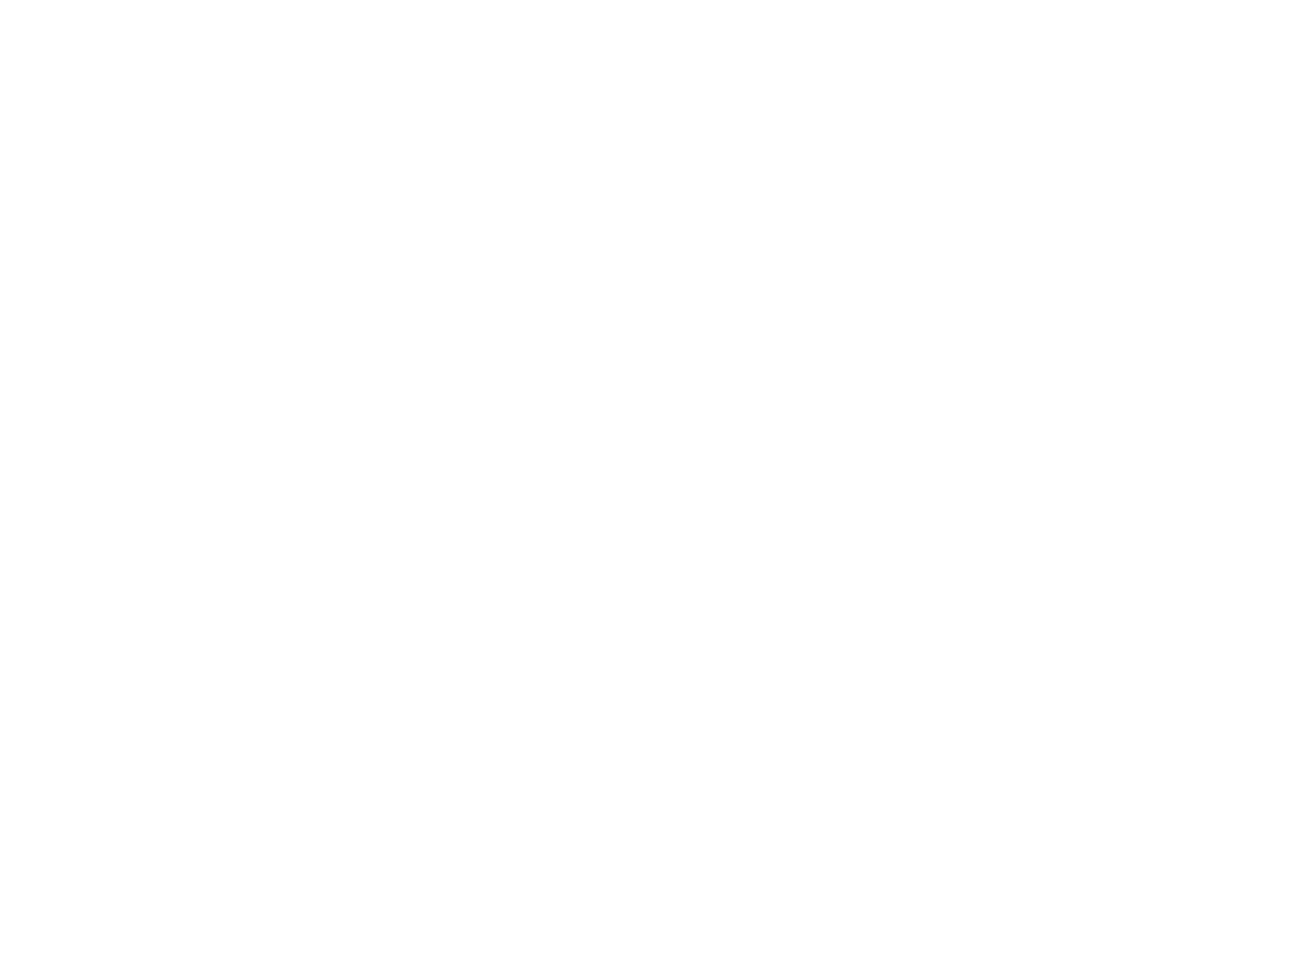

<IPython.core.display.Javascript object>


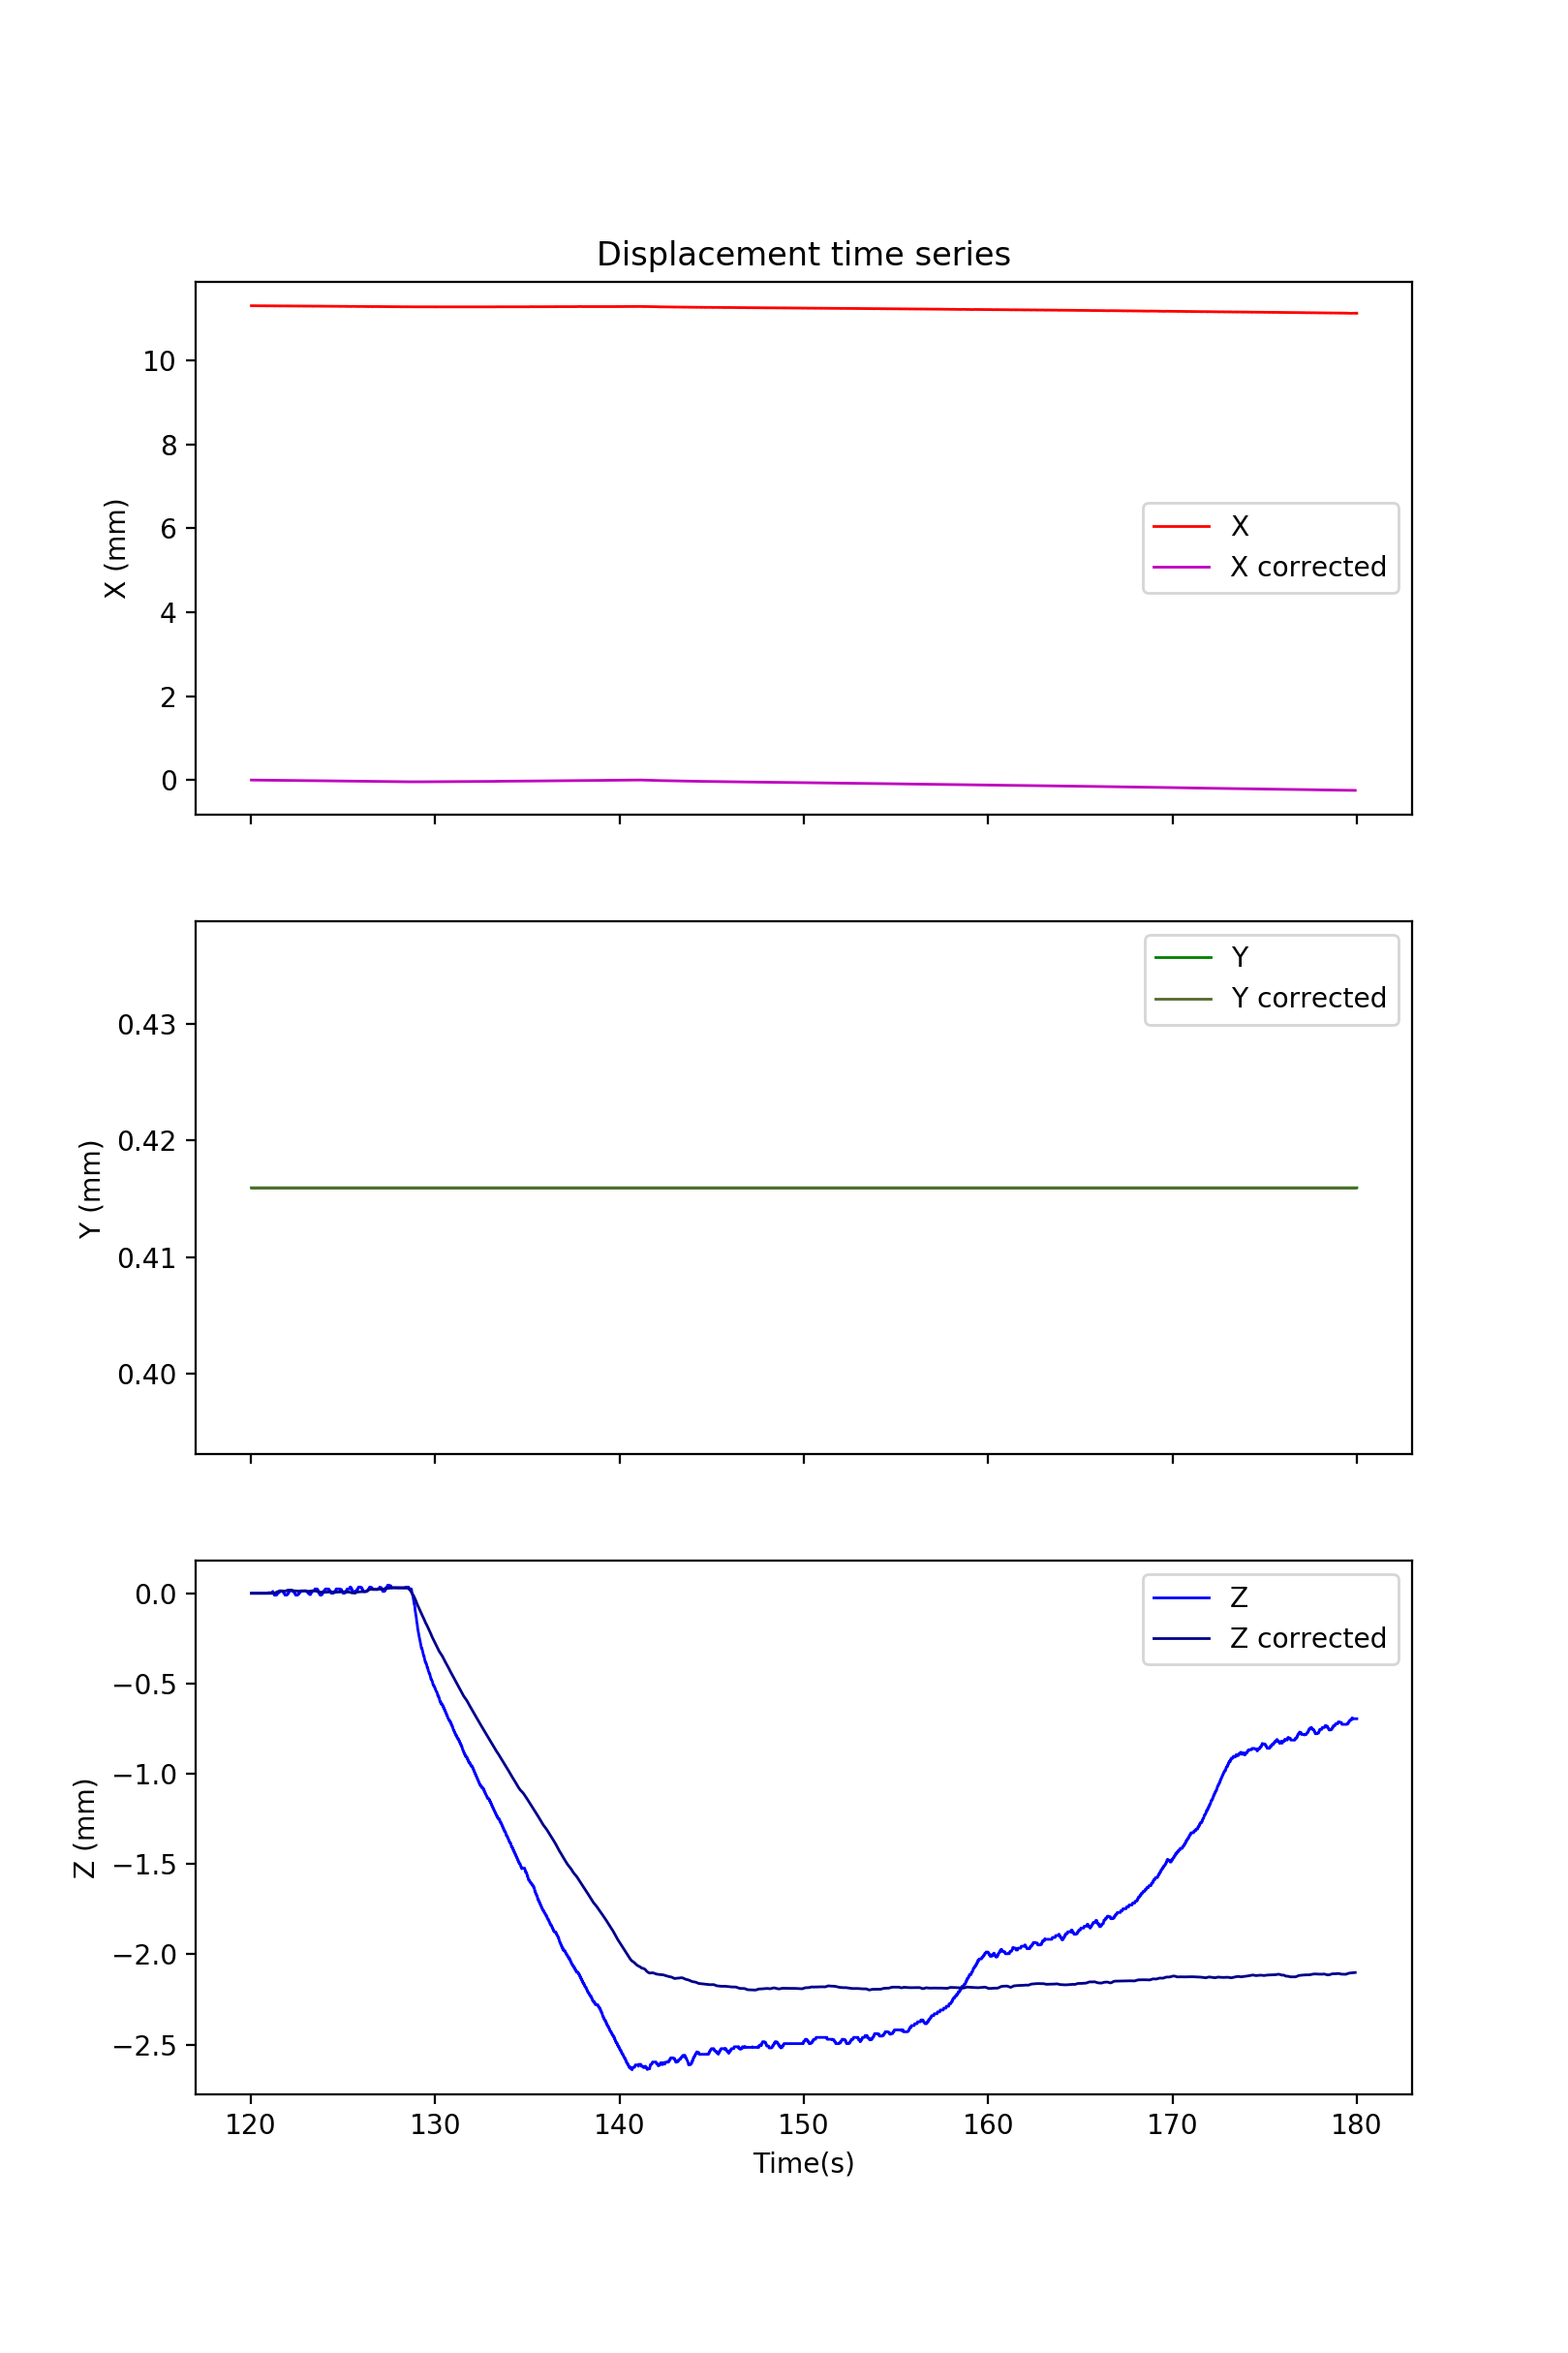

In [139]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns
plt.figure()

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

0      -617.378436
1      -617.388858
2      -617.385674
3      -617.399281
4      -617.396096
           ...    
2660   -625.784499
2661   -625.784499
2662   -625.774088
2663   -625.770903
2664   -625.781314
Name: Z, Length: 2665, dtype: float64


0         0.000000
1         0.100324
2         0.169596
3         0.265820
4         0.344847
           ...    
2660    239.518380
2661    239.614484
2662    239.696903
2663    239.812107
2664    239.897554
Name: Time, Length: 2665, dtype: float64